In [1]:
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

# Analyse fondamental

##Dataset Description
#Explications des variables:
• OverallQual : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)
• GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.
• TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.
• 1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.
• YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.
• YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.
• GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.
• GarageArea : Taille du garage en pieds carrés.
• FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.
• TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.
• KitchenQual : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.
• Fireplaces : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.
• LotArea : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.
• Neighborhood : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.
• ExterQual : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.
• SalePrice : Prix de vente de la maison. C'est la variable cible que nous devons prédire.

# Analyse technique

In [2]:
df_origin = pd.read_csv("kaggle_train_set.csv")
df_origin

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               8       1694         1686      1694       2004          2005   
4               7       1774          952      1022       1931          1950   
...           ...        ...          ...       ...        ...           ...   
1175            5       1072          547      1072       2005          2005   
1176            7       1221         1221      1221       2004          2005   
1177            6       1647          953       953       1999          2000   
1178            7       2340         1152      1188       1941          2006   
1179            5       1078         1078      1078       1950          1996   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              2         636         2             7          Gd           1   
4              2         468         2             8          TA           2   
...          ...         ...       ...           ...         ...         ...   
1175           2         525         1             5          TA           0   
1176           2         400         2             6          Gd           0   
1177           2         460         2             7          TA           1   
1178           1         252         2             9          Gd           2   
1179           1         240         1             5          Gd           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3       10084      Somerst        Gd     307000  
4        6120      OldTown        TA     129900  
...       ...          ...       ...        ...  
1175     3675      Edwards        TA     145000  
1176     7500      Somerst        Gd     185000  
1177     7917      Gilbert        TA     175000  
1178     9042      Crawfor        Ex     266500  
1179     9717        NAmes        TA     142125  

[1180 rows x 16 columns]

In [195]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1180 non-null   int64 
 1   GrLivArea     1180 non-null   int64 
 2   TotalBsmtSF   1180 non-null   int64 
 3   1stFlrSF      1180 non-null   int64 
 4   YearBuilt     1180 non-null   int64 
 5   YearRemodAdd  1180 non-null   int64 
 6   GarageCars    1180 non-null   int64 
 7   GarageArea    1180 non-null   int64 
 8   FullBath      1180 non-null   int64 
 9   TotRmsAbvGrd  1180 non-null   int64 
 10  KitchenQual   1180 non-null   object
 11  Fireplaces    1180 non-null   int64 
 12  LotArea       1180 non-null   int64 
 13  Neighborhood  1180 non-null   object
 14  ExterQual     1180 non-null   object
 15  SalePrice     1180 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 147.6+ KB


In [197]:
df_origin.nunique()

OverallQual      10
GrLivArea       761
TotalBsmtSF     638
1stFlrSF        666
YearBuilt       110
YearRemodAdd     61
GarageCars        5
GarageArea      390
FullBath          4
TotRmsAbvGrd     12
KitchenQual       4
Fireplaces        4
LotArea         882
Neighborhood     25
ExterQual         4
SalePrice       591
dtype: int64

In [9]:
df_origin.isna().sum()

OverallQual     0
GrLivArea       0
TotalBsmtSF     0
1stFlrSF        0
YearBuilt       0
YearRemodAdd    0
GarageCars      0
GarageArea      0
FullBath        0
TotRmsAbvGrd    0
KitchenQual     0
Fireplaces      0
LotArea         0
Neighborhood    0
ExterQual       0
SalePrice       0
dtype: int64

# ## Analyse univarie 

# ### target salePrice

In [4]:
df_origin['SalePrice'].describe()

count      1180.000000
mean     179822.169492
std       79703.346024
min       34900.000000
25%      128800.000000
50%      161250.000000
75%      212000.000000
max      755000.000000
Name: SalePrice, dtype: float64

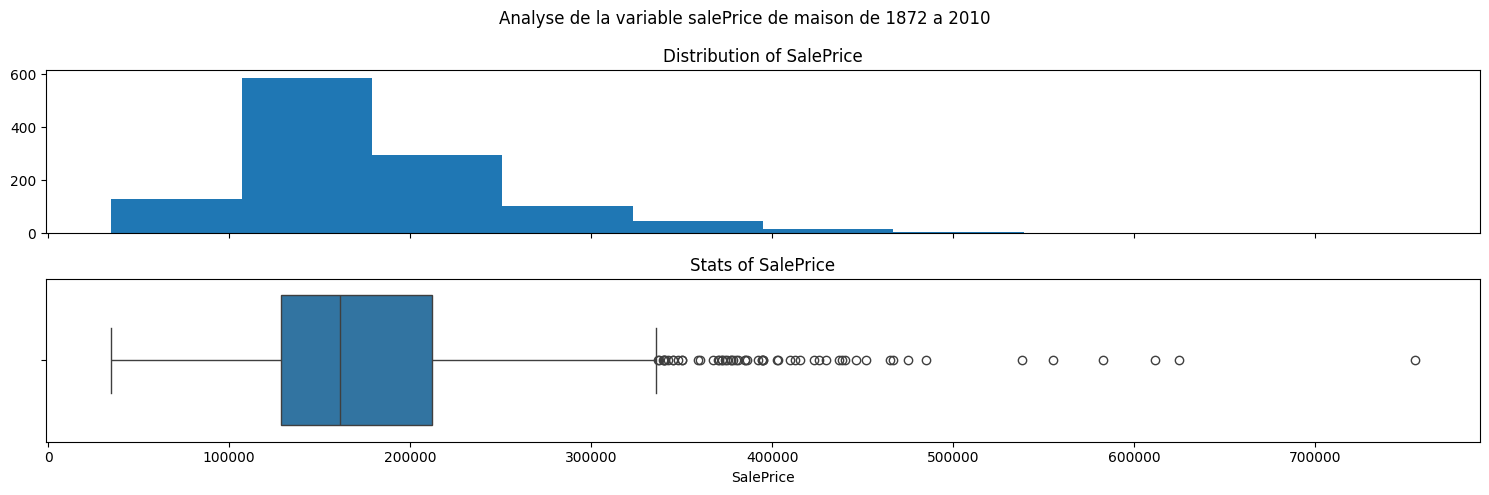

In [81]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
ax.hist(df_origin['SalePrice'])
sb.boxplot(x=df_origin['SalePrice'], ax=ax2, legend=True)
ax.set_title("Distribution of SalePrice")
ax2.set_title("Stats of SalePrice")
fig.suptitle("Analyse de la variable salePrice de maison de 1872 a 2010")
fig.tight_layout()

# ### OverallQual (Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier))

In [31]:
df_origin['OverallQual'].value_counts()

OverallQual
5     328
6     307
7     255
8     126
4      90
9      37
10     17
3      16
2       3
1       1
Name: count, dtype: int64

Text(0, 0.5, 'Frequence')

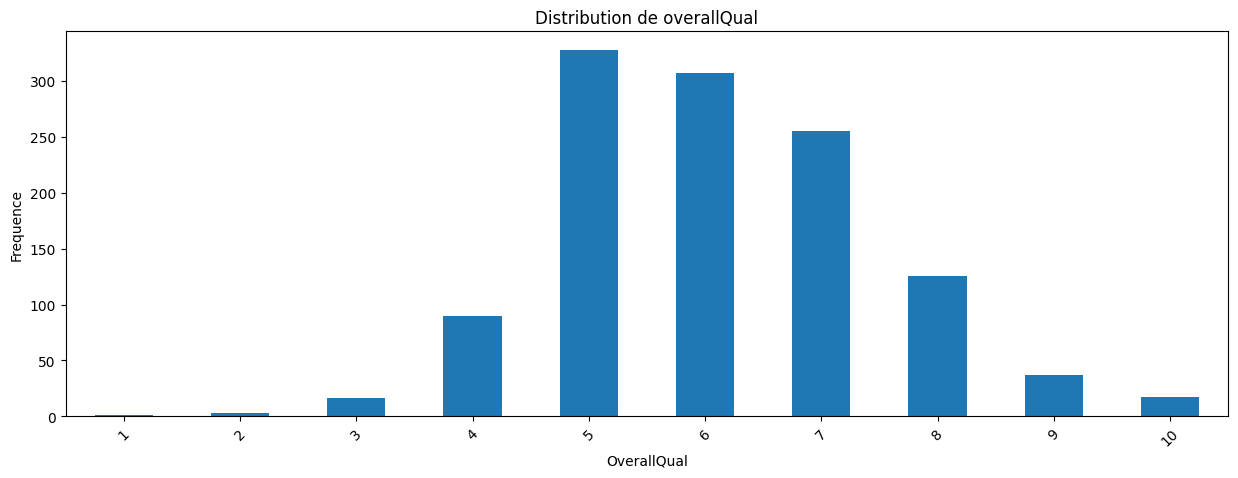

In [237]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
df_origin['OverallQual'].value_counts().sort_index().plot(kind='bar', rot=45, ax=ax)
ax.set_title("Distribution de overallQual")
ax.set_xlabel("OverallQual")
ax.set_ylabel("Frequence")

# ### GrLivArea ( Surface habitable hors sous-sol. Directement liée à la taille de la maison.)

In [78]:
df_origin['GrLivArea'].describe()

count    1180.000000
mean     1508.277966
std       534.634371
min       334.000000
25%      1118.000000
50%      1441.500000
75%      1779.000000
max      5642.000000
Name: GrLivArea, dtype: float64

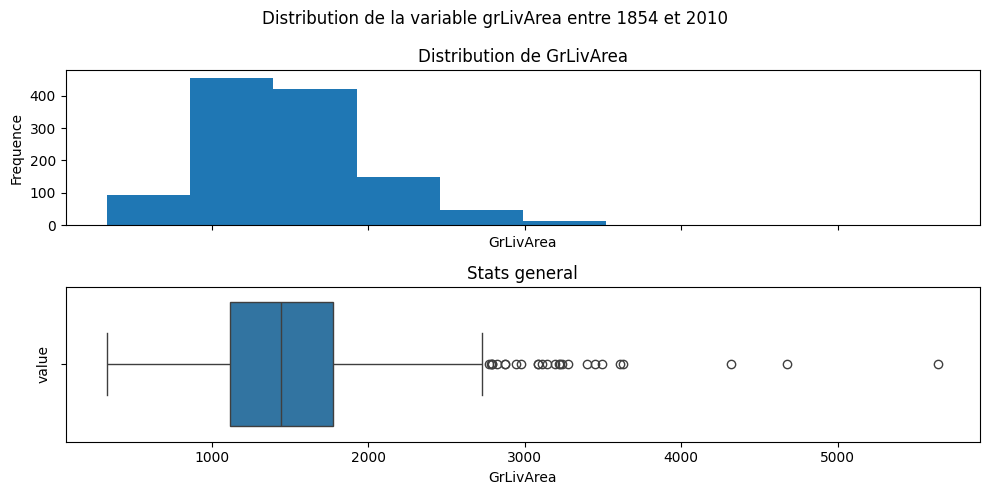

In [224]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(10,5), sharex=True)
ax.hist(df_origin['GrLivArea'])
sb.boxplot(x=df_origin['GrLivArea'], legend=True, ax=ax2)
ax2.set_title("Stats general")
ax2.set_xlabel("GrLivArea")
ax2.set_ylabel("value")
ax.set_title("Distribution de GrLivArea")
ax.set_xlabel("GrLivArea")
ax.set_ylabel("Frequence")
fig.suptitle("Distribution de la variable grLivArea entre 1854 et 2010")
fig.tight_layout()

# ### TotalBsmtSF (Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.)

In [80]:
df_origin['TotalBsmtSF'].describe()

count    1180.000000
mean     1058.874576
std       448.648614
min         0.000000
25%       793.000000
50%       993.500000
75%      1309.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

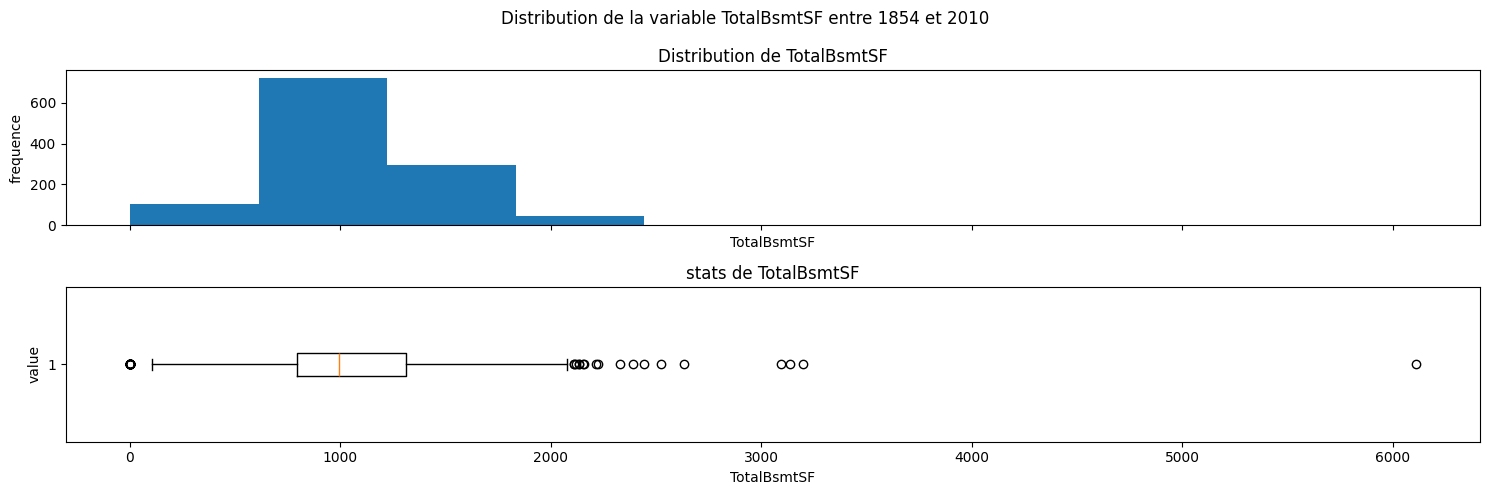

In [246]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,5), sharex=True)
ax.hist(x=df_origin['TotalBsmtSF'])
ax.set_title("Distribution de TotalBsmtSF")
ax.set_xlabel("TotalBsmtSF")
ax.set_ylabel("frequence")

ax2.boxplot(df_origin['TotalBsmtSF'], orientation='horizontal')
ax2.set_title("stats de TotalBsmtSF")
ax2.set_xlabel("TotalBsmtSF")
ax2.set_ylabel("value")

fig.suptitle("Distribution de la variable TotalBsmtSF entre 1854 et 2010")
fig.tight_layout()

# ### 1stFlrSF (Superficie du rez-de-chaussée. Indique la taille de la maison)

In [82]:
df_origin['1stFlrSF'].describe()

count    1180.000000
mean     1163.179661
std       395.100829
min       334.000000
25%       879.750000
50%      1088.000000
75%      1392.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

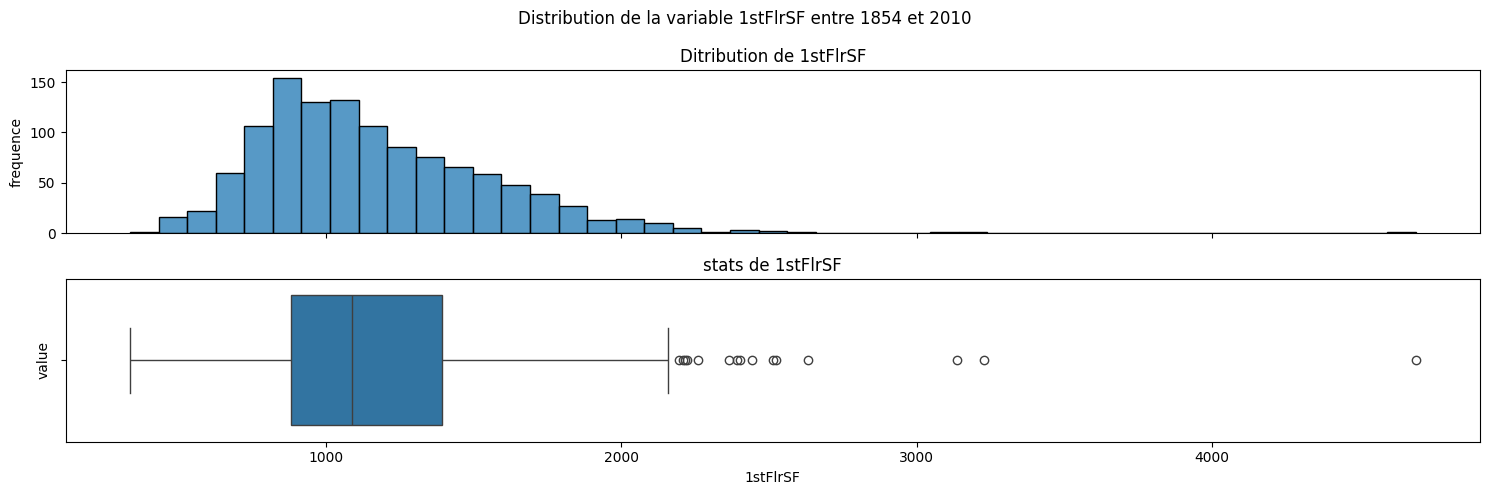

In [249]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,5), sharex=True)
sb.histplot(x=df_origin['1stFlrSF'], legend=True, ax=ax)
ax.set_title("Ditribution de 1stFlrSF")
ax.set_xlabel("1stFlrSF")
ax.set_ylabel("frequence")
sb.boxplot(x=df_origin['1stFlrSF'], legend=True, ax=ax2)
ax2.set_title("stats de 1stFlrSF")
ax2.set_xlabel("1stFlrSF")
ax2.set_ylabel("value")

fig.suptitle("Distribution de la variable 1stFlrSF entre 1854 et 2010")
fig.tight_layout()

# ### YearBuilt 

In [40]:
df_origin['YearBuilt'].value_counts()

YearBuilt
2005    53
2006    47
2007    39
2004    38
2003    34
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 110, dtype: int64

<Axes: ylabel='Frequency'>

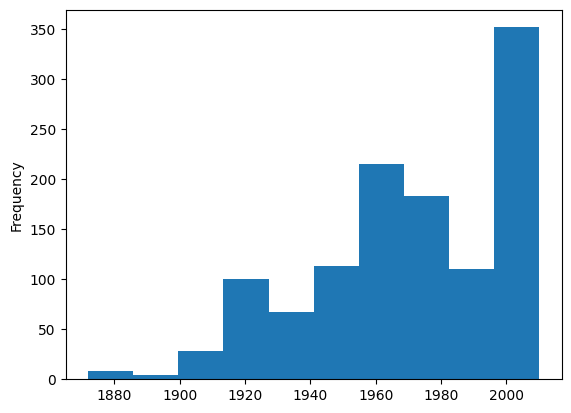

In [283]:
df_origin['YearBuilt'].sort_values(ascending=True).plot(kind='hist')

# ### YearRemodAdd (annee renovation)

In [43]:
df_origin['YearRemodAdd'].value_counts()

YearRemodAdd
1950    145
2006     76
2007     60
2005     59
2000     47
       ... 
2010      5
1986      4
1952      4
1983      3
1951      3
Name: count, Length: 61, dtype: int64

Text(0, 0.5, 'frequence')

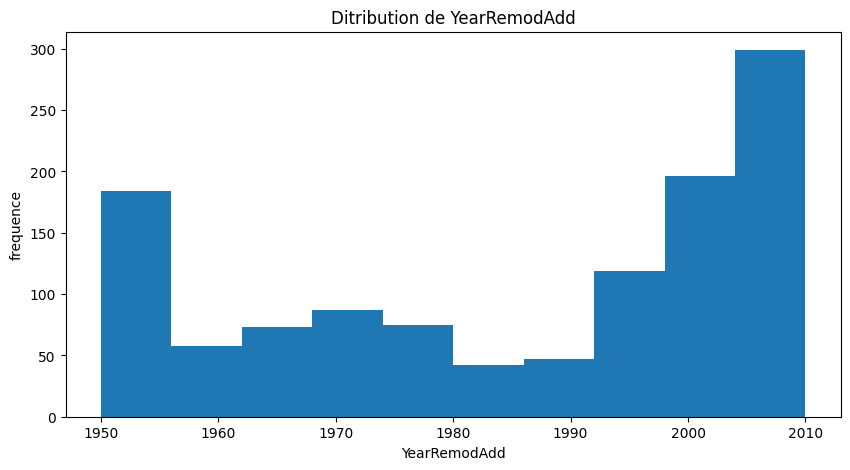

In [44]:
fig , ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(df_origin['YearRemodAdd'])
ax.set_title("Ditribution de YearRemodAdd")
ax.set_xlabel("YearRemodAdd")
ax.set_ylabel("frequence")


# ### GarageCars (capacite du garage en nb cars)

In [45]:
df_origin['GarageCars'].value_counts()

GarageCars
2    654
1    312
3    144
0     66
4      4
Name: count, dtype: int64

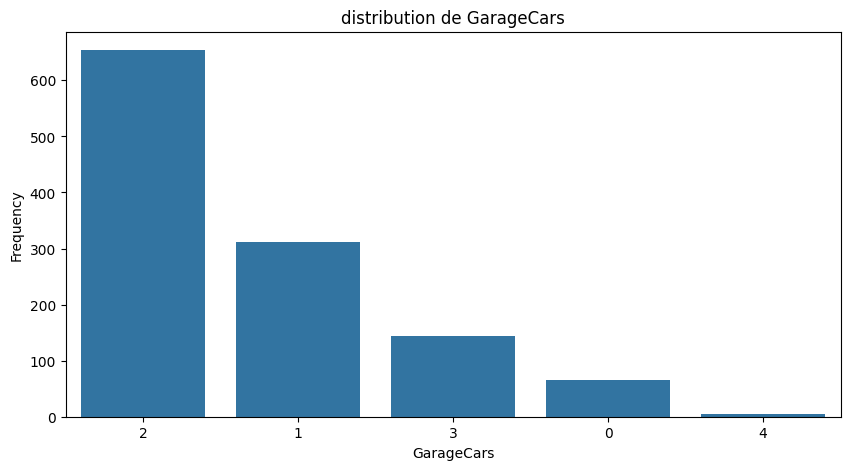

In [332]:
plt.figure(figsize=(10,5))
sb.countplot(x=df_origin['GarageCars'], order=df_origin['GarageCars'].value_counts().index)
plt.title("distribution de GarageCars")
plt.xlabel("GarageCars")
plt.ylabel("Frequency")
plt.show()

# ### GarageArea (taille garage en pieds carre)

In [85]:
df_origin['GarageArea'].describe()

count    1180.000000
mean      468.944915
std       211.898970
min         0.000000
25%       312.000000
50%       474.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

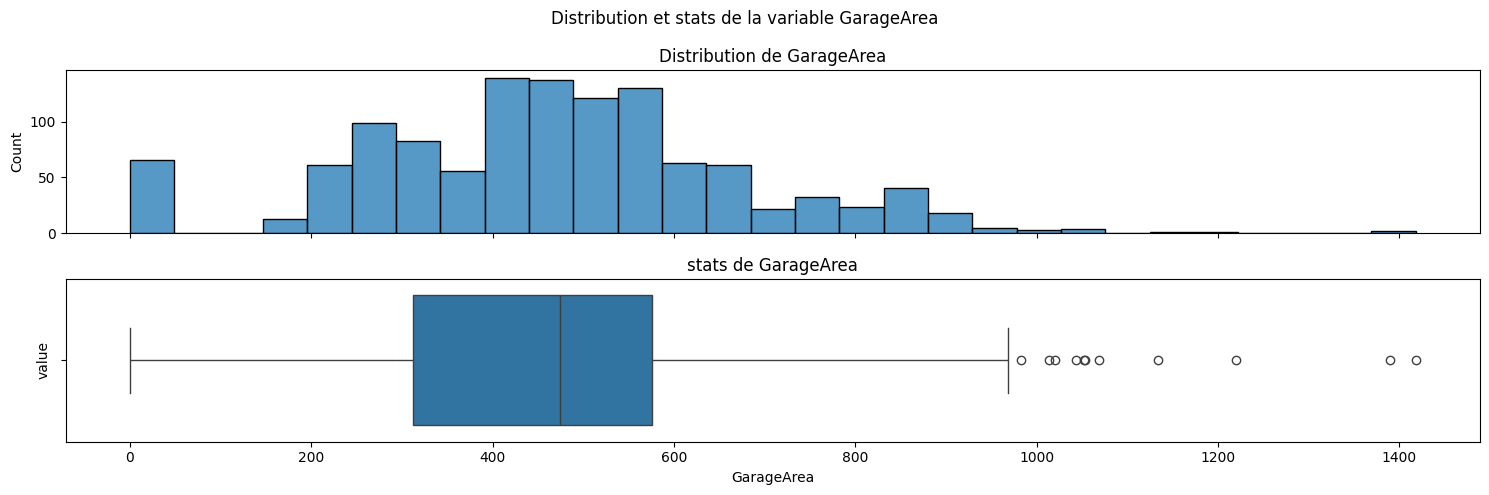

In [334]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,5), sharex=True)
sb.histplot(df_origin, x='GarageArea', legend=True, ax=ax)
ax.set_title("Distribution de GarageArea")
sb.boxplot(df_origin, x='GarageArea', ax=ax2)
ax2.set_title("stats de GarageArea")
ax2.set_ylabel("value")
fig.suptitle("Distribution et stats de la variable GarageArea")
fig.tight_layout()

# ### FullBath (nb salle de bain)

In [62]:
df_origin['FullBath'].value_counts()

FullBath
2    609
1    539
3     25
0      7
Name: count, dtype: int64

Text(0.5, 1.0, 'distribtion de la va fullbath')

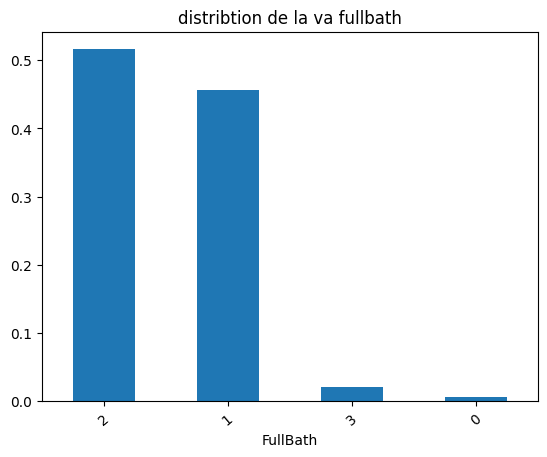

In [347]:
df_origin['FullBath'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar', rot=40)
plt.title("distribtion de la va fullbath")

# ### TotRmsAbvGrd (Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.)

In [67]:
df_origin['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     337
7     259
5     223
8     145
4      83
9      59
10     34
11     14
3      13
12     11
2       1
14      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution de TotRmsAbvGrd')

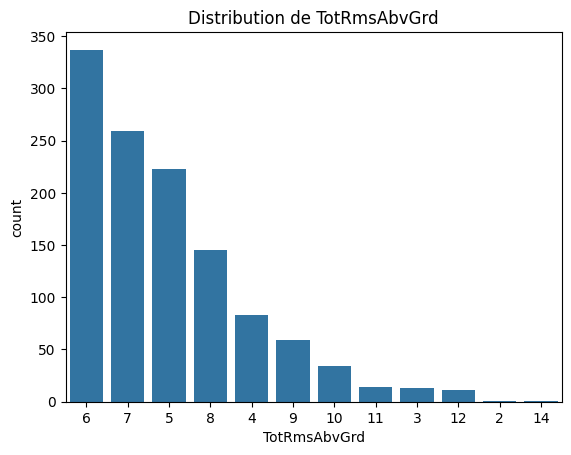

In [358]:
sb.countplot(df_origin, x='TotRmsAbvGrd', legend=True, order=df_origin['TotRmsAbvGrd'].value_counts(normalize=True).sort_values(ascending=False).index)
plt.title("Distribution de TotRmsAbvGrd")

# ### KitchenQual

In [69]:
df_origin['KitchenQual'].value_counts()

KitchenQual
TA    600
Gd    462
Ex     84
Fa     34
Name: count, dtype: int64

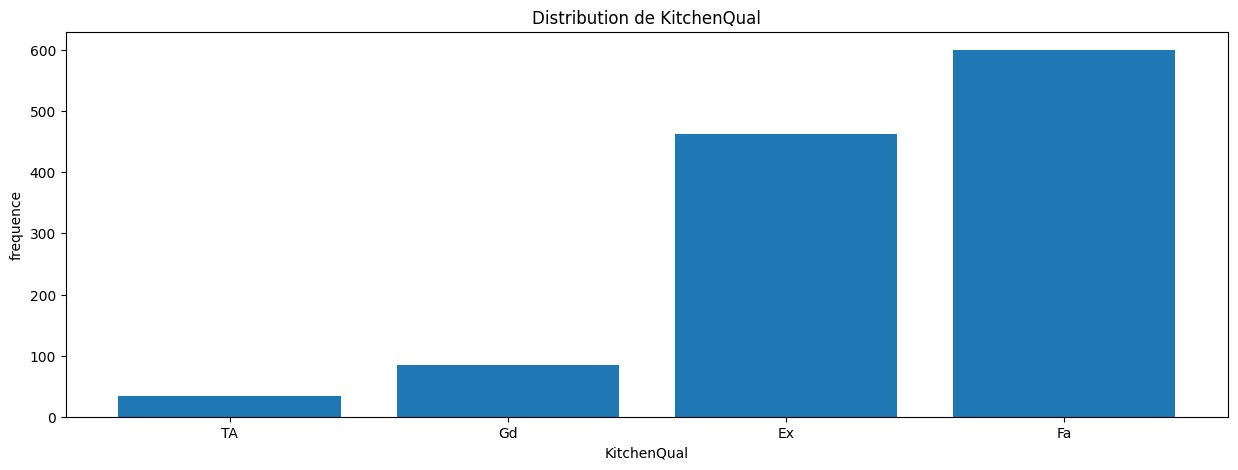

In [359]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.bar(('TA', 'Gd', 'Ex', 'Fa'), df_origin['KitchenQual'].value_counts().sort_values(ascending=True))
ax.set_title("Distribution de KitchenQual")
ax.set_xlabel("KitchenQual")
ax.set_ylabel("frequence")
plt.show()

# ### Fireplaces (Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.)

In [73]:
df_origin['Fireplaces'].value_counts()

Fireplaces
0    566
1    513
2     97
3      4
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution de Fireplaces')

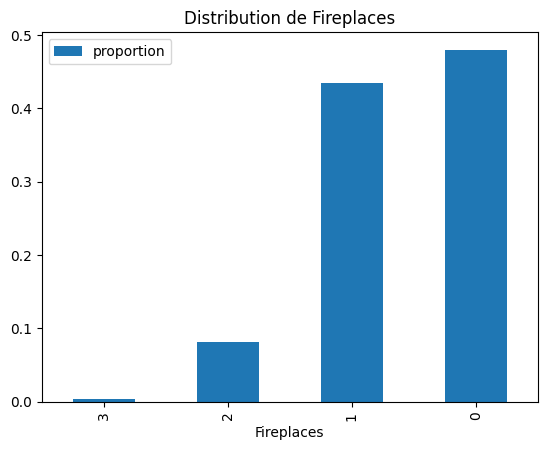

In [366]:
df_origin['Fireplaces'].value_counts(normalize=True).sort_index(ascending=False).plot(kind='bar', legend=True)
plt.title("Distribution de Fireplaces")

# ### LotArea (Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.)

In [77]:
df_origin['LotArea'].describe()

count      1180.000000
mean      10448.989831
std       10266.492616
min        1300.000000
25%        7500.000000
50%        9458.500000
75%       11532.750000
max      215245.000000
Name: LotArea, dtype: float64

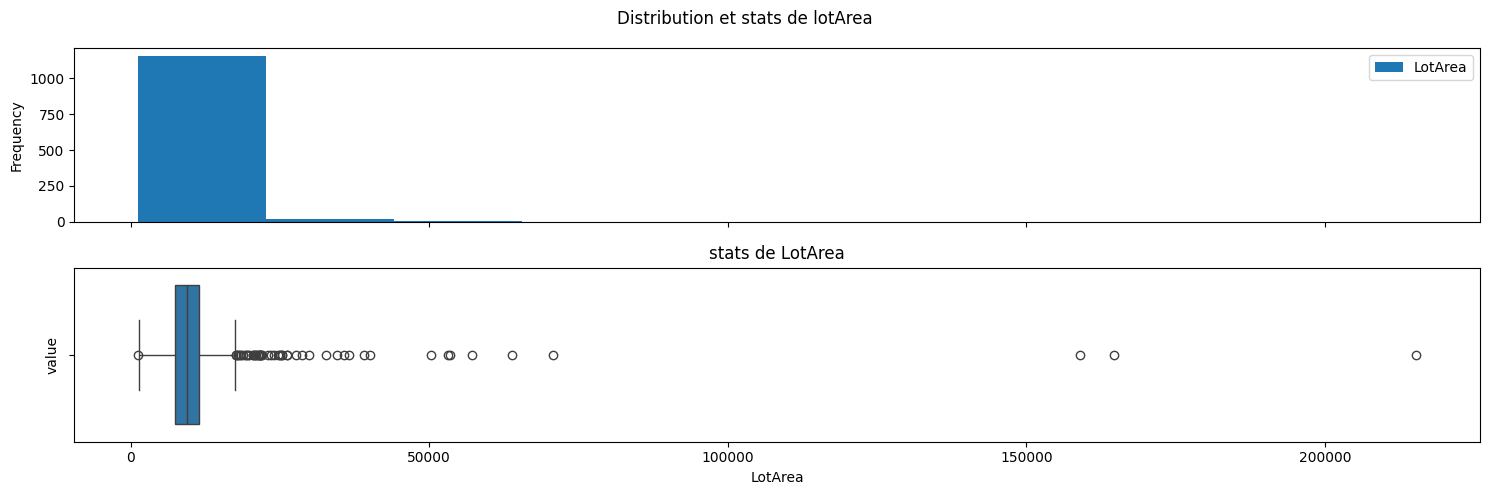

In [371]:
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,5), sharex=True)
df_origin['LotArea'].plot(kind='hist', legend=True, ax=ax)
plt.title("ditribution de LotArea")
sb.boxplot(x=df_origin['LotArea'], legend=True, ax=ax2)
plt.title("stats de LotArea")
ax2.set_ylabel("value")
fig.suptitle("Distribution et stats de lotArea")
fig.tight_layout()

# ### Neighborhood ( Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.)

In [90]:
df_origin['Neighborhood'].value_counts()

Neighborhood
NAmes      198
CollgCr    120
OldTown     91
Edwards     76
Somerst     67
Sawyer      62
NridgHt     61
Gilbert     59
NWAmes      57
SawyerW     51
BrkSide     50
Crawfor     43
Mitchel     36
NoRidge     33
Timber      29
IDOTRR      24
ClearCr     23
SWISU       21
StoneBr     18
Blmngtn     16
BrDale      15
MeadowV     13
Veenker     10
NPkVill      5
Blueste      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution de Neighborhood')

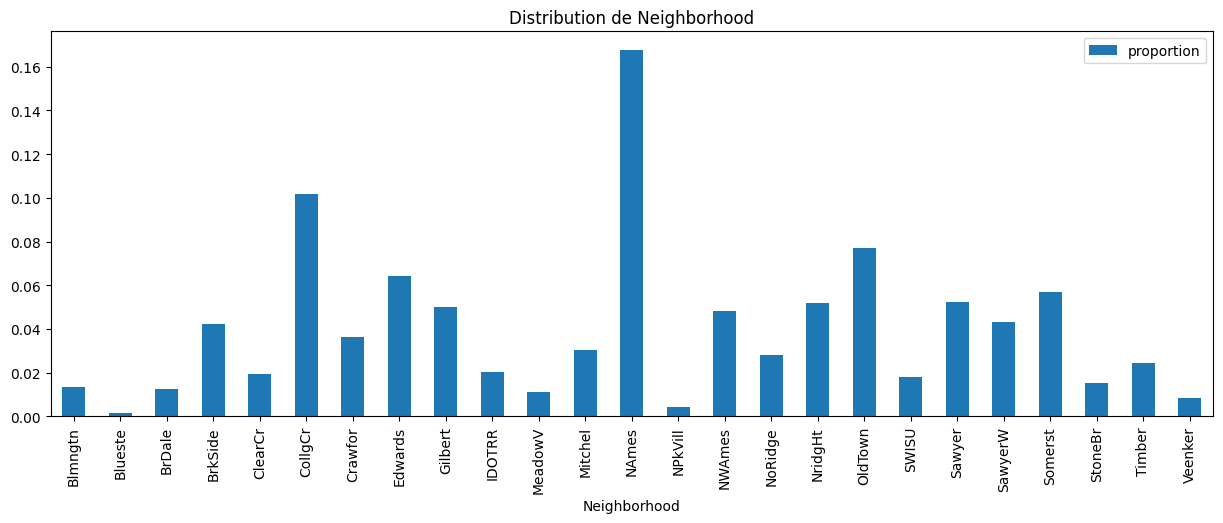

In [373]:
df_origin['Neighborhood'].value_counts(normalize=True).sort_index().plot(kind='bar', legend=True, figsize=(15,5))
plt.title("Distribution de Neighborhood")

# ### ExterQual ( Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.)

In [93]:
df_origin['ExterQual'].value_counts()

ExterQual
TA    742
Gd    383
Ex     44
Fa     11
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution de ExterQual')

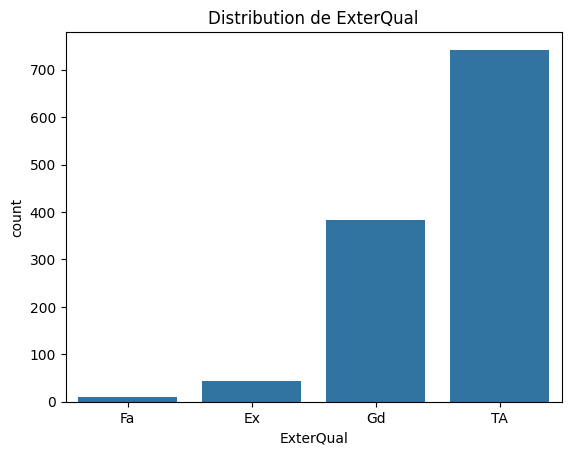

In [377]:
sb.countplot(df_origin, x='ExterQual', legend=True, order=df_origin['ExterQual'].value_counts(normalize=True).sort_values(ascending=True).index)
plt.title("Distribution de ExterQual")

# ## Anayse Multivarie

# ### OverallQual (Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier))

In [388]:
df_origin.groupby('OverallQual')['SalePrice'].describe()

count           mean            std       min       25%  \
OverallQual                                                            
1              1.0   39300.000000            NaN   39300.0   39300.0   
2              3.0   51770.333333   14254.200796   35311.0   47655.5   
3             16.0   88779.687500   25734.275488   37900.0   75500.0   
4             90.0  103364.955556   24822.193100   34900.0   85050.0   
5            328.0  133137.420732   27247.284634   55993.0  117000.0   
6            307.0  160340.456026   36800.195323   76000.0  136700.0   
7            255.0  208301.407843   44599.793620   82500.0  179570.0   
8            126.0  274905.095238   67327.231812  122000.0  235000.0   
9             37.0  364166.000000   76969.669221  239000.0  319900.0   
10            17.0  420564.176471  144616.508006  160000.0  337500.0   

                  50%       75%       max  
OverallQual                                
1             39300.0   39300.0   39300.0  
2             60000.0   60000.0   60000.0  
3             86250.0   98100.0  139600.0  
4            104050.0  120125.0  161500.0  
5            132750.0  146625.0  228950.0  
6            159000.0  181000.0  277000.0  
7            200141.0  233500.0  375000.0  
8            267000.0  309750.0  538000.0  
9            350000.0  385000.0  611657.0  
10           426000.0  466500.0  755000.0

In [391]:
df_mean = df_origin.groupby('OverallQual')['SalePrice'].mean().reset_index()

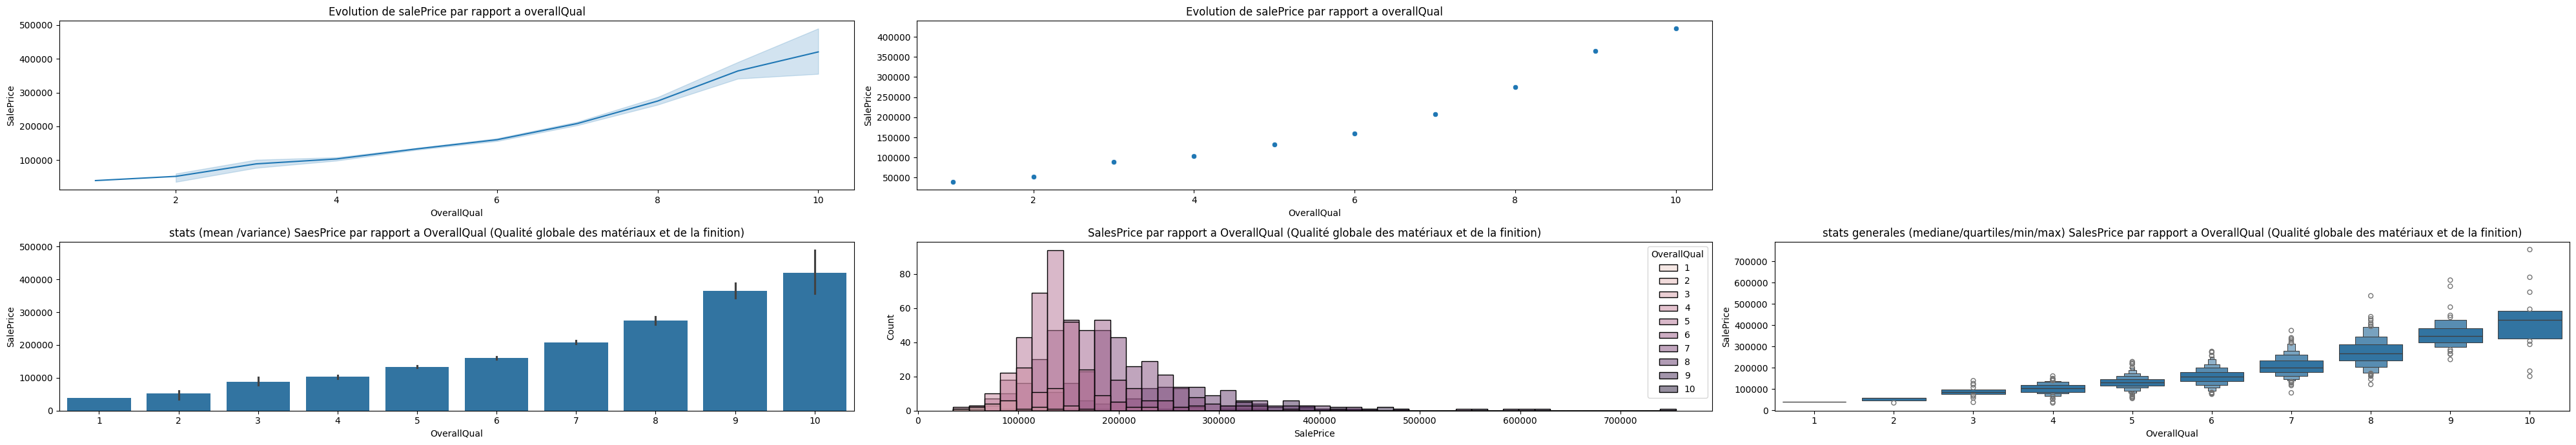

In [392]:
fig, ((ax3, ax4, ax5), (ax, ax1, ax2)) = plt.subplots(2,3, figsize=(40,7))
sb.barplot(df_origin, x="OverallQual", y="SalePrice", ax=ax)
ax.set_title("stats (mean /variance) SaesPrice par rapport a OverallQual (Qualité globale des matériaux et de la finition)")

sb.histplot(df_origin, hue="OverallQual", x="SalePrice", ax=ax1)
ax1.set_title("SalesPrice par rapport a OverallQual (Qualité globale des matériaux et de la finition)")

sb.boxenplot(df_origin, x="OverallQual", y="SalePrice", ax=ax2)
ax2.set_title("stats generales (mediane/quartiles/min/max) SalesPrice par rapport a OverallQual (Qualité globale des matériaux et de la finition)")

sb.lineplot(x=df_origin["OverallQual"], y=df_origin["SalePrice"], ax=ax3)
ax3.set_title("Evolution de salePrice par rapport a overallQual")

sb.scatterplot(x=df_mean["OverallQual"], y=df_mean["SalePrice"], ax=ax4)
ax4.set_title("Evolution de salePrice par rapport a overallQual")

fig.delaxes(ax5)
fig.tight_layout()

# ###GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.

In [406]:
df_origin.groupby('YearBuilt')[['GrLivArea', 'SalePrice']].mean().reset_index()

YearBuilt    GrLivArea      SalePrice
0         1872  2358.000000  122000.000000
1         1875  1020.000000   94000.000000
2         1880  2523.250000  200619.750000
3         1882  1742.000000  168000.000000
4         1885  1047.000000  100000.000000
..         ...          ...            ...
105       2006  1651.255319  254160.659574
106       2007  1722.538462  249554.974359
107       2008  2191.400000  342105.150000
108       2009  1642.615385  286007.769231
109       2010  1856.000000  394432.000000

[110 rows x 3 columns]

In [ ]:
def cut_years(x):
    if x < 1900:
        return "1872–1900"
    elif x < 1920:
        return "1900–1920"
    elif x < 1940:
        return "1920–1940"
    elif x < 1960:
        return "1940–1960"
    elif x < 1980:
        return "1960–1980"
    elif x < 1990:
        return "1980–1990"
    elif x < 2000:
        return "1990–2000"
    else:
        return "2000+"
    
df_test = df_origin.copy()   
df_test['YearBuiltCut'] = df_test['YearBuilt'].apply(cut_years)


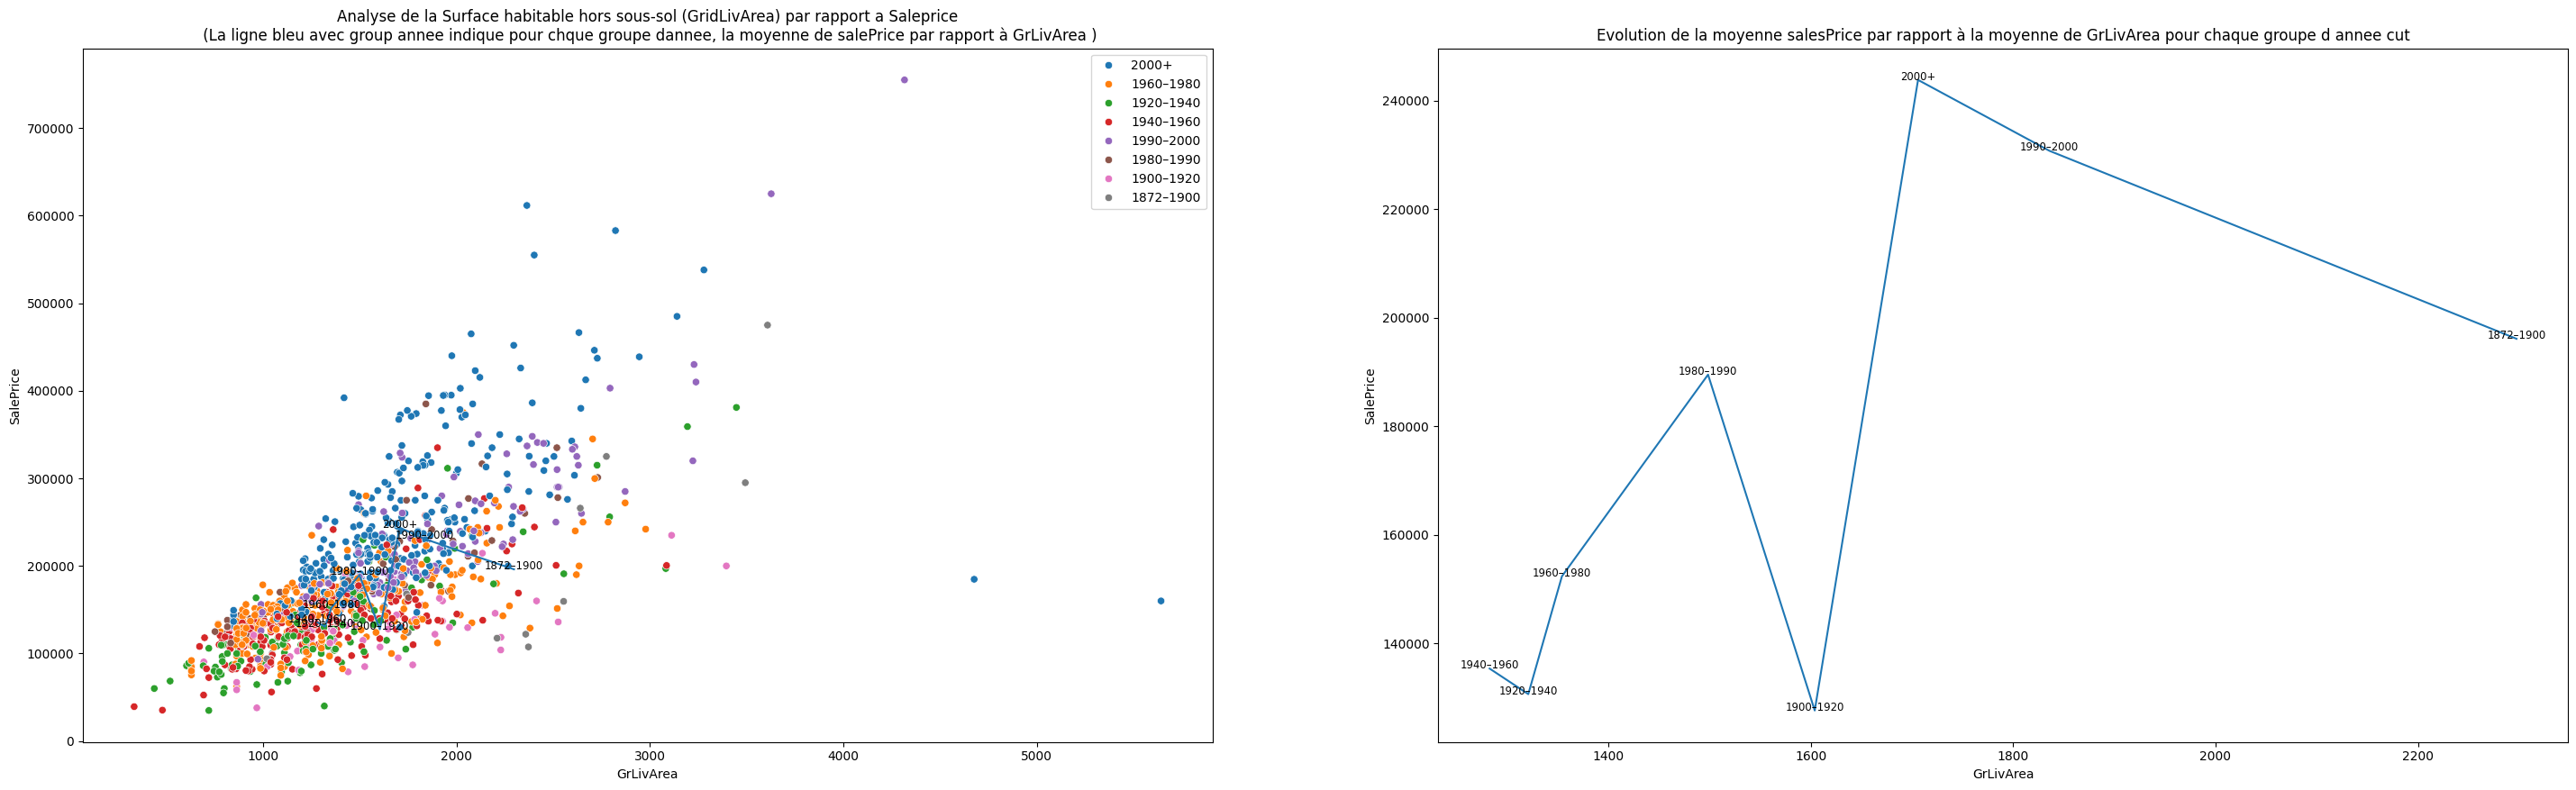

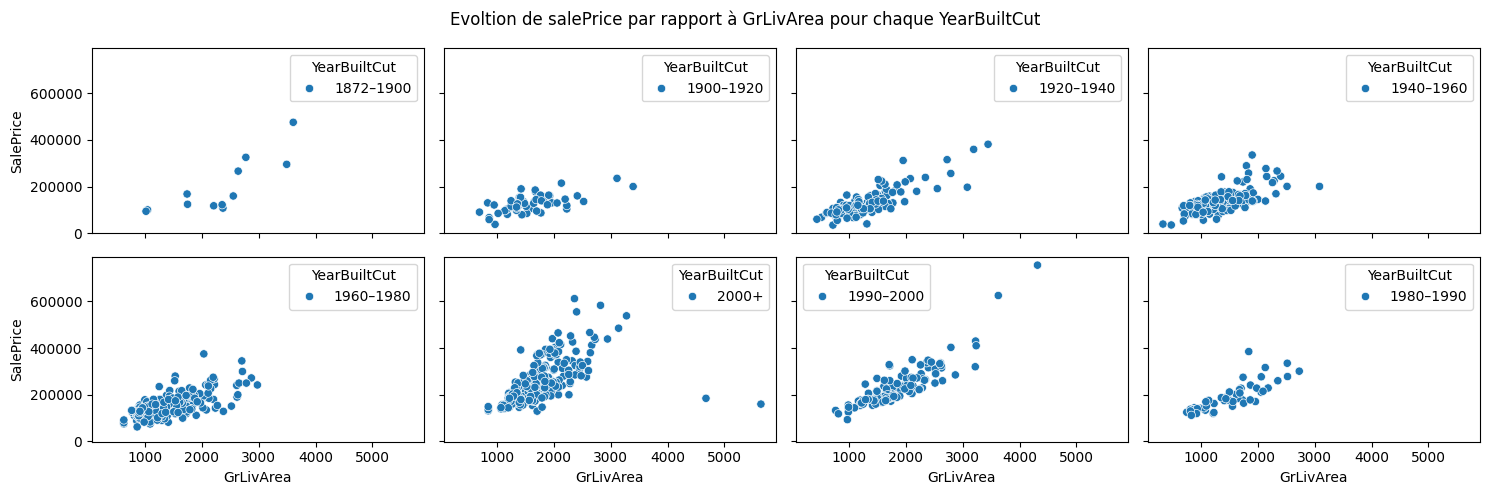

In [141]:
fig, (ax, ax1, ax2) = plt.subplots(1,3,figsize=(55,10))

sb.scatterplot(x=df_test['GrLivArea'], y=df_test['SalePrice'], hue=df_test['YearBuiltCut'], ax=ax)
df_mean = df_test.groupby('YearBuiltCut')[['GrLivArea', 'SalePrice']].mean().reset_index()
sb.lineplot(x=df_mean['GrLivArea'], y=df_mean['SalePrice'], ax=ax)
for _, row in df_mean.iterrows():
    ax.text(row['GrLivArea'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax.set_title("Analyse de la Surface habitable hors sous-sol (GridLivArea) par rapport a Saleprice\n (La ligne bleu avec group annee indique pour chque groupe dannee, la moyenne de salePrice par rapport à GrLivArea )")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

df_mean = df_test.groupby('YearBuiltCut')[['GrLivArea', 'SalePrice']].mean().reset_index()
sb.lineplot(x=df_mean['GrLivArea'], y=df_mean['SalePrice'], ax=ax1)
for _, row in df_mean.iterrows():
    ax1.text(row['GrLivArea'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax1.set_title("Evolution de la moyenne salesPrice par rapport à la moyenne de GrLivArea pour chaque groupe d annee cut")

fig.delaxes(ax2)
df_unique_years = df_test['YearBuiltCut'].sort_values(ascending=True).reset_index()
df_unique_years = df_unique_years['YearBuiltCut'].unique()
df_unique_years

fig, ax_2 = plt.subplots(2,4,figsize=(15,5), sharex=True, sharey=True)
fig.suptitle("Evoltion de salePrice par rapport à GrLivArea pour chaque YearBuiltCut")

for index, i in enumerate(df_unique_years):
    if index > 3:
        df_save = df_test.query(f"YearBuiltCut == '{i}'")
        sb.scatterplot(x=df_save['GrLivArea'], y=df_save['SalePrice'], hue='YearBuiltCut', data=df_save, ax=ax_2[1][len(ax_2[0])-index])
    else:
        df_save = df_test.query(f"YearBuiltCut == '{i}'")
        sb.scatterplot(x=df_save['GrLivArea'], y=df_save['SalePrice'], hue='YearBuiltCut', data=df_save, ax=ax_2[0][index])

fig.tight_layout()

# ### TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.

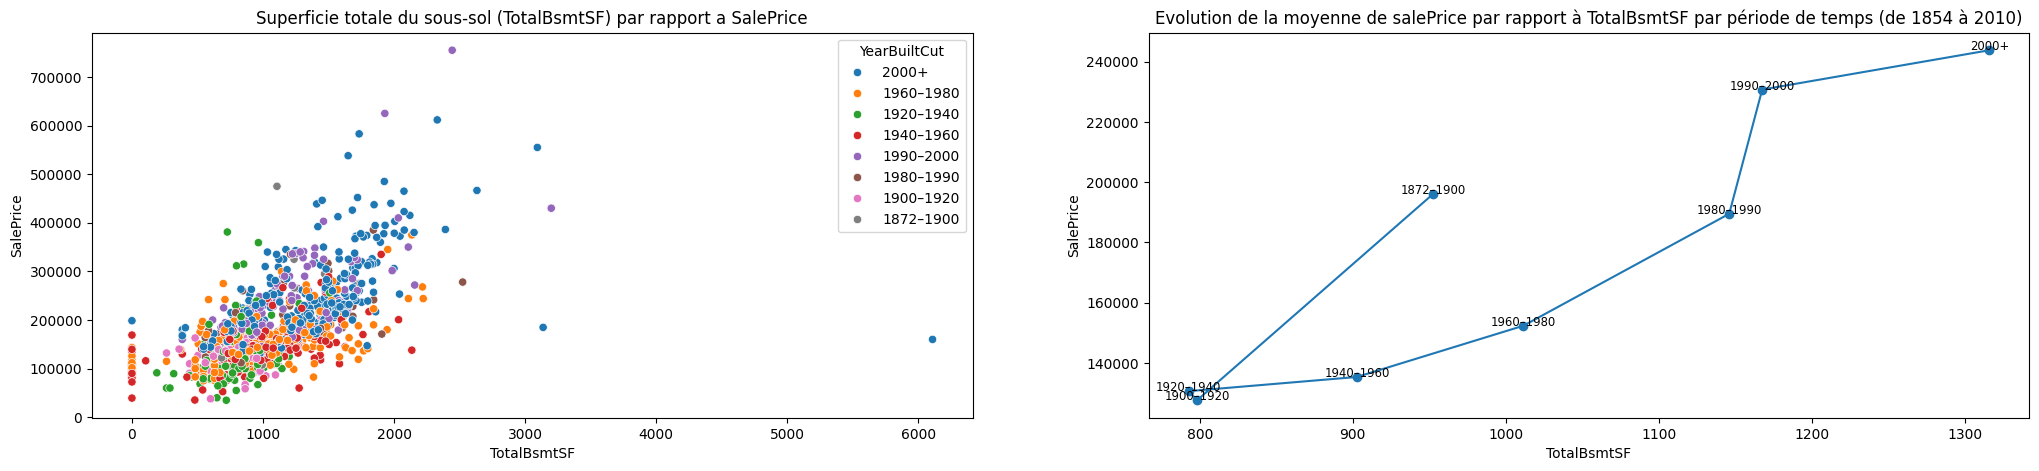

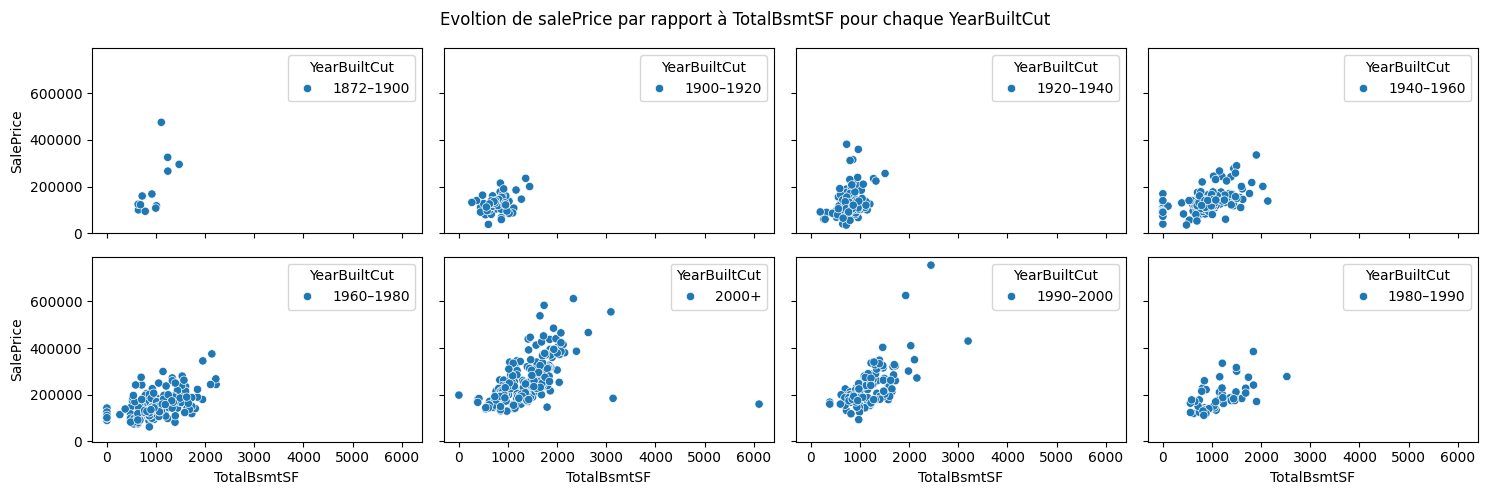

In [114]:
fig, ax, = plt.subplots(1,2, figsize=(25,5))

def cut_years(x):
    if x < 1900:
        return "1872–1900"
    elif x < 1920:
        return "1900–1920"
    elif x < 1940:
        return "1920–1940"
    elif x < 1960:
        return "1940–1960"
    elif x < 1980:
        return "1960–1980"
    elif x < 1990:
        return "1980–1990"
    elif x < 2000:
        return "1990–2000"
    else:
        return "2000+"
    
df_test = df_origin.copy()   
df_test['YearBuiltCut'] = df_test['YearBuilt'].apply(cut_years)

sb.scatterplot(df_test, y='SalePrice', x='TotalBsmtSF', legend=True, hue='YearBuiltCut', ax=ax[0])
ax[0].set_title("Superficie totale du sous-sol (TotalBsmtSF) par rapport a SalePrice")

df_mean = df_test.groupby('YearBuiltCut')[['TotalBsmtSF', 'SalePrice']].mean().reset_index()
sb.scatterplot(x=df_mean['TotalBsmtSF'], y=df_mean['SalePrice'], ax=ax[1])
ax[1].plot(df_mean['TotalBsmtSF'], df_mean['SalePrice'], "-o")
for i, row in df_mean.iterrows():
    plt.text(row['TotalBsmtSF'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax[1].set_title("Evolution de la moyenne de salePrice par rapport à TotalBsmtSF par période de temps (de 1854 à 2010)")

df_unique_years = df_test['YearBuiltCut'].sort_values(ascending=True).reset_index()
df_unique_years = df_unique_years['YearBuiltCut'].unique()
df_unique_years

fig, ax_2 = plt.subplots(2,4,figsize=(15,5), sharex=True, sharey=True)
fig.suptitle("Evoltion de salePrice par rapport à TotalBsmtSF pour chaque YearBuiltCut")

for index, i in enumerate(df_unique_years):
    if index > 3:
        df_save = df_test.query(f"YearBuiltCut == '{i}'")
        sb.scatterplot(x=df_save['TotalBsmtSF'], y=df_save['SalePrice'], hue='YearBuiltCut', data=df_save, ax=ax_2[1][len(ax_2[0])-index])
    else:
        df_save = df_test.query(f"YearBuiltCut == '{i}'")
        sb.scatterplot(x=df_save['TotalBsmtSF'], y=df_save['SalePrice'], hue='YearBuiltCut', data=df_save, ax=ax_2[0][index])





fig.tight_layout()

# ### 1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.

In [96]:
df_sort_yearcut = df_test['YearBuiltCut'].reset_index().sort_values(by=['YearBuiltCut'],ascending=True)
df_sort_yearcut['YearBuiltCut'].unique()

array(['1872–1900', '1900–1920', '1920–1940', '1940–1960', '1960–1980',
       '1980–1990', '1990–2000', '2000–2010', None], dtype=object)

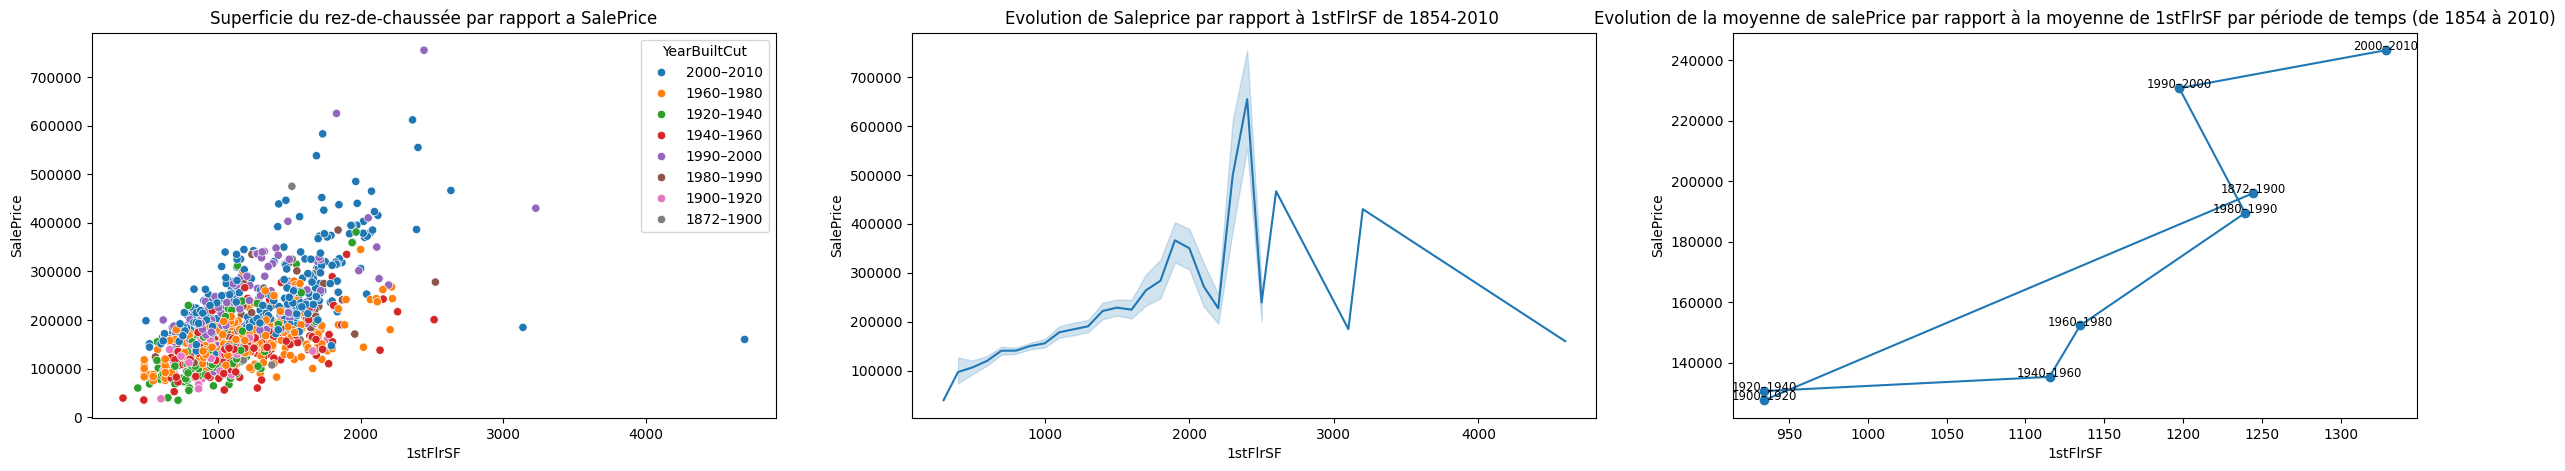

<Figure size 1500x500 with 0 Axes>

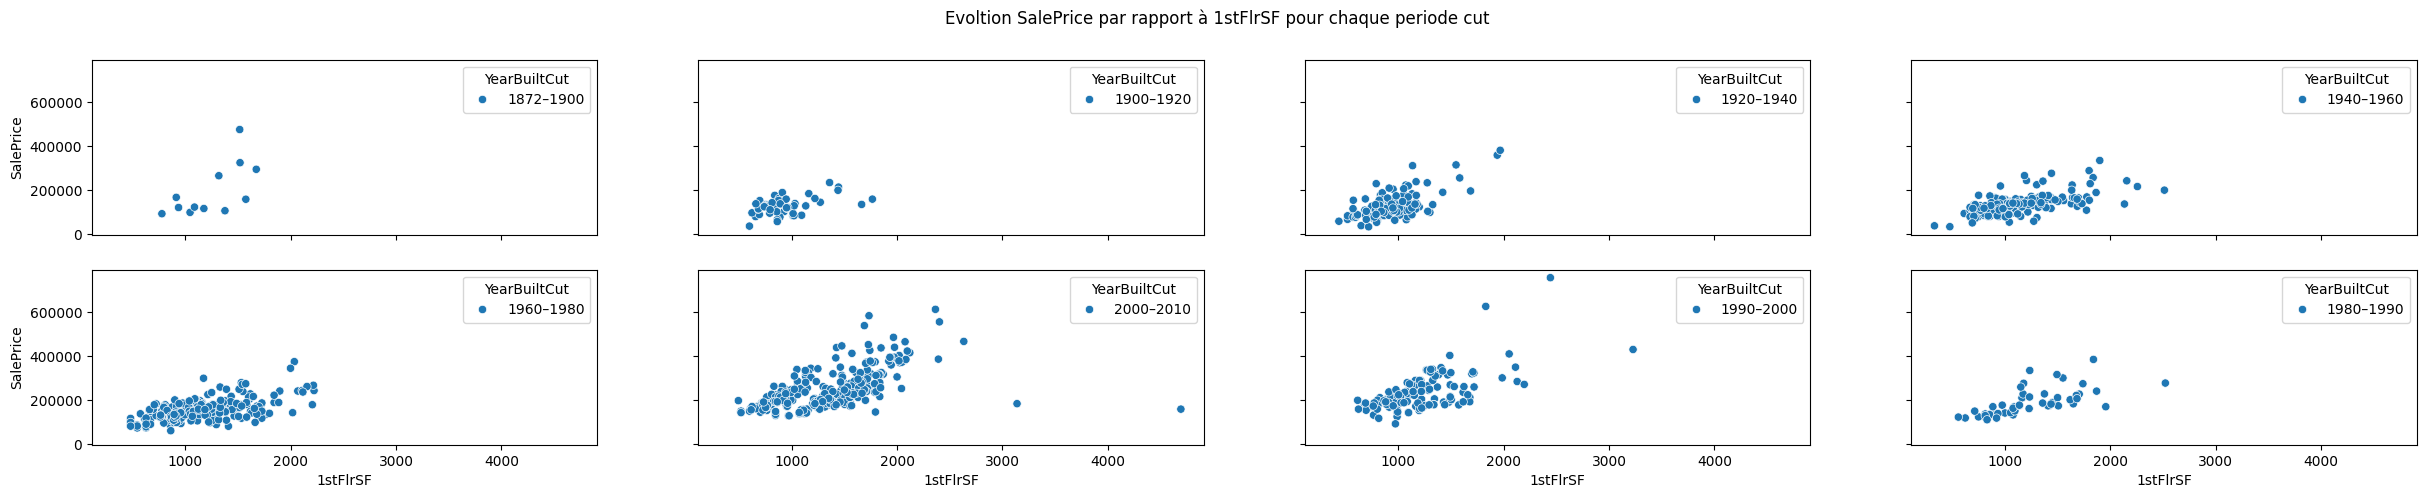

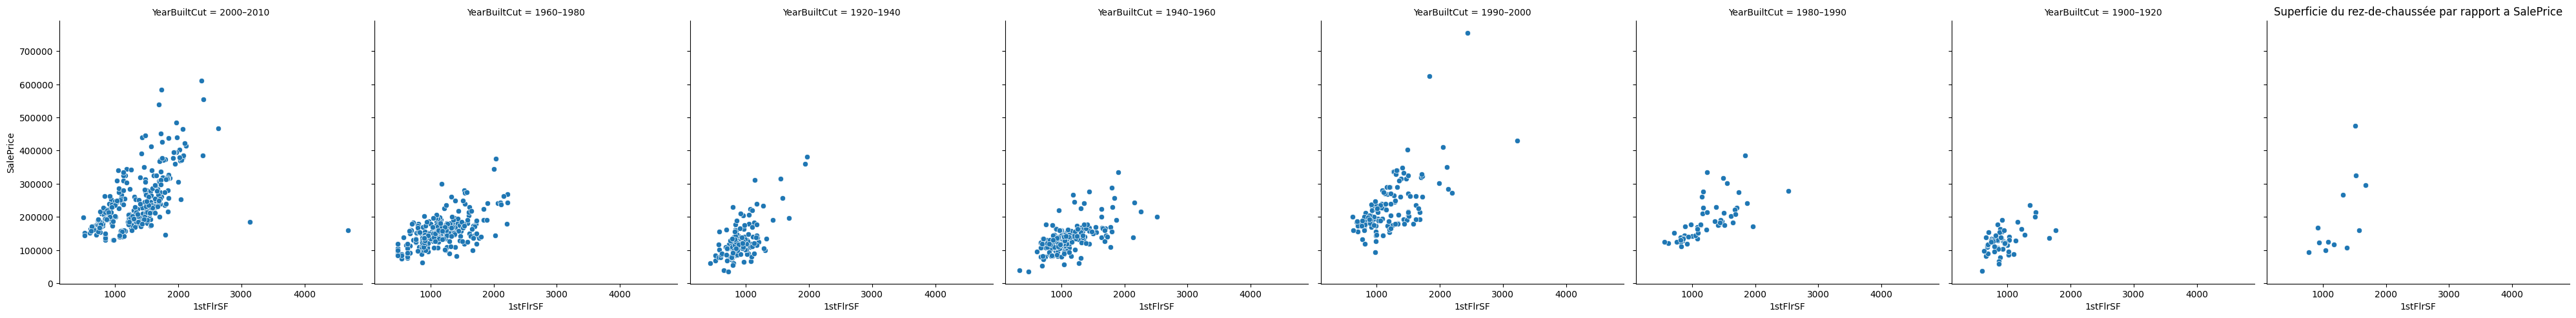

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(30,5))
plt.figure(figsize=(15,5))

sb.scatterplot(df_test, x='1stFlrSF', y='SalePrice', hue='YearBuiltCut', legend=True, ax=ax[0])
ax[0].set_title("Superficie du rez-de-chaussée par rapport a SalePrice")

sb.lineplot(x=df_origin['1stFlrSF'].apply(lambda x : (x // 100)*100), y=df_origin['SalePrice'], estimator='mean', ax=ax[1])
ax[1].set_title("Evolution de Saleprice par rapport à 1stFlrSF de 1854-2010 ")

df_mean = df_test.groupby('YearBuiltCut')[['1stFlrSF', 'SalePrice']].mean().reset_index()
sb.scatterplot(df_mean, x='1stFlrSF', y='SalePrice', legend=True, ax=ax[2])
ax[2].plot(df_mean['1stFlrSF'], df_mean['SalePrice'], 'o-')

for i, row in df_mean.iterrows():
    ax[2].text(row['1stFlrSF'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax[2].set_title("Evolution de la moyenne de salePrice par rapport à la moyenne de 1stFlrSF par période de temps (de 1854 à 2010)")

fig, ax_2 = plt.subplots(2,4,figsize=(30,5), sharex=True,sharey=True)
fig.suptitle("Evoltion SalePrice par rapport à 1stFlrSF pour chaque periode cut")
for index,i in enumerate(df_sort_yearcut['YearBuiltCut'].unique()):
    if index > 3:
        df_save = df_test.query(f"YearBuiltCut == '{i}'")
        sb.scatterplot(x=df_save['1stFlrSF'], y=df_save['SalePrice'], hue='YearBuiltCut', data=df_save, ax=ax_2[1][len(ax_2[0])-index])
    else:
        df_save = df_test.query(f"YearBuiltCut == '{i}'")
        sb.scatterplot(x=df_save['1stFlrSF'], y=df_save['SalePrice'], hue='YearBuiltCut', data=df_save, ax=ax_2[0][index])


# Meme chose que precedement mais juste pour exemple
sb.relplot(df_test, x='1stFlrSF', y='SalePrice', col='YearBuiltCut')
plt.title("Superficie du rez-de-chaussée par rapport a SalePrice")
plt.show()
fig.tight_layout()

# ### YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.

In [531]:
df_origin.groupby('YearBuilt')['SalePrice'].describe()

count           mean            std       min        25%       50%  \
YearBuilt                                                                       
1872         1.0  122000.000000            NaN  122000.0  122000.00  122000.0   
1875         1.0   94000.000000            NaN   94000.0   94000.00   94000.0   
1880         4.0  200619.750000   93021.399116  117500.0  122375.00  194989.5   
1882         1.0  168000.000000            NaN  168000.0  168000.00  168000.0   
1885         1.0  100000.000000            NaN  100000.0  100000.00  100000.0   
...          ...            ...            ...       ...        ...       ...   
2006        47.0  254160.659574   83577.509253  147000.0  194000.00  235000.0   
2007        39.0  249554.974359   73469.245994  146000.0  189625.00  235128.0   
2008        20.0  342105.150000  116625.860707  160000.0  251307.25  322500.0   
2009        13.0  286007.769231  126319.870713  164500.0  208300.00  224500.0   
2010         1.0  394432.000000            NaN  394432.0  394432.00  394432.0   

                 75%       max  
YearBuilt                       
1872       122000.00  122000.0  
1875        94000.00   94000.0  
1880       273234.25  295000.0  
1882       168000.00  168000.0  
1885       100000.00  100000.0  
...              ...       ...  
2006       279750.00  465000.0  
2007       304738.50  426000.0  
2008       407528.00  582933.0  
2009       370878.00  611657.0  
2010       394432.00  394432.0  

[110 rows x 8 columns]

In [532]:
df_mean = df_origin.groupby('YearBuilt')['SalePrice'].mean().reset_index()

def cut_years(x):
    if x < 1900:
        return "1872–1899"
    elif x < 1930:
        return "1900–1929"
    elif x < 1960:
        return "1930–1959"
    elif x < 1990:
        return "1960–1989"
    elif x <= 2010:
        return "1990–2010"
    else:
        return "Après 2010"

df_mean['YearBuilt'] = df_mean['YearBuilt'].apply(cut_years)
df_mean

YearBuilt      SalePrice
0    1872–1899  122000.000000
1    1872–1899   94000.000000
2    1872–1899  200619.750000
3    1872–1899  168000.000000
4    1872–1899  100000.000000
..         ...            ...
105  1990–2010  254160.659574
106  1990–2010  249554.974359
107  1990–2010  342105.150000
108  1990–2010  286007.769231
109  1990–2010  394432.000000

[110 rows x 2 columns]

In [533]:
df_mean_2 = df_mean.groupby('YearBuilt')['SalePrice'].mean().reset_index()
df_mean_2

YearBuilt      SalePrice
0  1872–1899  182546.218750
1  1900–1929  126609.533171
2  1930–1959  141618.535616
3  1960–1989  167753.603099
4  1990–2010  244821.515049

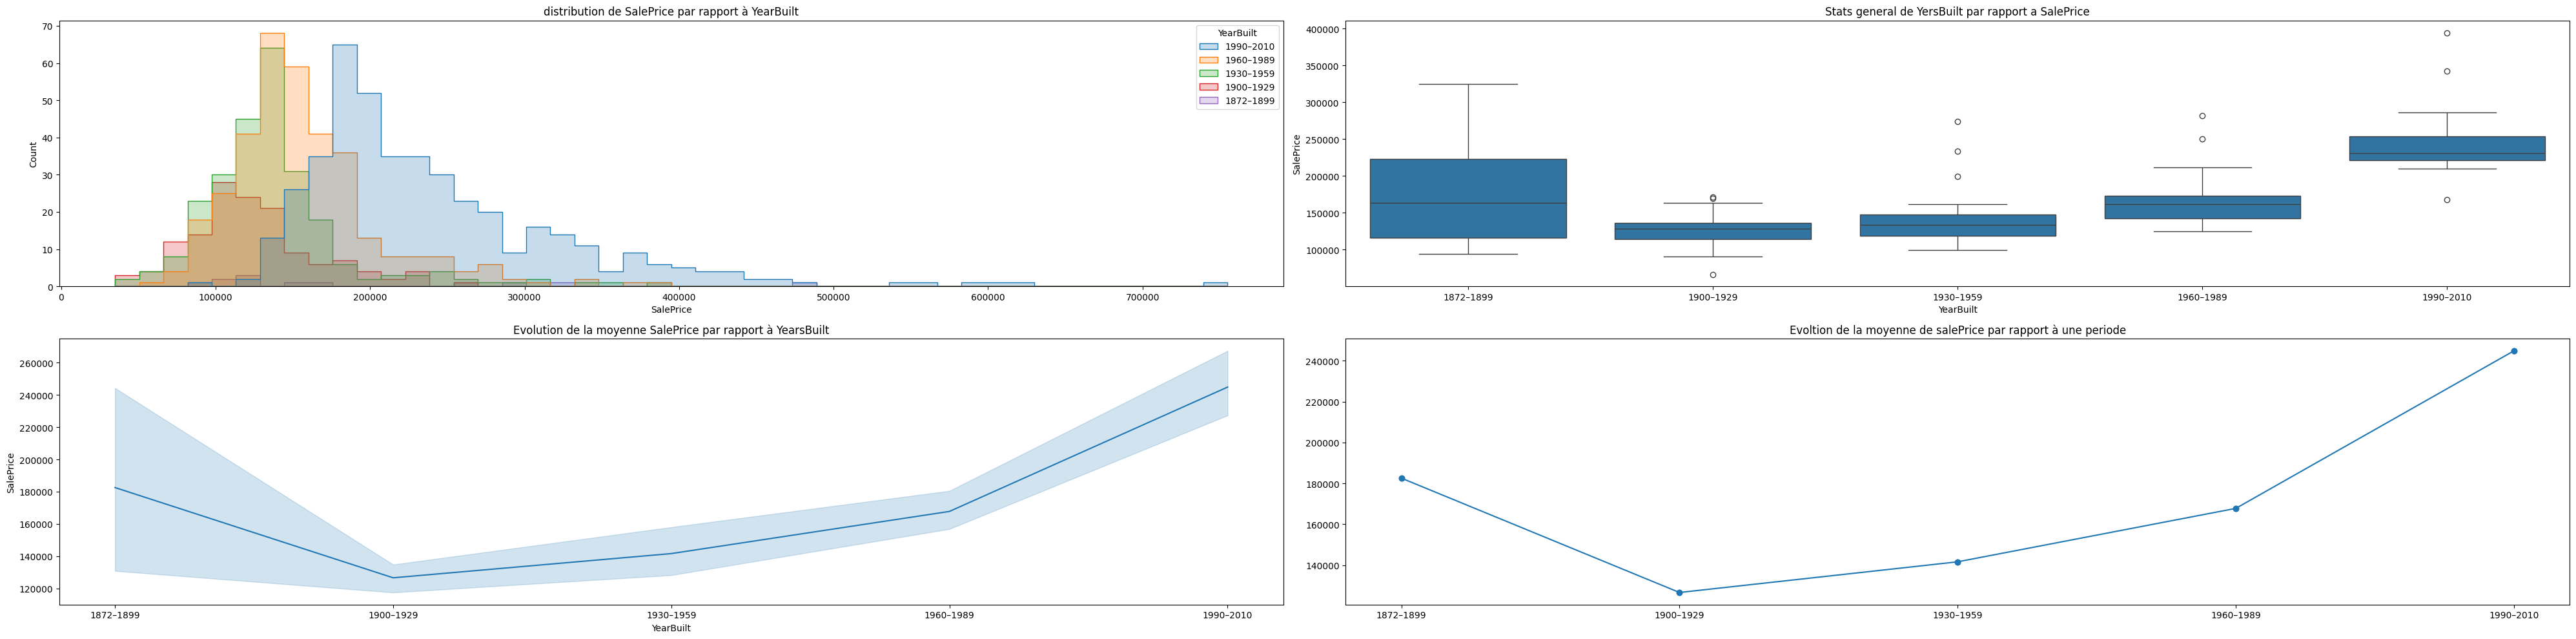

In [534]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(40,10))
# Exemple : palette personnalisée (tu choisis les couleurs)

sb.histplot(df_origin, x='SalePrice', hue=df_origin['YearBuilt'].apply(cut_years), element="step", ax=ax1)
ax1.set_title("distribution de SalePrice par rapport à YearBuilt")

sb.boxplot(df_origin, x=df_mean['YearBuilt'], y=df_mean['SalePrice'], ax=ax2)
ax2.set_title("Stats general de YersBuilt par rapport a SalePrice")

sb.lineplot(x=df_mean['YearBuilt'], y=df_mean['SalePrice'], estimator='mean', ax=ax3)
ax3.set_title("Evolution de la moyenne SalePrice par rapport à YearsBuilt")


ax4.scatter(df_mean_2['YearBuilt'],df_mean_2['SalePrice'])
ax4.plot(df_mean_2['YearBuilt'],df_mean_2['SalePrice'], "o-")
ax4.set_title("Evoltion de la moyenne de salePrice par rapport à une periode")

fig.tight_layout()

# ### YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.

In [161]:
df_origin.groupby('YearRemodAdd')['SalePrice'].describe()

count           mean            std       min        25%  \
YearRemodAdd                                                             
1950          145.0  116557.406897   39404.693769   34900.0   91000.00   
1951            3.0  126300.000000   21051.603264  102000.0  119950.00   
1952            4.0  106873.250000   48235.186972   55993.0   75498.25   
1953           10.0  147640.000000   48205.075805   79900.0  113250.00   
1954           13.0  117769.230769   15459.106519   93000.0  110000.00   
...             ...            ...            ...       ...        ...   
2006           76.0  228066.421053   87557.561984   79000.0  166427.50   
2007           60.0  222343.133333   80325.752673   64500.0  170800.00   
2008           37.0  263793.621622  113722.253091   97000.0  160000.00   
2009           17.0  287451.647059  120267.434730  138500.0  208300.00   
2010            5.0  350456.200000  185798.859351  127000.0  224000.00   

                   50%       75%       max  
YearRemodAdd                                
1950          116000.0  135000.0  256000.0  
1951          137900.0  138450.0  139000.0  
1952          102750.0  134125.0  166000.0  
1953          152250.0  164500.0  225000.0  
1954          118000.0  131500.0  140000.0  
...                ...       ...       ...  
2006          205450.0  266125.0  465000.0  
2007          204000.0  276875.0  440000.0  
2008          250580.0  339750.0  555000.0  
2009          252678.0  370878.0  582933.0  
2010          394432.0  395192.0  611657.0  

[61 rows x 8 columns]

In [509]:
df_mean = df_origin.groupby('YearRemodAdd')['SalePrice'].mean().reset_index()
def cut_years(x):
    if x < 1980:
        return "1950–1980"
    elif x < 2000:
        return "1980–2000"
    else:
        return "2000 2010"
df_mean['YearRemodAdd'] = df_mean['YearRemodAdd'].apply(cut_years)
df_mean

YearRemodAdd      SalePrice
0     1950–1980  116557.406897
1     1950–1980  126300.000000
2     1950–1980  106873.250000
3     1950–1980  147640.000000
4     1950–1980  117769.230769
..          ...            ...
56    2000 2010  228066.421053
57    2000 2010  222343.133333
58    2000 2010  263793.621622
59    2000 2010  287451.647059
60    2000 2010  350456.200000

[61 rows x 2 columns]

In [ ]:
df_mean_2 = df_origin.groupby(['YearRemodAdd', 'YearBuilt'])['SalePrice'].mean().reset_index()
df_mean_2

def cut_years_2(x):
    if x < 1900:
        return "1872–1899"
    elif x < 1930:
        return "1900–1929"
    elif x < 1960:
        return "1930–1959"
    elif x < 1990:
        return "1960–1989"
    elif x <= 2010:
        return "1990–2010"
    else:
        return "Après 2010"
    
df_mean_2['YearBuilt'] = df_mean_2['YearBuilt'].apply(cut_years_2)
df_mean_2['YearRemodAdd'] = df_mean_2['YearRemodAdd'].apply(cut_years)
df_mean_2


YearRemodAdd  YearBuilt  SalePrice
0      1950–1980  1872–1899   117500.0
1      1950–1980  1900–1929    96944.0
2      1950–1980  1900–1929   105600.0
3      1950–1980  1900–1929   130000.0
4      1950–1980  1900–1929   111250.0
..           ...        ...        ...
362    2000 2010  1990–2010   388865.2
363    2000 2010  1990–2010   248725.2
364    2000 2010  1960–1989   127000.0
365    2000 2010  1990–2010   410283.0
366    2000 2010  1990–2010   394432.0

[367 rows x 3 columns]

In [525]:
df_mean_2 = df_mean_2.groupby(['YearRemodAdd', 'YearBuilt'])['SalePrice'].mean().reset_index()
df_mean_2

YearRemodAdd  YearBuilt      SalePrice
0     1950–1980  1872–1899  112500.000000
1     1950–1980  1900–1929  123167.898190
2     1950–1980  1930–1959  127938.679207
3     1950–1980  1960–1989  151723.115604
4     1980–2000  1872–1899  177500.000000
5     1980–2000  1900–1929  140543.160000
6     1980–2000  1930–1959  163373.684211
7     1980–2000  1960–1989  197404.960317
8     1980–2000  1990–2010  229099.164048
9     2000 2010  1872–1899  295326.333333
10    2000 2010  1900–1929  130787.500000
11    2000 2010  1930–1959  157771.207317
12    2000 2010  1960–1989  164704.878049
13    2000 2010  1990–2010  247469.601330

/tmp/ipykernel_12481/4101428104.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df_mean['YearRemodAdd'], y=df_mean['SalePrice'], ax=ax3, palette=palette_custom)


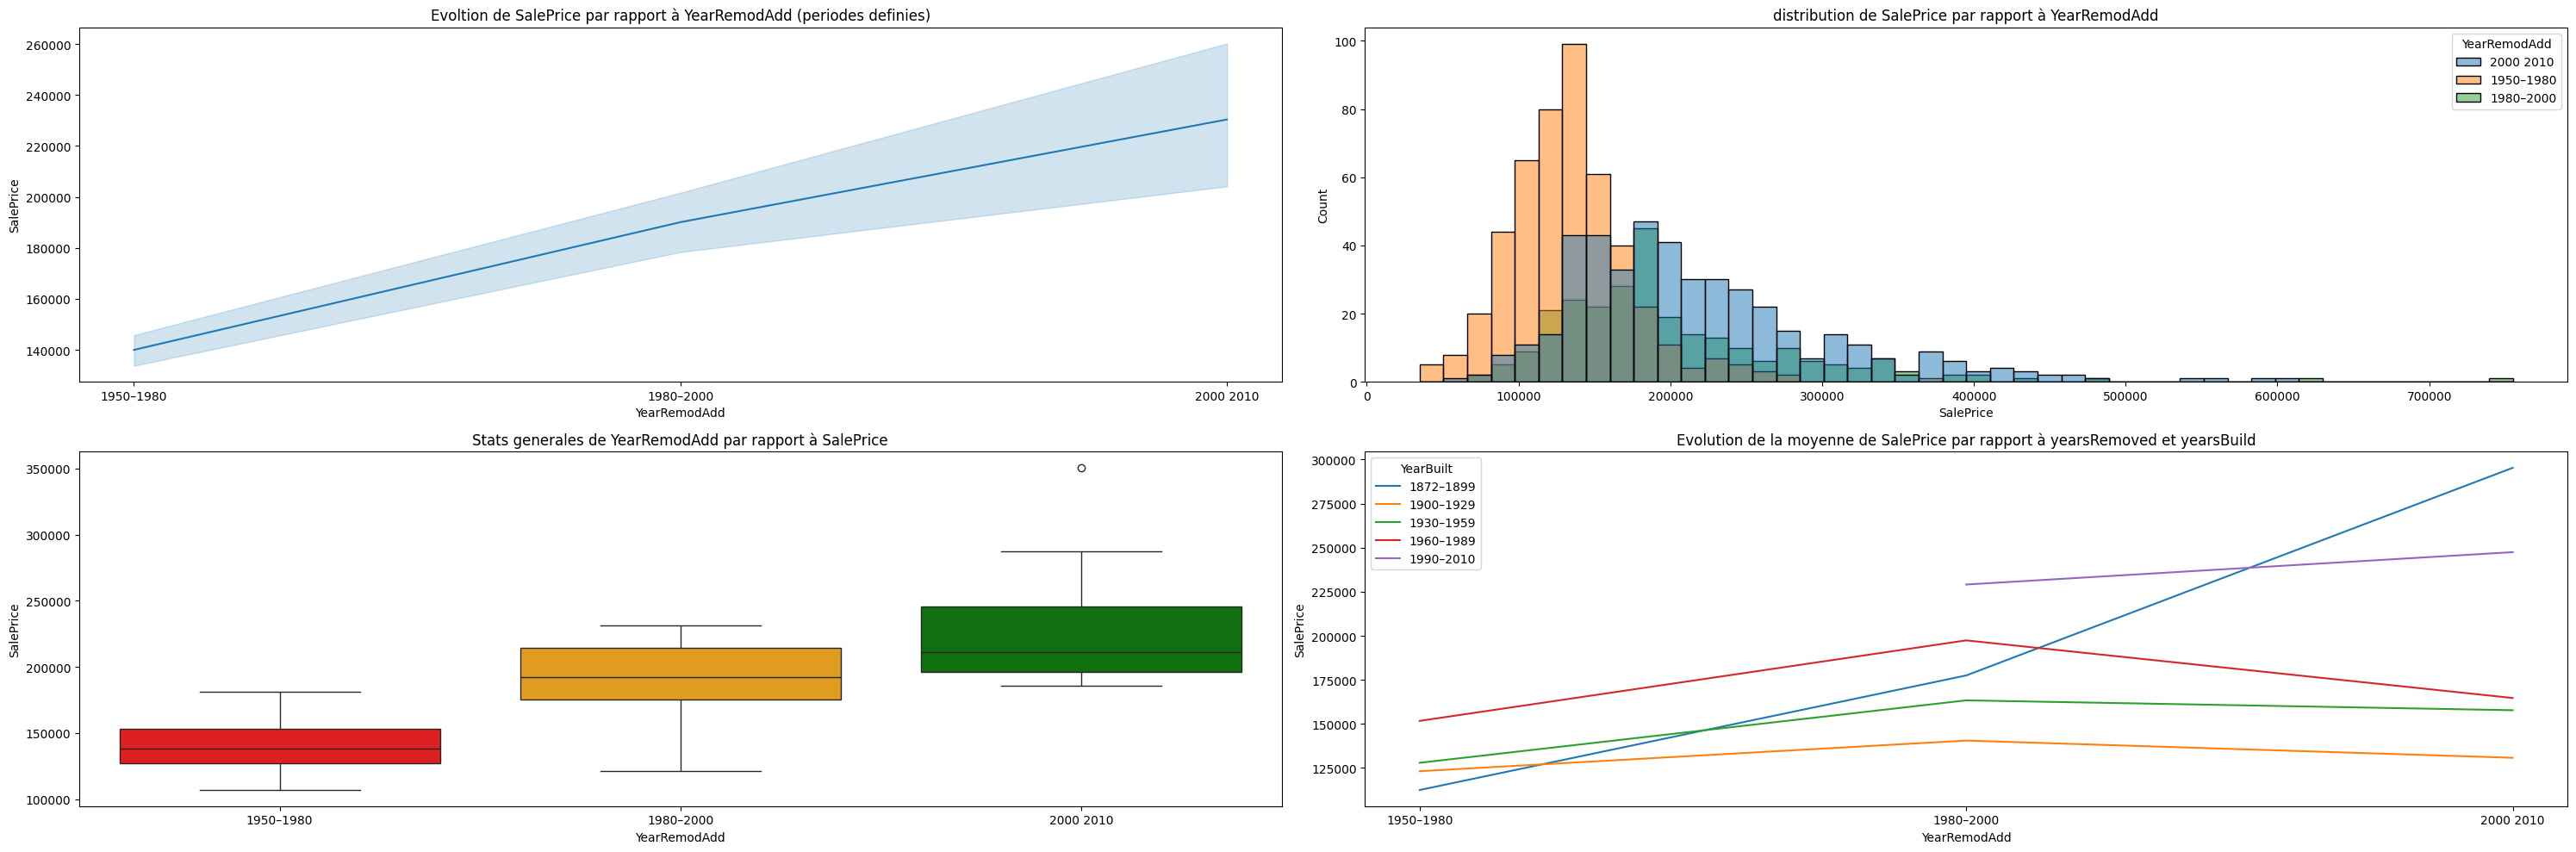

In [530]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(30,10))

sb.lineplot(x=df_mean['YearRemodAdd'], y=df_mean['SalePrice'], ax=ax1)
ax1.set_title("Evoltion de SalePrice par rapport à YearRemodAdd (periodes definies)")

sb.histplot(df_origin, hue=df_origin['YearRemodAdd'].apply(cut_years), x=df_origin['SalePrice'], legend=True, ax=ax2)
ax2.set_title("distribution de SalePrice par rapport à YearRemodAdd")

# Create boxplot using seaborn which handles the grouping automatically
palette_custom = {
    "1950–1980": "red",
    "1980–2000": "orange",
    "2000 2010": "green"
}
sb.boxplot(x=df_mean['YearRemodAdd'], y=df_mean['SalePrice'], ax=ax3, palette=palette_custom)
ax3.set_title("Stats generales de YearRemodAdd par rapport à SalePrice")
ax3.set_xlabel("YearRemodAdd")
ax3.set_ylabel("SalePrice")

sb.lineplot(x=df_mean_2['YearRemodAdd'], y=df_mean_2['SalePrice'], hue=df_mean_2['YearBuilt'], ax=ax4)
ax4.set_title("Evolution de la moyenne de SalePrice par rapport à yearsRemoved et yearsBuild")

plt.tight_layout()

# ### GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.

In [550]:
df_origin.groupby('GarageCars')['SalePrice'].describe()

count           mean            std       min       25%       50%  \
GarageCars                                                                      
0            66.0  102136.363636   32201.230919   34900.0   82125.0   97500.0   
1           312.0  126211.243590   28852.250127   35311.0  110000.0  127000.0   
2           654.0  184143.371560   52494.032572   55993.0  148700.0  178000.0   
3           144.0  311432.000000  104137.033932   87000.0  245262.5  305450.0   
4             4.0  198819.750000   58641.130278  123000.0  180750.0  203150.0   

                  75%       max  
GarageCars                       
0           118375.00  200500.0  
1           140000.00  266500.0  
2           212000.00  430000.0  
3           372426.50  755000.0  
4           221219.75  265979.0

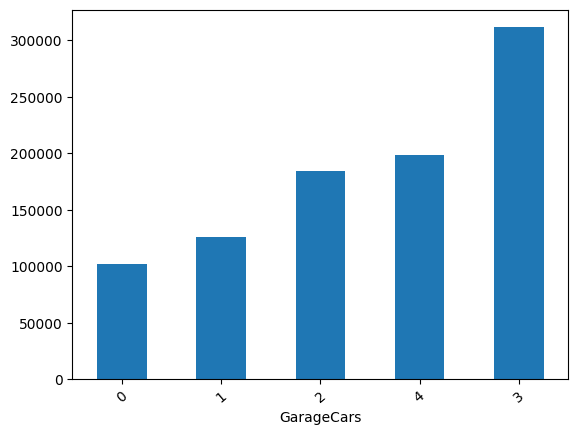

In [571]:
df_origin.groupby('GarageCars')['SalePrice'].mean().sort_values(ascending=True).plot(kind='bar', rot=40)
plt.show()

In [578]:
df_mean = df_origin.groupby(['YearBuilt', 'GarageCars'])['SalePrice'].mean().reset_index()
def cut_years_2(x):
    if x < 1900:
        return "1872–1899"
    elif x < 1930:
        return "1900–1929"
    elif x < 1960:
        return "1930–1959"
    elif x < 1990:
        return "1960–1989"
    elif x <= 2010:
        return "1990–2010"
    else:
        return "Après 2010"
df_mean['YearBuilt'] = df_mean['YearBuilt'].apply(cut_years_2)
df_mean_2 = df_mean.groupby(['YearBuilt', 'GarageCars'])['SalePrice'].mean().reset_index()
df_mean_2

YearBuilt  GarageCars      SalePrice
0   1872–1899           0  108000.000000
1   1872–1899           1  109416.666667
2   1872–1899           2  217500.000000
3   1872–1899           3  385000.000000
4   1872–1899           4  265979.000000
5   1900–1929           0  106356.071429
6   1900–1929           1  119478.818421
7   1900–1929           2  152032.973856
8   1900–1929           3  112966.666667
9   1930–1959           0   94598.333333
10  1930–1959           1  132329.284312
11  1930–1959           2  160941.642479
12  1930–1959           3  212000.000000
13  1960–1989           0  112635.416667
14  1960–1989           1  125504.505682
15  1960–1989           2  178557.928752
16  1960–1989           3  219725.000000
17  1960–1989           4  161500.000000
18  1990–2010           0  125000.000000
19  1990–2010           1  134333.333333
20  1990–2010           2  208385.726361
21  1990–2010           3  324215.774524
22  1990–2010           4  206300.000000

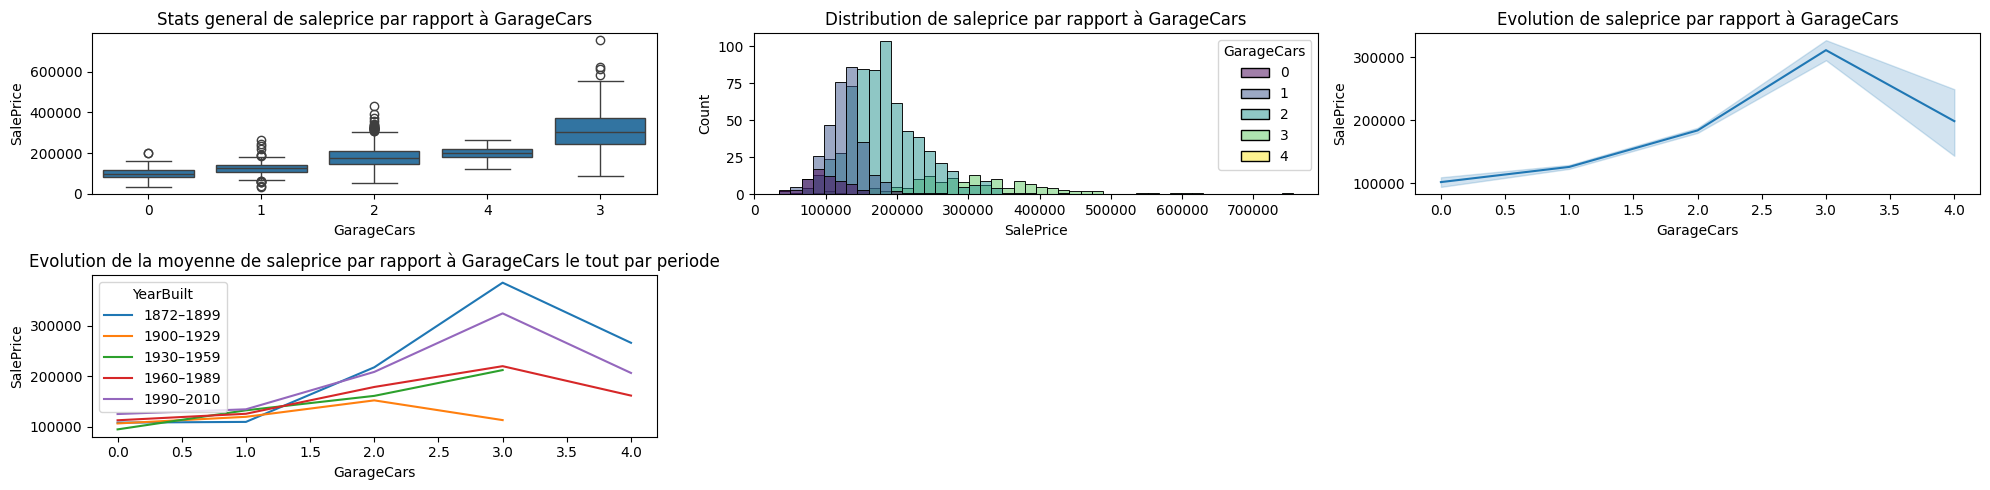

In [585]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20,5))
order = [0, 1, 2, 4, 3]

sb.boxplot(x=df_origin['GarageCars'], y=df_origin['SalePrice'], legend=True, ax=ax1, order=order)
ax1.set_title("Stats general de saleprice par rapport à GarageCars")

sb.histplot(hue=df_origin['GarageCars'], x=df_origin['SalePrice'], legend=True, ax=ax2, palette="viridis")
ax2.set_title("Distribution de saleprice par rapport à GarageCars")

sb.lineplot(x=df_origin['GarageCars'], y=df_origin['SalePrice'], ax=ax3)
ax3.set_title("Evolution de saleprice par rapport à GarageCars")

sb.lineplot(x=df_mean_2['GarageCars'], y=df_mean_2['SalePrice'], hue=df_mean_2['YearBuilt'], ax=ax4)
ax4.set_title("Evolution de la moyenne de saleprice par rapport à GarageCars le tout par periode")

fig.delaxes(ax5)
fig.delaxes(ax6)
fig.tight_layout()

# ###GarageArea : Taille du garage en pieds carrés.

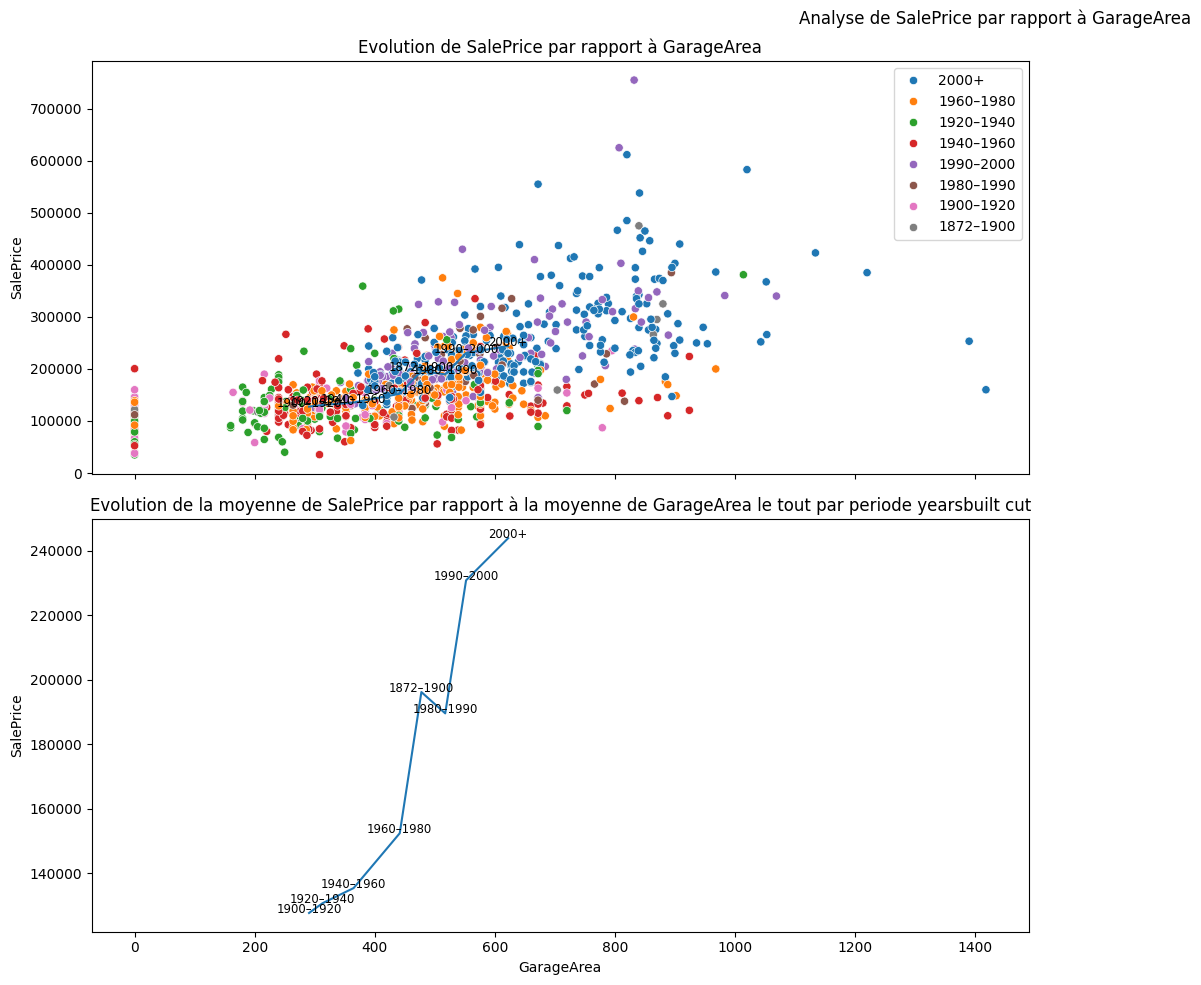

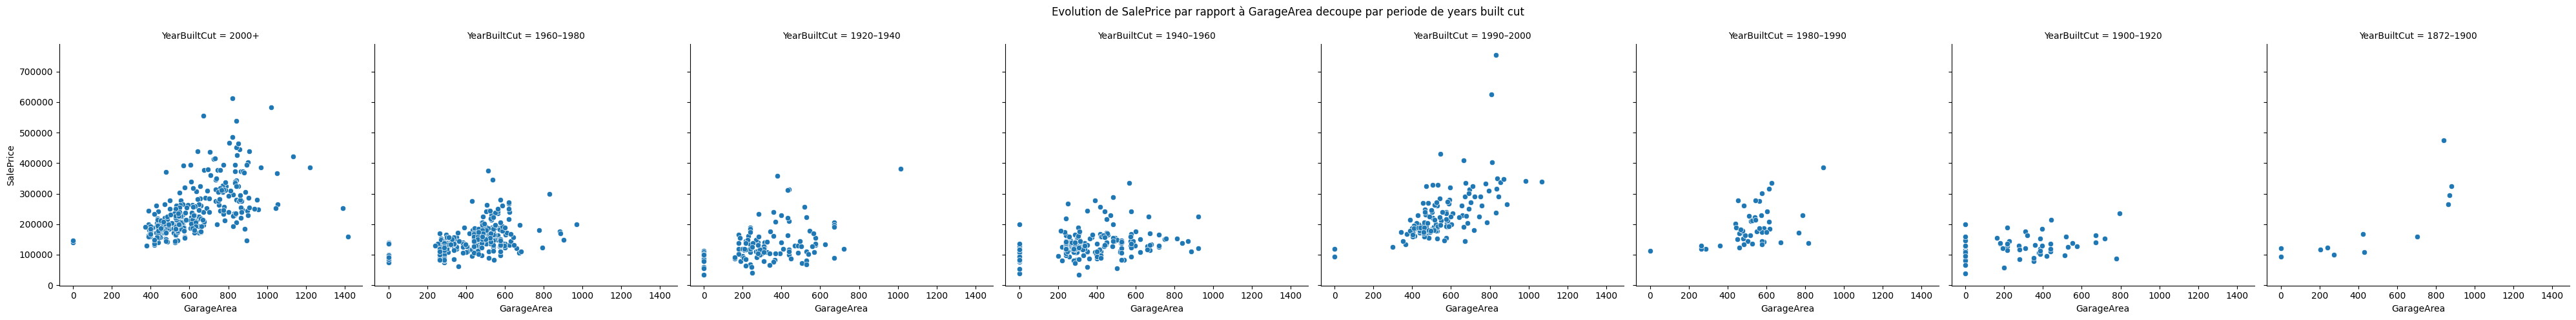

In [165]:
fig, ax = plt.subplots(2,2,figsize=(20,10),sharex=True)

df_mean = df_test.groupby('YearBuiltCut')[['GarageArea','SalePrice']].mean().reset_index()

sb.scatterplot(x=df_test['GarageArea'],y=df_test['SalePrice'], hue=df_test['YearBuiltCut'], legend=True, ax=ax[0][0])
sb.lineplot(x=df_mean['GarageArea'],y=df_mean['SalePrice'], legend=True, ax=ax[0][0], estimator='mean')
for _, row in df_mean.iterrows():
    ax[0][0].text(row['GarageArea'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax[0][0].set_title("Evolution de SalePrice par rapport à GarageArea")
ax[0][0].set_xlabel("GarageArea")
ax[0][0].set_ylabel("SalePrice")


sb.lineplot(x=df_mean['GarageArea'],y=df_mean['SalePrice'], legend=True, ax=ax[1][0], estimator='mean')
for _, row in df_mean.iterrows():
    ax[1][0].text(row['GarageArea'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax[1][0].set_title("Evolution de la moyenne de SalePrice par rapport à la moyenne de GarageArea le tout par periode yearsbuilt cut")

fig.suptitle("Analyse de SalePrice par rapport à GarageArea")

sb.relplot(x=df_test['GarageArea'],y=df_test['SalePrice'], col=df_test['YearBuiltCut'])
plt.suptitle("Evolution de SalePrice par rapport à GarageArea decoupe par periode de years built cut")
plt.tight_layout()

fig.delaxes(ax[0][1])
fig.delaxes(ax[1][1])
fig.tight_layout()
                       

# ###FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.

In [206]:
df_test.groupby('FullBath')['SalePrice'].describe()

count           mean            std       min       25%       50%  \
FullBath                                                                      
0           7.0  181781.571429  113363.119242   35311.0  126479.5  145000.0   
1         539.0  133716.115028   42758.192196   34900.0  110000.0  131500.0   
2         609.0  213717.361248   73766.860864   64500.0  170000.0  195000.0   
3          25.0  347633.200000  154254.677760  170000.0  200624.0  325000.0   

               75%       max  
FullBath                      
0         227100.5  385000.0  
1         149700.0  423000.0  
2         248000.0  611657.0  
3         430000.0  755000.0

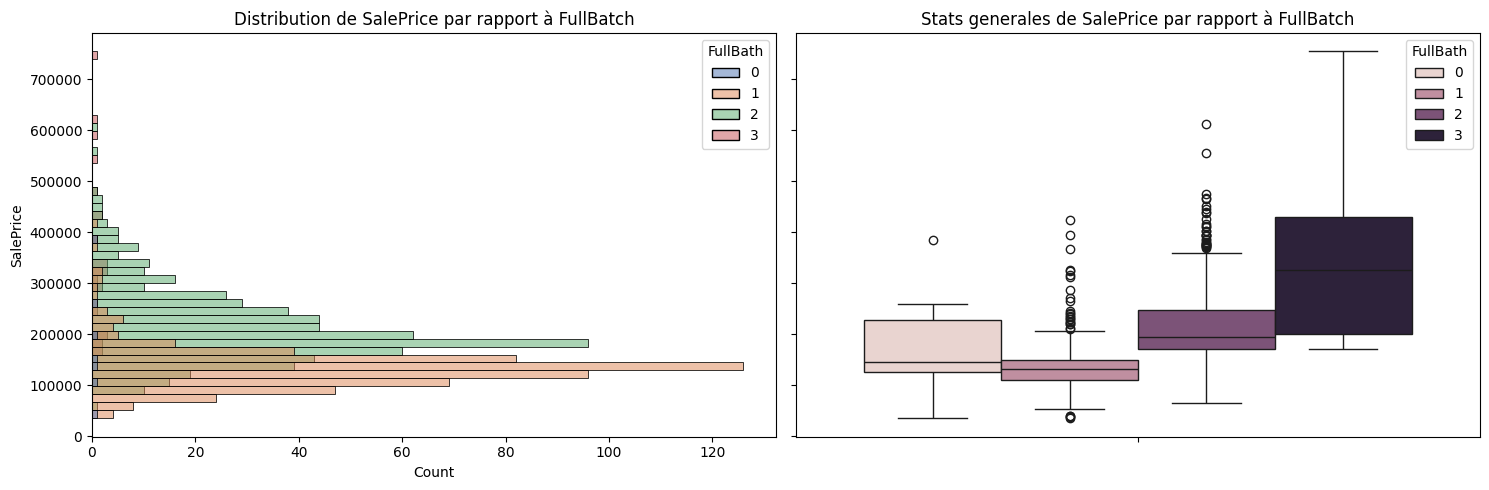

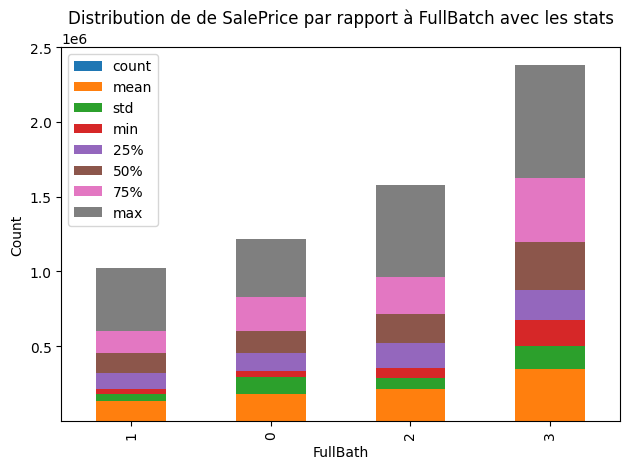

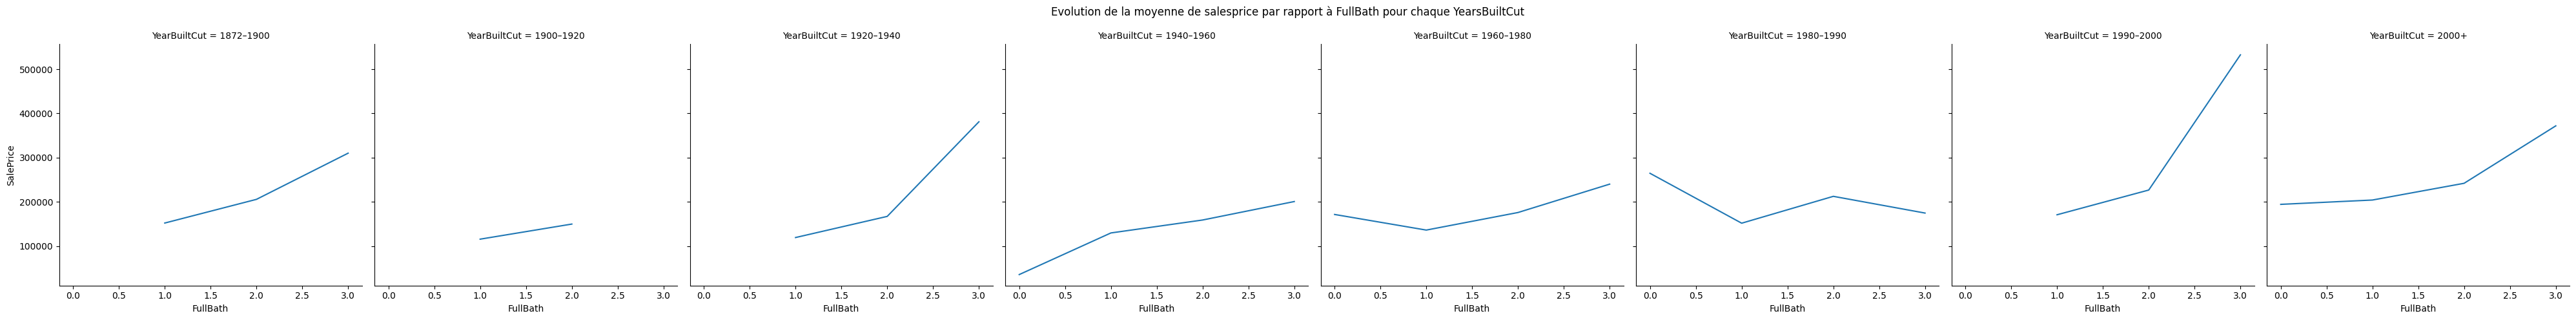

In [246]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)

sb.histplot(y=df_test['SalePrice'], hue=df_test['FullBath'], ax=ax1, palette='deep', legend=True)
ax1.set_title("Distribution de SalePrice par rapport à FullBatch")

sb.boxplot(hue=df_test['FullBath'], y=df_test['SalePrice'], ax=ax2, legend=True)
ax2.set_title("Stats generales de SalePrice par rapport à FullBatch")
fig.tight_layout()

df_stats = df_test.groupby('FullBath')['SalePrice'].describe().sort_values(ascending=True, by='mean')
df_stats.plot(kind='bar', stacked=True, legend=True)
plt.ylabel("Count")
plt.title("Distribution de de SalePrice par rapport à FullBatch avec les stats")
plt.tight_layout()
plt.show()

df_mean = df_test.groupby(['YearBuiltCut', 'FullBath'])['SalePrice'].mean().reset_index()
sb.relplot(y=df_mean['SalePrice'], x=df_mean['FullBath'], col=df_mean['YearBuiltCut'], kind='line')
plt.suptitle("Evolution de la moyenne de salesprice par rapport à FullBath pour chaque YearsBuiltCut")
plt.tight_layout()


# ###TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.

In [233]:
df_test.groupby('TotRmsAbvGrd')['SalePrice'].describe()

count           mean            std       min       25%  \
TotRmsAbvGrd                                                            
2               1.0   39300.000000            NaN   39300.0   39300.0   
3              13.0  100138.461538   29751.037474   60000.0   80500.0   
4              83.0  121846.337349   42224.682494   34900.0   91150.0   
5             223.0  138754.959641   47106.370335   55000.0  110000.0   
6             337.0  161323.664688   49489.368609   37900.0  130500.0   
7             259.0  197826.868726   67009.341464   79900.0  155000.0   
8             145.0  213529.724138   77251.879181   81000.0  154000.0   
9              59.0  254544.932203   80652.436656   98000.0  201762.0   
10             34.0  306033.294118  149384.732451  118500.0  169975.0   
11             14.0  322460.357143  130583.236289  107500.0  249500.0   
12             11.0  280971.454545  165510.918593  142953.0  175000.0   
14              1.0  200000.000000            NaN  200000.0  200000.0   

                   50%       75%       max  
TotRmsAbvGrd                                
2              39300.0   39300.0   39300.0  
3              86000.0  131500.0  149300.0  
4             120000.0  139500.0  260000.0  
5             129900.0  155500.0  385000.0  
6             155000.0  185850.0  374000.0  
7             182900.0  231750.0  465000.0  
8             200000.0  253293.0  466500.0  
9             250000.0  311906.5  426000.0  
10            300000.0  373650.0  755000.0  
11            311738.5  372000.0  611657.0  
12            200000.0  362500.0  582933.0  
14            200000.0  200000.0  200000.0

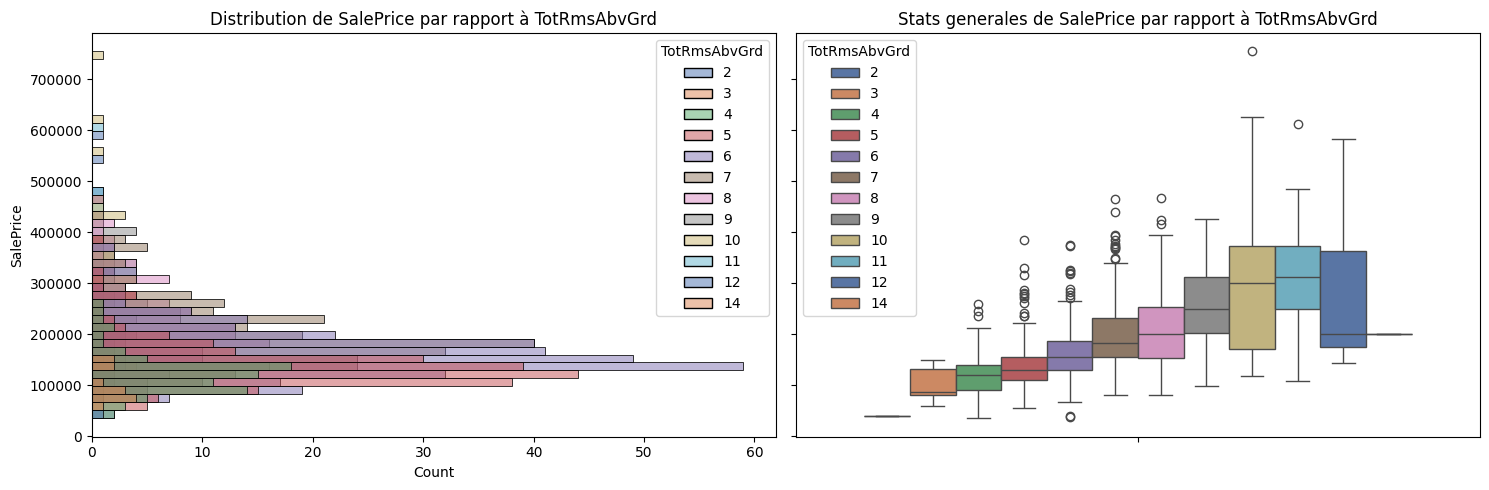

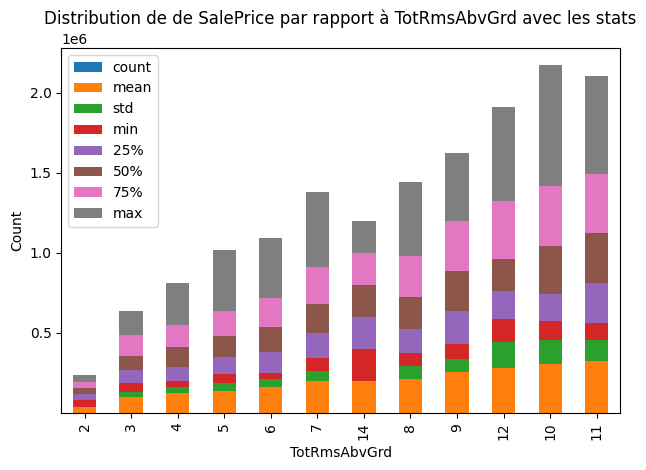

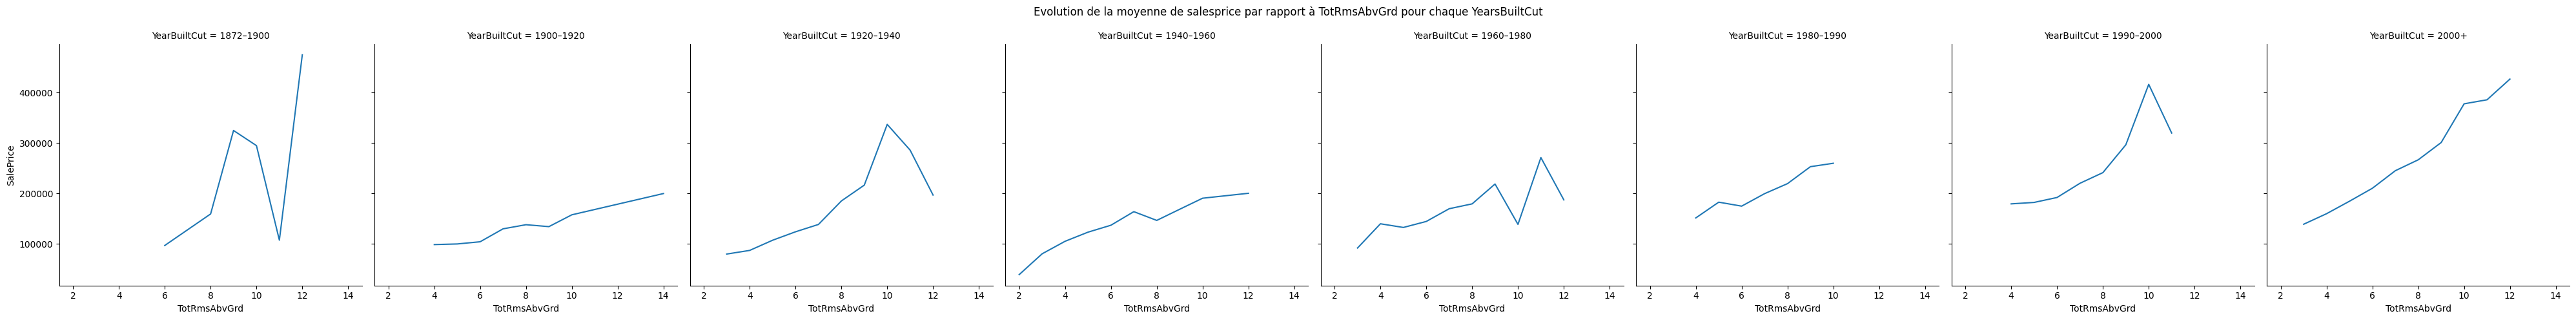

In [245]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)

sb.histplot(y=df_test['SalePrice'], hue=df_test['TotRmsAbvGrd'], ax=ax1, palette='deep', legend=True)
ax1.set_title("Distribution de SalePrice par rapport à TotRmsAbvGrd")

sb.boxplot(hue=df_test['TotRmsAbvGrd'], y=df_test['SalePrice'], ax=ax2, legend=True, palette='deep')
ax2.set_title("Stats generales de SalePrice par rapport à TotRmsAbvGrd")
fig.tight_layout()

df_stats = df_test.groupby('TotRmsAbvGrd')['SalePrice'].describe().sort_values(ascending=True, by='mean')
df_stats.plot(kind='bar', stacked=True, legend=True)
plt.ylabel("Count")
plt.title("Distribution de de SalePrice par rapport à TotRmsAbvGrd avec les stats")
plt.tight_layout()
plt.show()

df_mean = df_test.groupby(['YearBuiltCut', 'TotRmsAbvGrd'])['SalePrice'].mean().reset_index()
sb.relplot(y=df_mean['SalePrice'], x=df_mean['TotRmsAbvGrd'], col=df_mean['YearBuiltCut'], kind='line')
plt.suptitle("Evolution de la moyenne de salesprice par rapport à TotRmsAbvGrd pour chaque YearsBuiltCut")
plt.tight_layout()

# ###KitchenQual : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.

/tmp/ipykernel_1574/1962094901.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df_test['KitchenQual'], y=df_test['SalePrice'], ax=ax2, legend=True, palette='deep', order=df_stats)


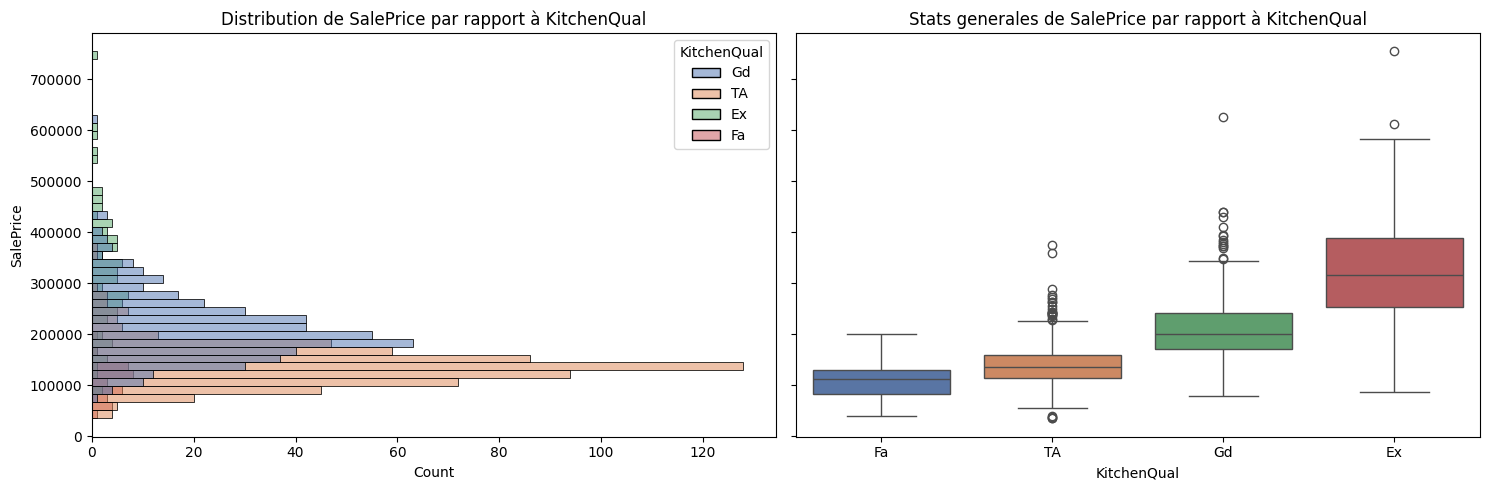

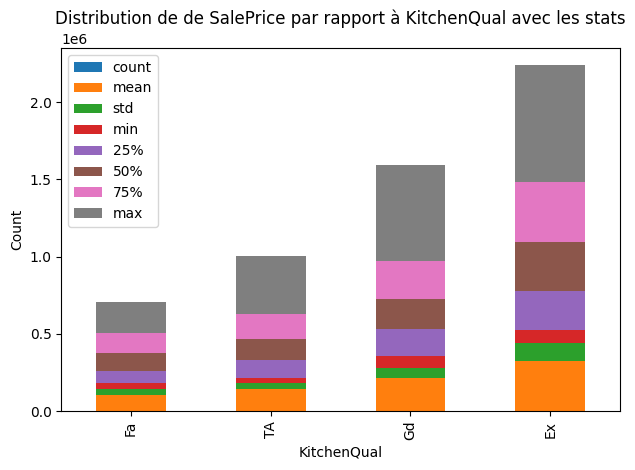

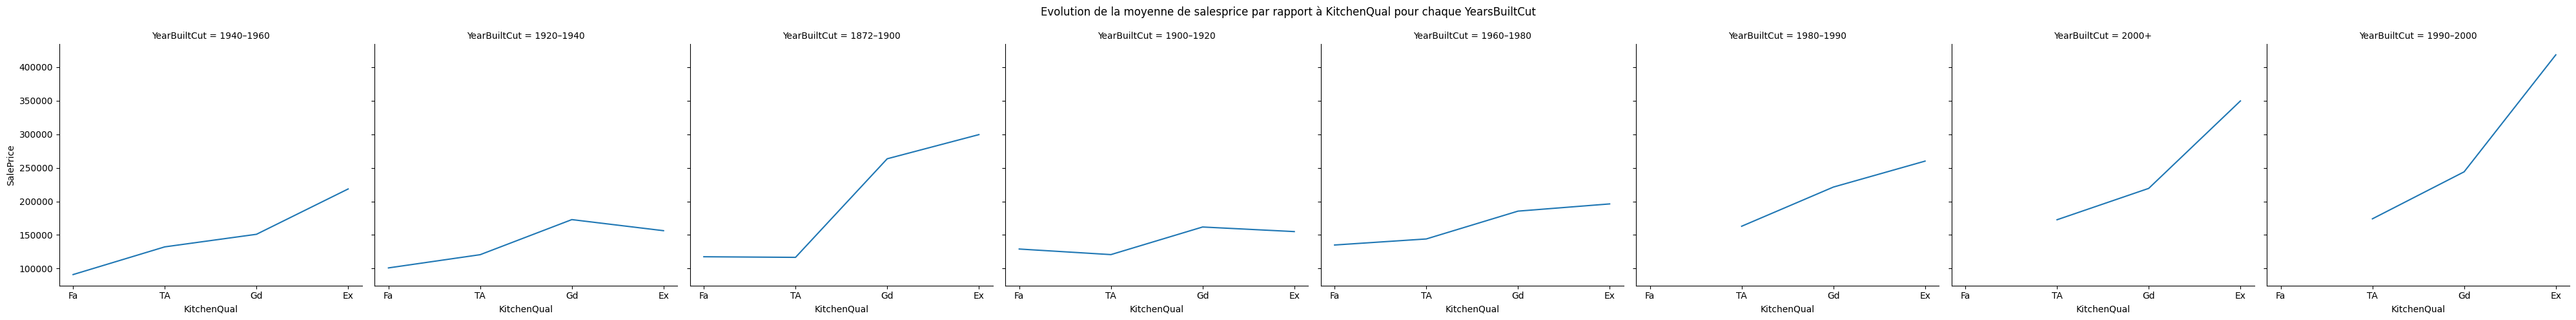

In [269]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)

sb.histplot(y=df_test['SalePrice'], hue=df_test['KitchenQual'], ax=ax1, palette='deep', legend=True)
ax1.set_title("Distribution de SalePrice par rapport à KitchenQual")

df_stats = df_test.groupby('KitchenQual')['SalePrice'].describe().sort_values(ascending=True, by='mean').index
sb.boxplot(x=df_test['KitchenQual'], y=df_test['SalePrice'], ax=ax2, legend=True, palette='deep', order=df_stats)
ax2.set_title("Stats generales de SalePrice par rapport à KitchenQual")
fig.tight_layout()

df_stats = df_test.groupby('KitchenQual')['SalePrice'].describe().sort_values(ascending=True, by='mean')
df_stats.plot(kind='bar', stacked=True, legend=True)

plt.ylabel("Count")
plt.title("Distribution de de SalePrice par rapport à KitchenQual avec les stats")
plt.tight_layout()
plt.show()

df_mean = df_test.groupby(['YearBuiltCut', 'KitchenQual'])['SalePrice'].mean().reset_index()
df_mean = df_mean.sort_values(ascending=True, by='SalePrice')
sb.relplot(y=df_mean['SalePrice'], x=df_mean['KitchenQual'], col=df_mean['YearBuiltCut'], kind='line')
plt.suptitle("Evolution de la moyenne de salesprice par rapport à KitchenQual pour chaque YearsBuiltCut")
plt.tight_layout()

# ###Fireplaces : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.

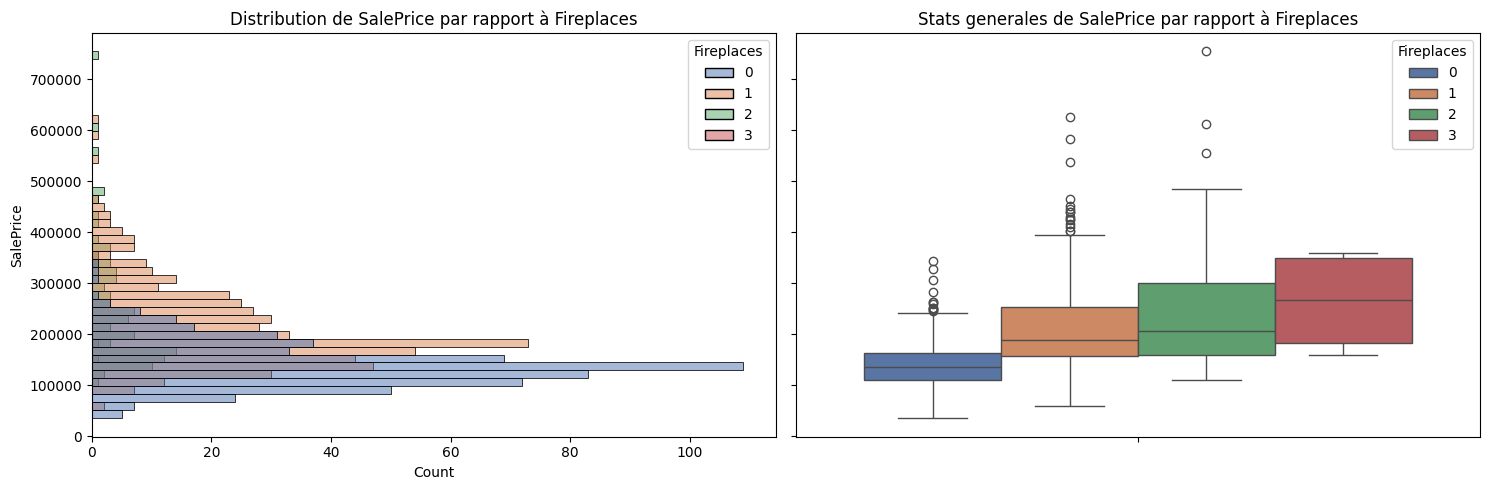

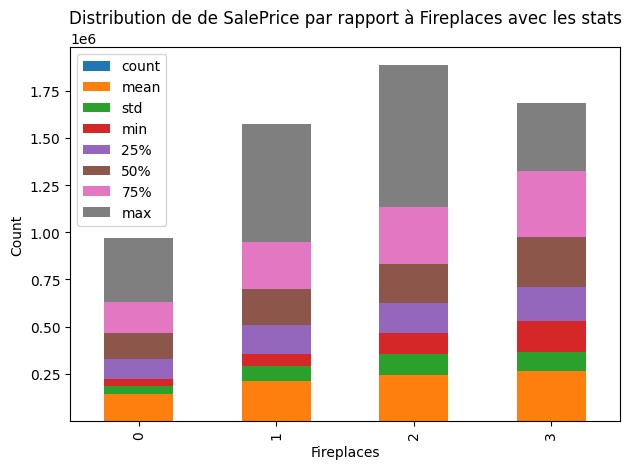

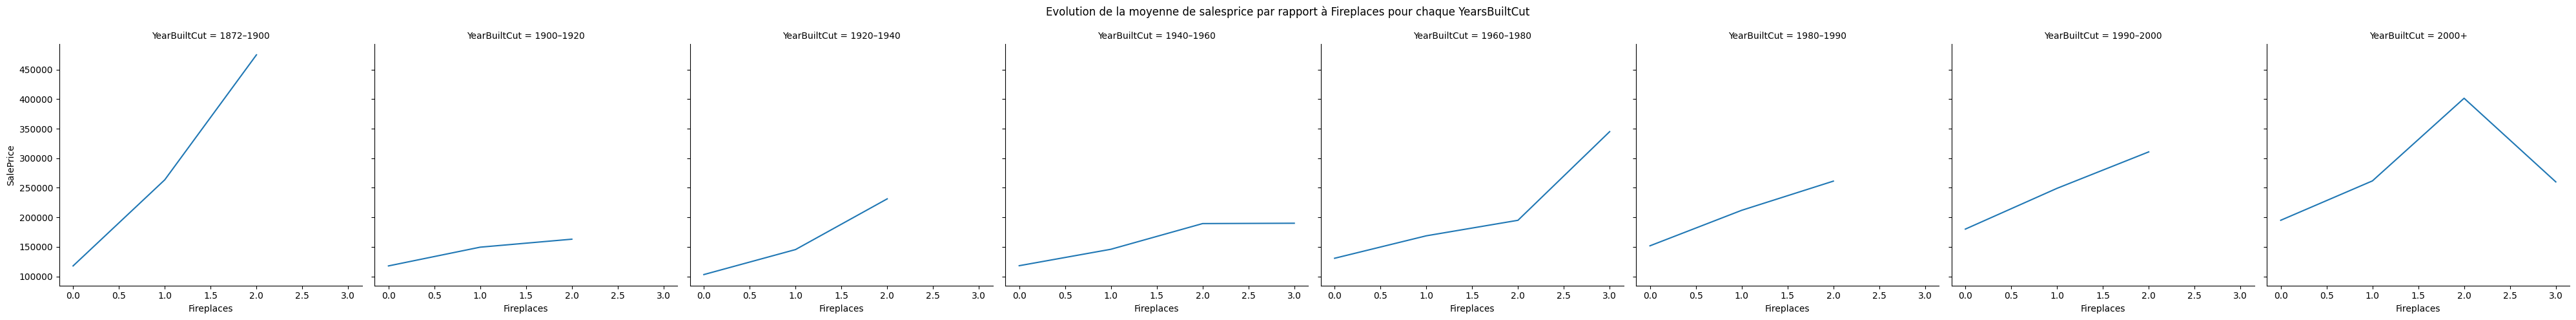

In [243]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)

sb.histplot(y=df_test['SalePrice'], hue=df_test['Fireplaces'], ax=ax1, palette='deep', legend=True)
ax1.set_title("Distribution de SalePrice par rapport à Fireplaces")

sb.boxplot(hue=df_test['Fireplaces'], y=df_test['SalePrice'], ax=ax2, legend=True, palette='deep')
ax2.set_title("Stats generales de SalePrice par rapport à Fireplaces")
fig.tight_layout()

df_stats = df_test.groupby('Fireplaces')['SalePrice'].describe().sort_values(ascending=True, by='mean')
df_stats.plot(kind='bar', stacked=True, legend=True)
plt.ylabel("Count")
plt.title("Distribution de de SalePrice par rapport à Fireplaces avec les stats")
plt.tight_layout()
plt.show()

df_mean = df_test.groupby(['YearBuiltCut', 'Fireplaces'])['SalePrice'].mean().reset_index()
sb.relplot(y=df_mean['SalePrice'], x=df_mean['Fireplaces'], col=df_mean['YearBuiltCut'], kind='line')
plt.suptitle("Evolution de la moyenne de salesprice par rapport à Fireplaces pour chaque YearsBuiltCut")
plt.tight_layout()

# ###LotArea : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.

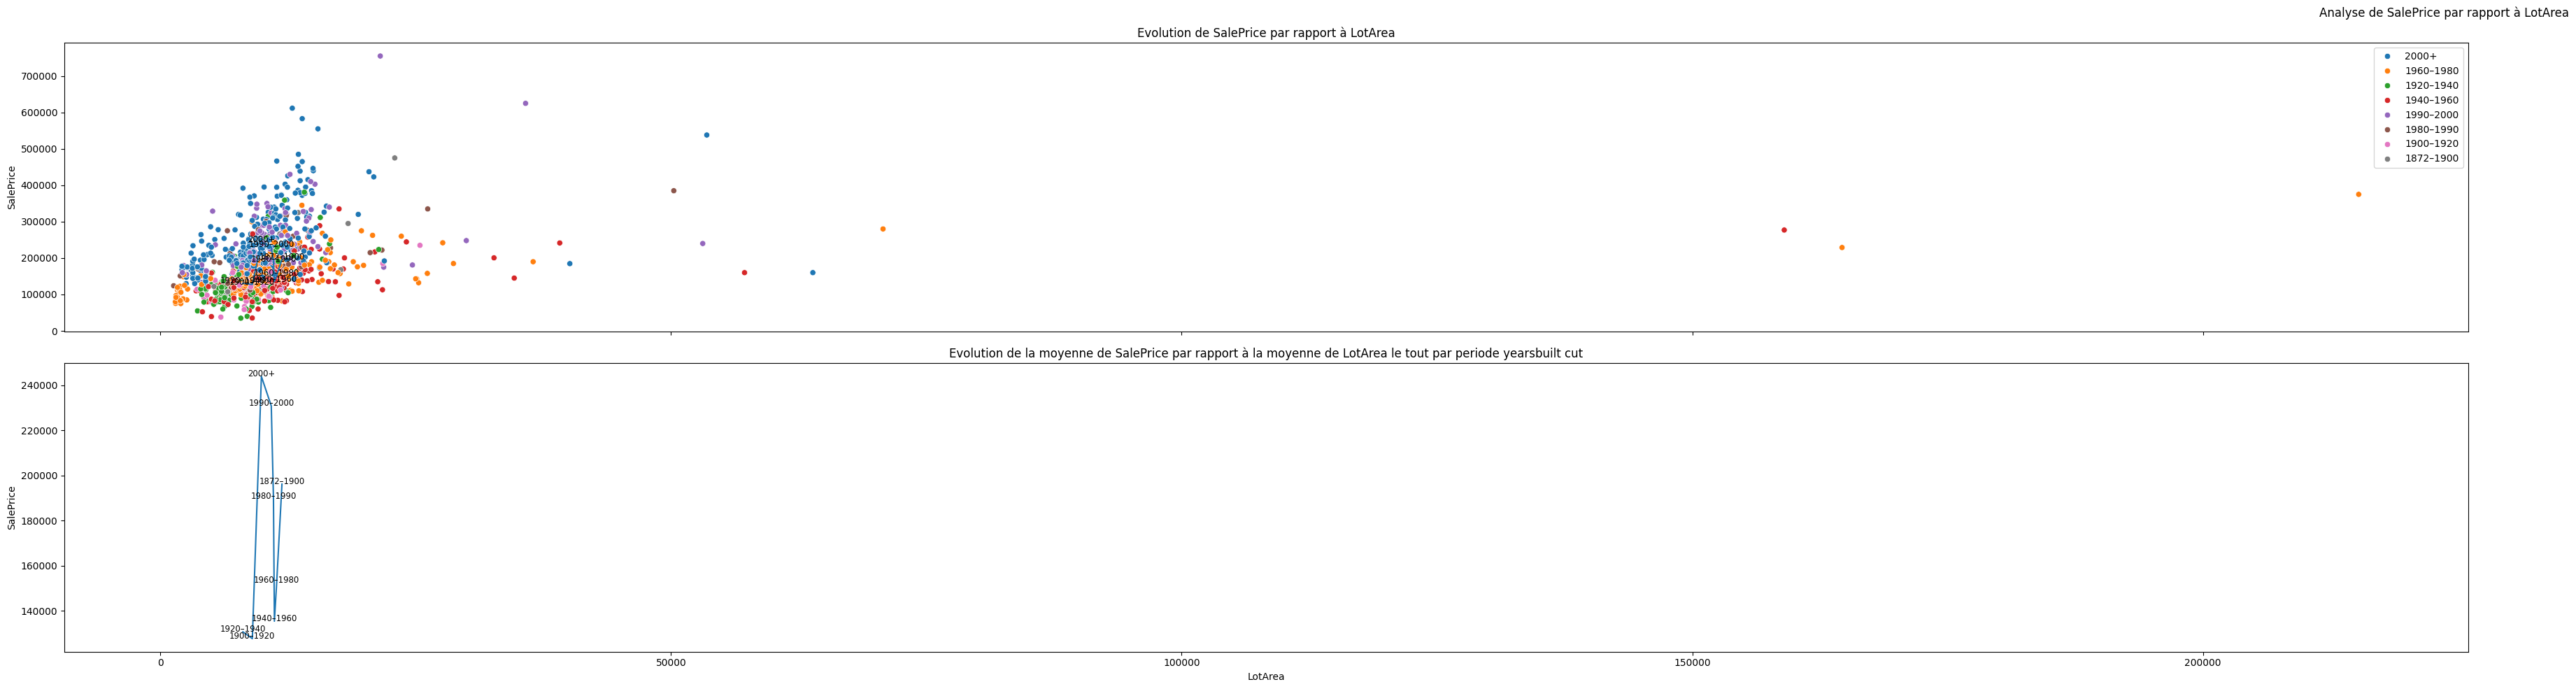

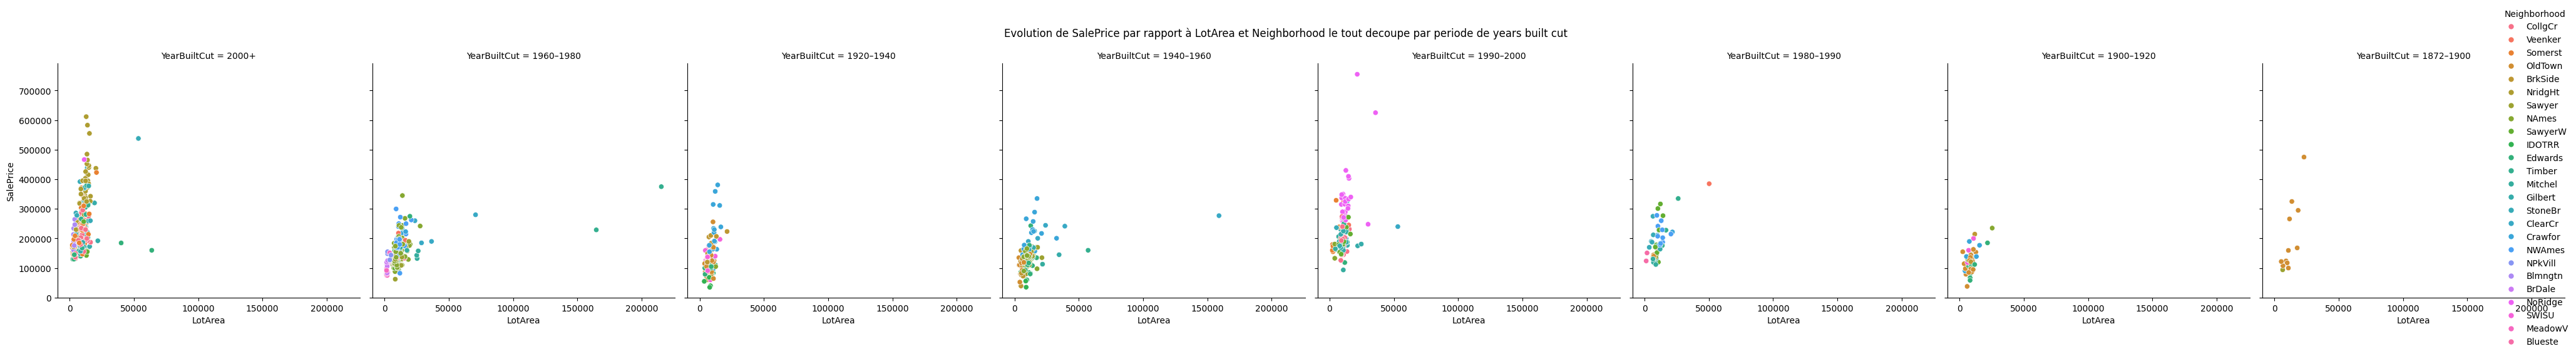

In [279]:
fig, ax = plt.subplots(2,2,figsize=(70,10),sharex=True)

df_mean = df_test.groupby('YearBuiltCut')[['LotArea','SalePrice']].mean().reset_index()

sb.scatterplot(x=df_test['LotArea'],y=df_test['SalePrice'], hue=df_test['YearBuiltCut'], legend=True, ax=ax[0][0])
sb.lineplot(x=df_mean['LotArea'],y=df_mean['SalePrice'], legend=True, ax=ax[0][0], estimator='mean')
for _, row in df_mean.iterrows():
    ax[0][0].text(row['LotArea'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax[0][0].set_title("Evolution de SalePrice par rapport à LotArea")
ax[0][0].set_xlabel("LotArea")
ax[0][0].set_ylabel("SalePrice")


sb.lineplot(x=df_mean['LotArea'],y=df_mean['SalePrice'], legend=True, ax=ax[1][0], estimator='mean')
for _, row in df_mean.iterrows():
    ax[1][0].text(row['LotArea'], row['SalePrice'] + 1, row['YearBuiltCut'], horizontalalignment='center', size='small', color='black')
ax[1][0].set_title("Evolution de la moyenne de SalePrice par rapport à la moyenne de LotArea le tout par periode yearsbuilt cut")

fig.suptitle("Analyse de SalePrice par rapport à LotArea")

sb.relplot(x=df_test['LotArea'],y=df_test['SalePrice'], col=df_test['YearBuiltCut'], hue=df_test['Neighborhood'], kind='scatter')
plt.suptitle("Evolution de SalePrice par rapport à LotArea et Neighborhood le tout decoupe par periode de years built cut")
plt.tight_layout()

fig.delaxes(ax[0][1])
fig.delaxes(ax[1][1])
fig.tight_layout()
                       

# ###Neighborhood : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.

/tmp/ipykernel_1574/1979772591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df_test['Neighborhood'], y=df_test['SalePrice'], ax=ax2, palette='deep', order=order_)


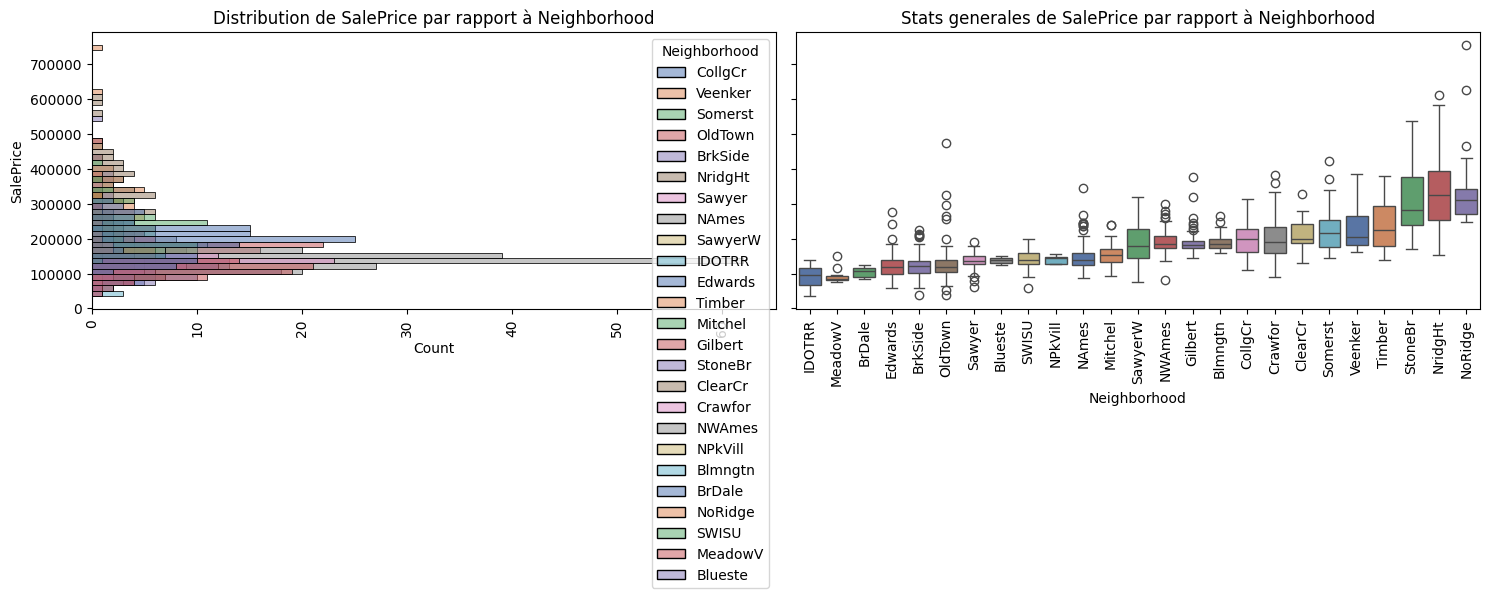

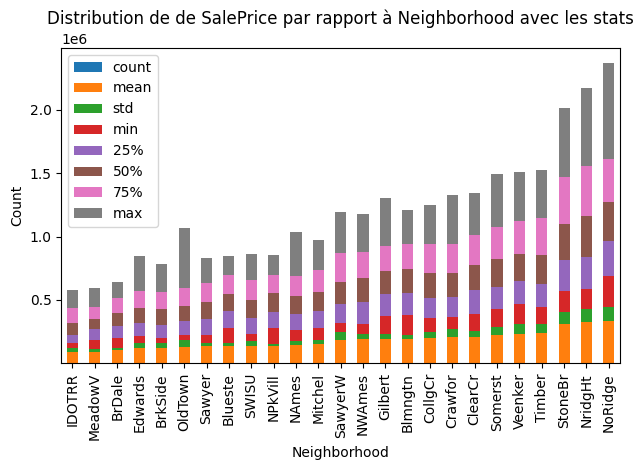

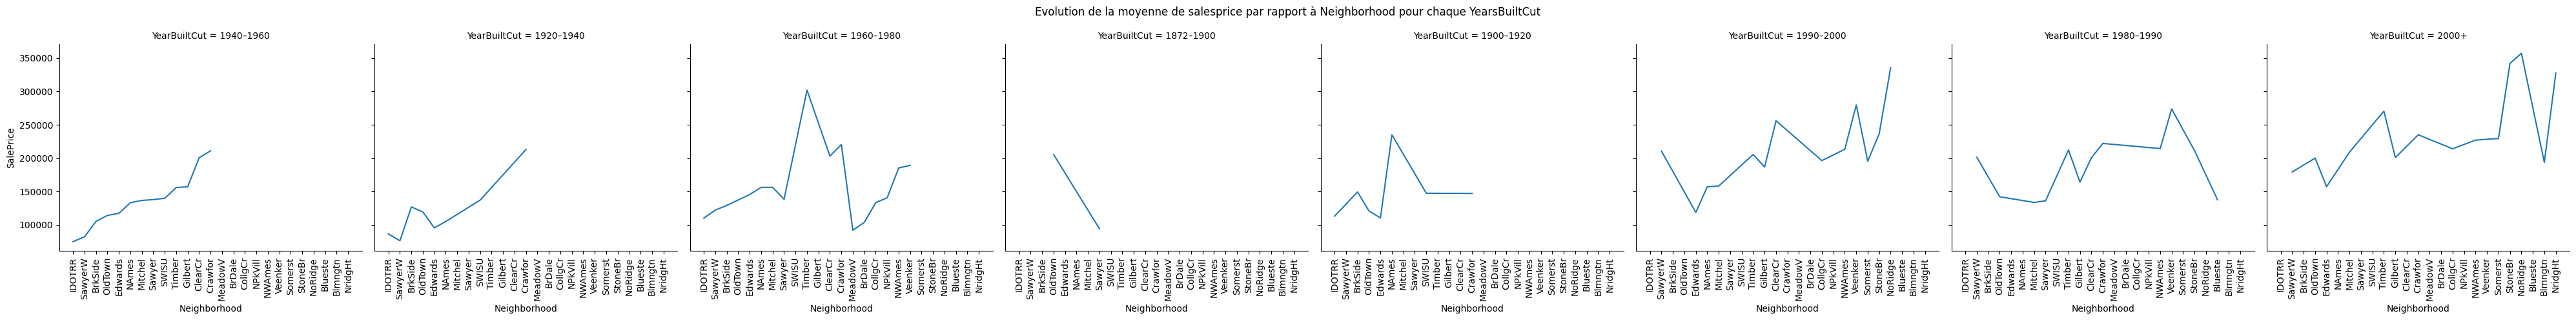

In [268]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)

sb.histplot(y=df_test['SalePrice'], hue=df_test['Neighborhood'], ax=ax1, palette='deep', legend=True)
ax1.set_title("Distribution de SalePrice par rapport à Neighborhood")
ax1.tick_params(axis='x', rotation=90)

order_ = df_test.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=True).index
sb.boxplot(x=df_test['Neighborhood'], y=df_test['SalePrice'], ax=ax2, palette='deep', order=order_)
ax2.set_title("Stats generales de SalePrice par rapport à Neighborhood")
ax2.tick_params(axis='x', rotation=90)
fig.tight_layout()

df_stats = df_test.groupby('Neighborhood')['SalePrice'].describe().sort_values(ascending=True, by='mean')
df_stats.plot(kind='bar', stacked=True, legend=True)
plt.ylabel("Count")
plt.title("Distribution de de SalePrice par rapport à Neighborhood avec les stats")
plt.tight_layout()
plt.show()

df_mean = df_test.groupby(['YearBuiltCut', 'Neighborhood'])['SalePrice'].mean().reset_index()
df_mean = df_mean.sort_values(ascending=True,by='SalePrice')
g = sb.relplot(y=df_mean['SalePrice'], x=df_mean['Neighborhood'], col=df_mean['YearBuiltCut'], kind='line')
plt.suptitle("Evolution de la moyenne de salesprice par rapport à Neighborhood pour chaque YearsBuiltCut")
plt.Figure(figsize=(15,10))
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

# ###ExterQual : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.

/tmp/ipykernel_1574/4261980683.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df_test['ExterQual'], y=df_test['SalePrice'], ax=ax2, palette='deep', order=order_)


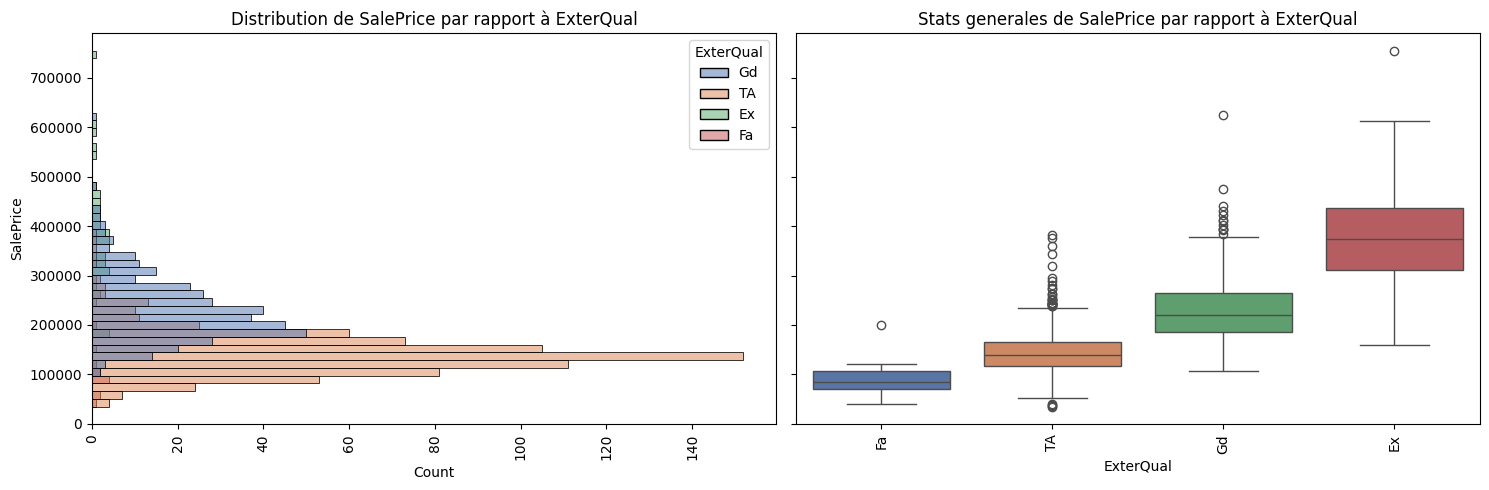

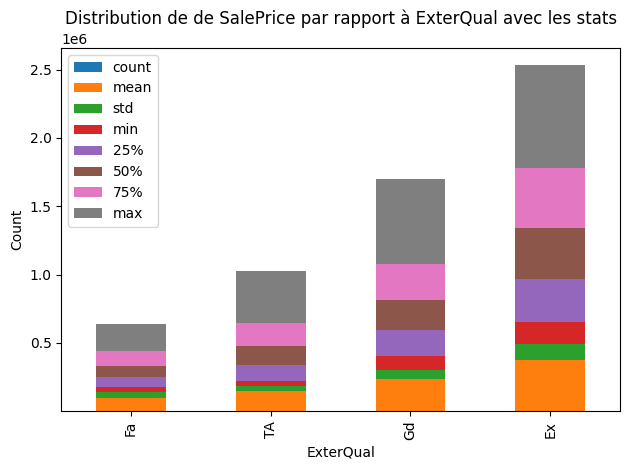

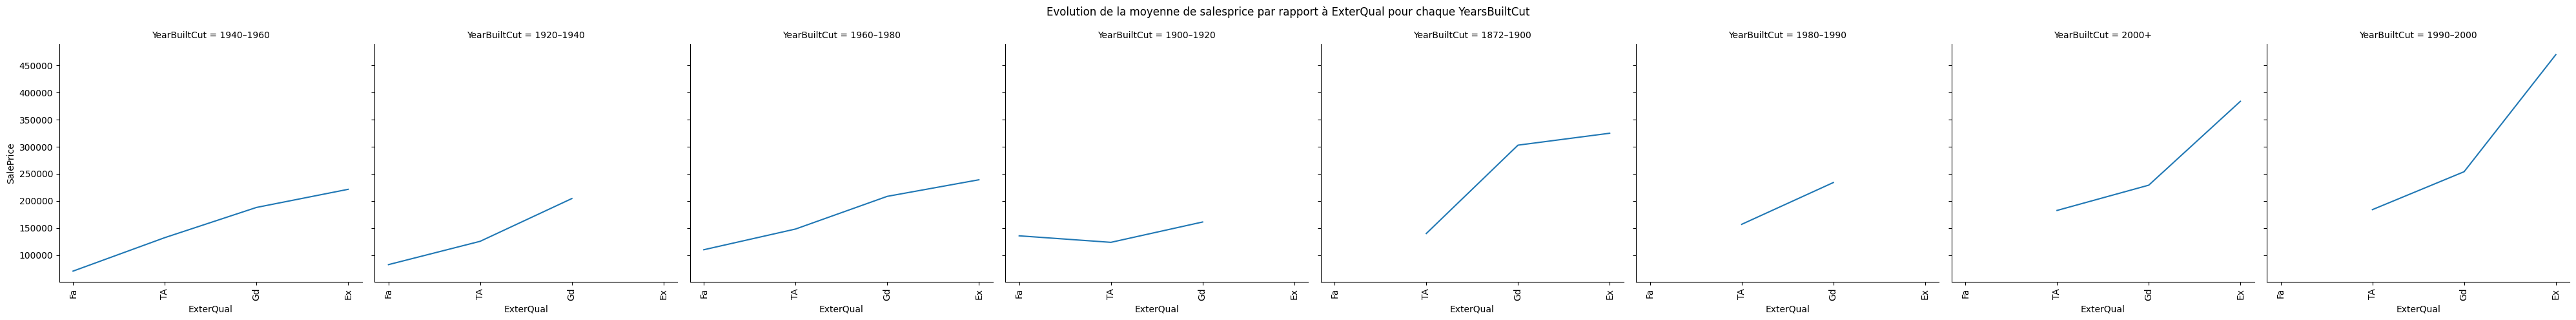

In [267]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)

sb.histplot(y=df_test['SalePrice'], hue=df_test['ExterQual'], ax=ax1, palette='deep', legend=True)
ax1.set_title("Distribution de SalePrice par rapport à ExterQual")
ax1.tick_params(axis='x', rotation=90)

order_ = df_test.groupby('ExterQual')['SalePrice'].mean().sort_values(ascending=True).index
sb.boxplot(x=df_test['ExterQual'], y=df_test['SalePrice'], ax=ax2, palette='deep', order=order_)
ax2.set_title("Stats generales de SalePrice par rapport à ExterQual")
ax2.tick_params(axis='x', rotation=90)
fig.tight_layout()

df_stats = df_test.groupby('ExterQual')['SalePrice'].describe().sort_values(ascending=True, by='mean')
df_stats.plot(kind='bar', stacked=True, legend=True)
plt.ylabel("Count")
plt.title("Distribution de de SalePrice par rapport à ExterQual avec les stats")
plt.tight_layout()
plt.show()

df_mean = df_test.groupby(['YearBuiltCut', 'ExterQual'])['SalePrice'].mean().reset_index()
df_mean = df_mean.sort_values(ascending=True,by='SalePrice')
g = sb.relplot(y=df_mean['SalePrice'], x=df_mean['ExterQual'], col=df_mean['YearBuiltCut'], kind='line')
plt.suptitle("Evolution de la moyenne de salesprice par rapport à ExterQual pour chaque YearsBuiltCut")
plt.Figure(figsize=(15,10))
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

# ## Resume phénomène decouvert

à faire...

# Test d'hypothese

# #Discret/continu

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

    The samples are independent.

    Each sample is from a normally distributed population.

    The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

# ##OverallQual

In [40]:
df_origin.groupby('OverallQual')['SalePrice'].count()

OverallQual
1       1
2       3
3      16
4      90
5     328
6     307
7     255
8     126
9      37
10     17
Name: SalePrice, dtype: int64

In [ ]:
data_mean = df_origin.groupby('OverallQual')['SalePrice'].mean()
data_mean

OverallQual
1      39300.000000
2      51770.333333
3      88779.687500
4     103364.955556
5     133137.420732
6     160340.456026
7     208301.407843
8     274905.095238
9     364166.000000
10    420564.176471
Name: SalePrice, dtype: float64

In [30]:
data = df_origin.groupby('OverallQual')['SalePrice'].var().reset_index().dropna()
data

OverallQual     SalePrice
1            2  2.031822e+08
2            3  6.622529e+08
3            4  6.161413e+08
4            5  7.424145e+08
5            6  1.354254e+09
6            7  1.989142e+09
7            8  4.532956e+09
8            9  5.924330e+09
9           10  2.091393e+10

In [39]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('OverallQual')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.75
p-value : 0.0
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9795259566980397
p-value : 0.9597308561830838
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.9864083472834694
p-value : 0.4756619970004689
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.9846343404075764
p-value : 0.0014300361132743215
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9872487697276477
p-value : 0.008274453228699779
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9709353249928495
p-value : 4.580391305026533e-05
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.972978874847693
p-value : 0.012569636267808552
Données PAS normalement distribu

/tmp/ipykernel_2597/2873496395.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = sp.shapiro(i)


Variance non identique donc je vais use anova version welch
Chaque groupe ne suient pas une loi normale/chaque groupe n ont pas tous au moins 30 points

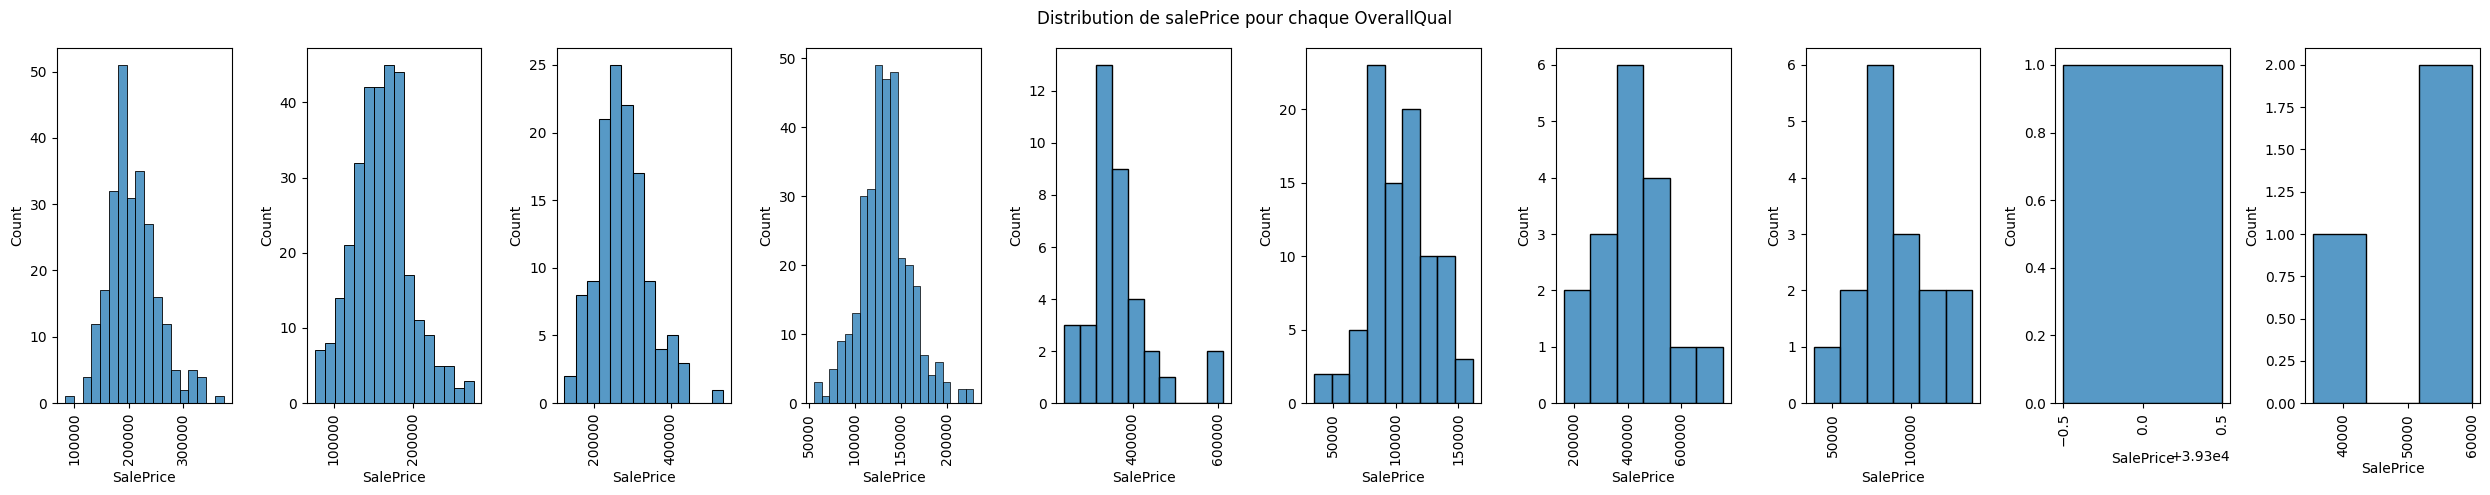

In [26]:
fig, ax = plt.subplots(1, 10, figsize=(25,5))
fig.suptitle("Distribution de salePrice pour chaque OverallQual")
for index,i in enumerate(df_origin['OverallQual'].unique()):
    filtre_data = df_origin.query("OverallQual == @i")
    sb.histplot(x=filtre_data['SalePrice'], legend=True, ax=ax[index])
    ax[index].tick_params(axis='x', rotation=90)
fig.tight_layout()

Ici, les donnees sont bien indépandantes et identiquement distribuée et i l n ya pas plus de 30 points sur certains groupe/ne suivent pas tous loi normale et pas meme variance (on pourrait use welch)
Donc on peut pas use anova meme avec welch pour variance non identique

In [3]:
print(f"Ho : La prix est en moyenne le meme quel que soit le Overqual")
p_value = pg.welch_anova(dv='SalePrice', between='OverallQual', data=df_origin)
p_value1 = 1 / p_value['p-unc'][0]
p_value = p_value['p-unc'][0]
alpha = 0.02
if p_value > alpha:
    print(f"La pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a pas suffisament de preuve pour rejeter h0")
else:
    print(f"pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a suffisament de preuve pour rejeter Ho")


Ho : La prix est en moyenne le meme quel que soit le Overqual
pvalue est de 1.5192617845270095e-35 (on 1/6.582144105673857e+34 ou une proba de 1.5192617845270095e-35 d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.
 On a 1/6.582144105673857e+34 ou on a la proba de 1.5192617845270095e-35 d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) 
 donc on a suffisament de preuve pour rejeter Ho


# ##YearBuilt

In [22]:
df_origin.groupby('YearBuilt')['SalePrice'].count()

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     1
        ..
2006    47
2007    39
2008    20
2009    13
2010     1
Name: SalePrice, Length: 110, dtype: int64

In [5]:
data_mean = df_origin.groupby('YearBuilt')['SalePrice'].mean()
data_mean

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    100000.000000
            ...      
2006    254160.659574
2007    249554.974359
2008    342105.150000
2009    286007.769231
2010    394432.000000
Name: SalePrice, Length: 110, dtype: float64

In [6]:
data = df_origin.groupby('YearBuilt')['SalePrice'].var().reset_index().dropna()
data

YearBuilt     SalePrice
2         1880  8.652981e+09
6         1892  6.752812e+10
8         1900  8.915467e+08
12        1910  7.704810e+08
14        1912  1.051250e+08
..         ...           ...
104       2005  5.468547e+09
105       2006  6.985200e+09
106       2007  5.397730e+09
107       2008  1.360159e+10
108       2009  1.595671e+10

[95 rows x 2 columns]

In [36]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('YearBuilt')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.8167134203819396
p-value : 0.13572916660344664
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9361802769079297
p-value : 0.5739316950992551
Données normalement distribuées ✅
Ho : Suit une loi no

/tmp/ipykernel_2597/3124676603.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = sp.shapiro(i)


Les ecarts type n est pas la meme pour chaque annee de construction par rapport a salePrice (on peut use welch), chaque groupe ne suient pas une loi normale/ tous les groupes n ont pas au moins 30 points

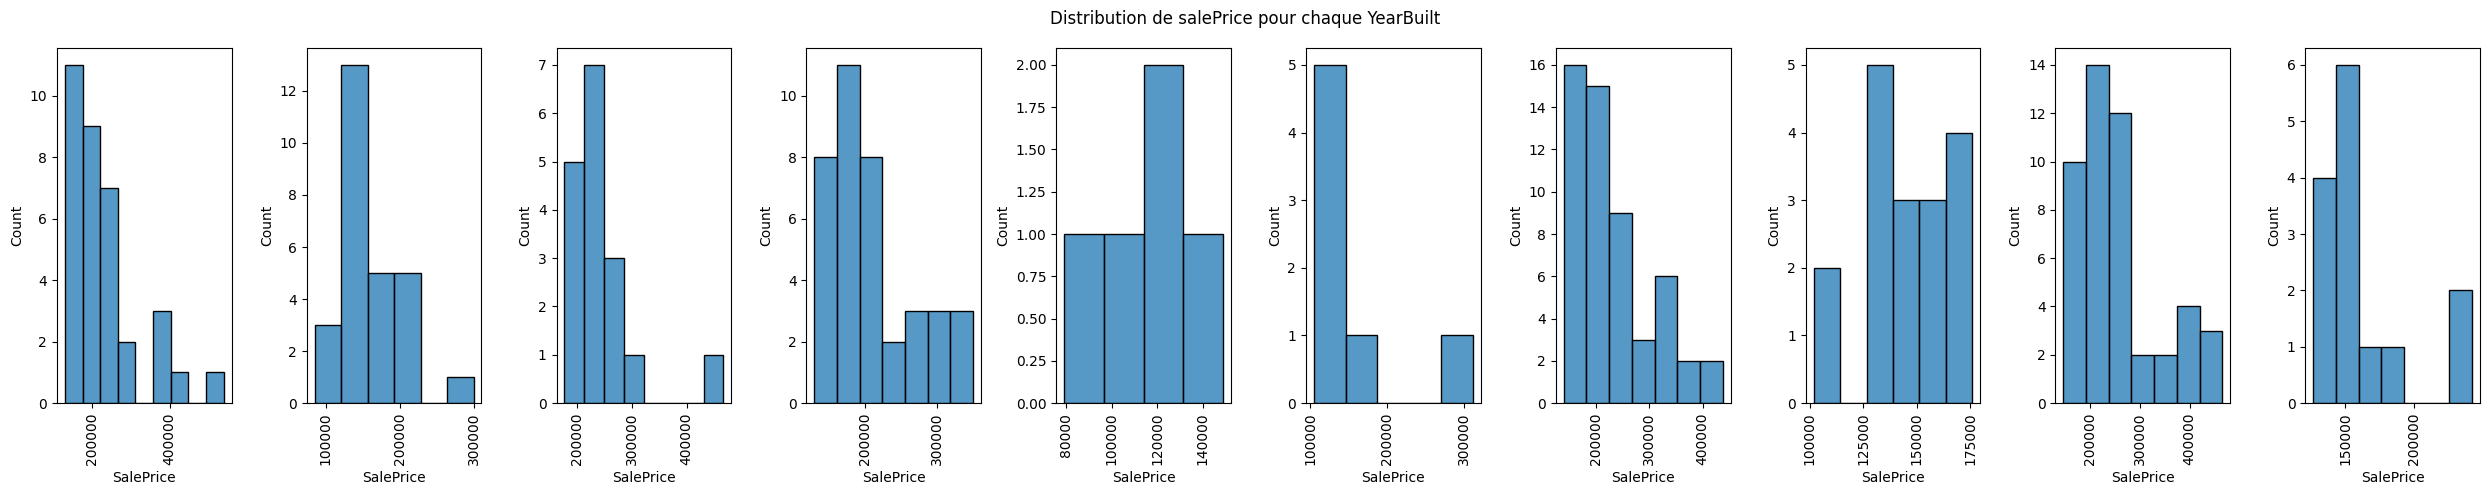

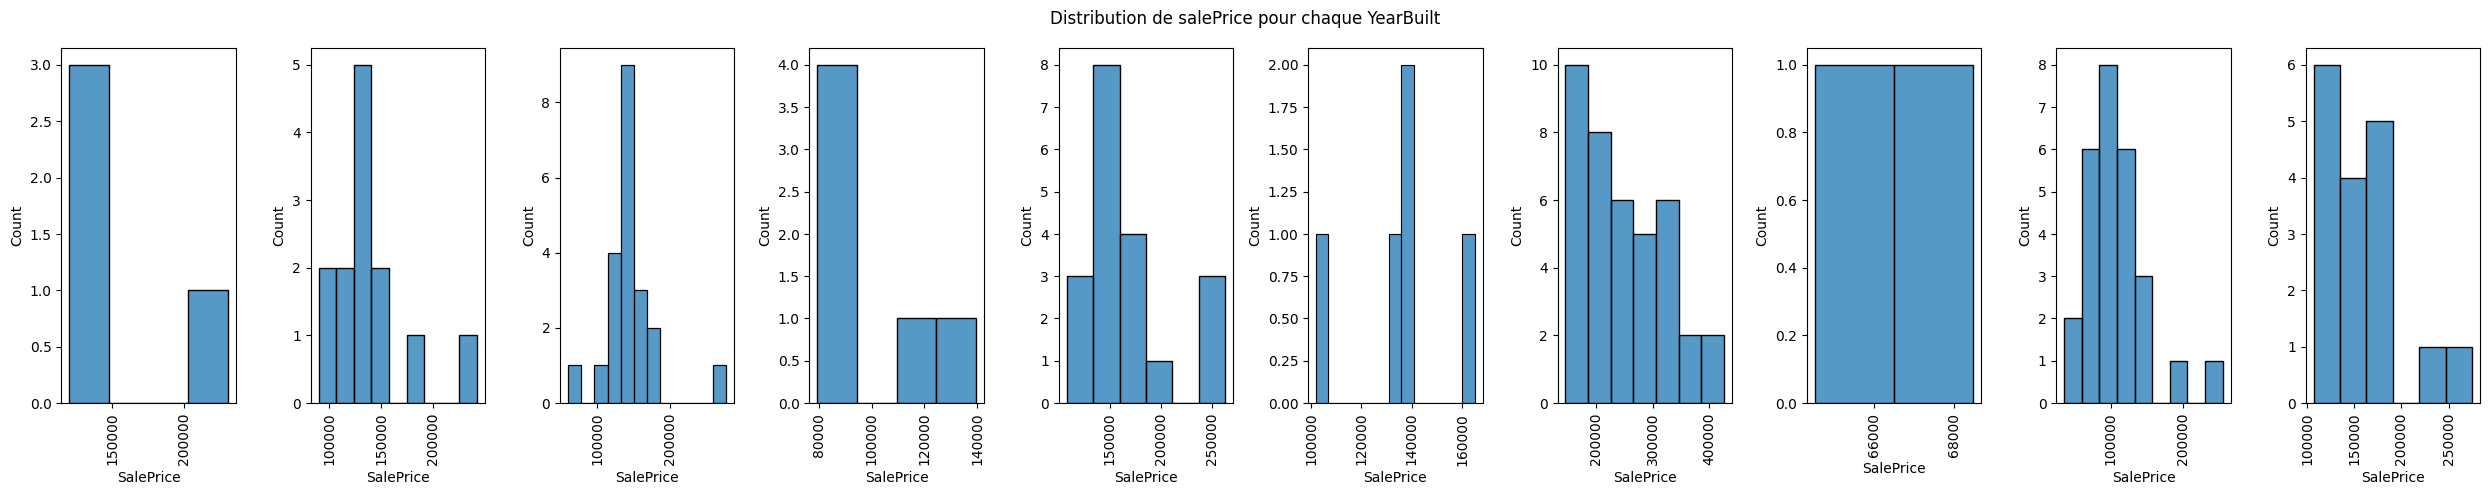

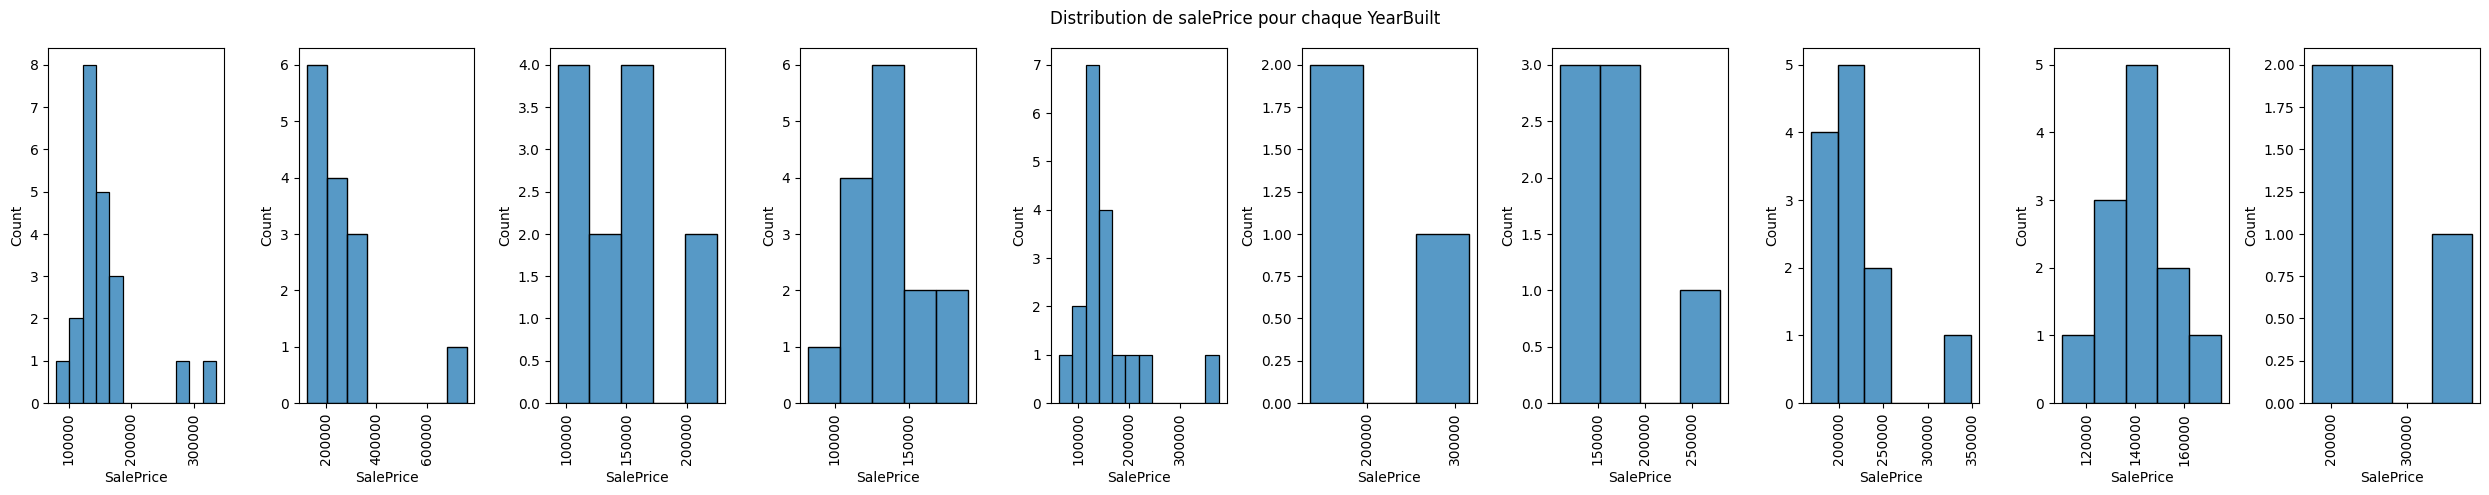

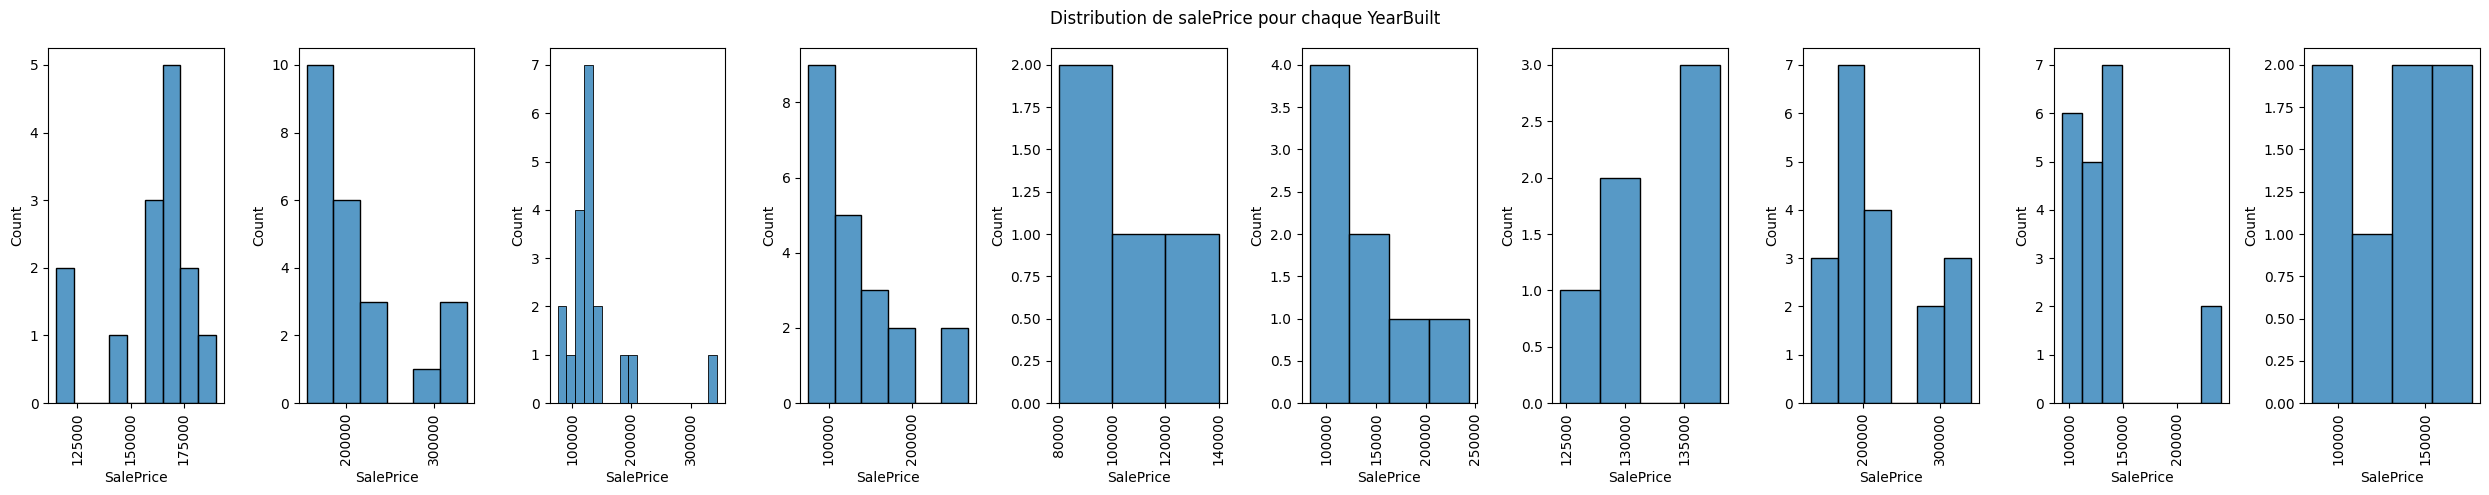

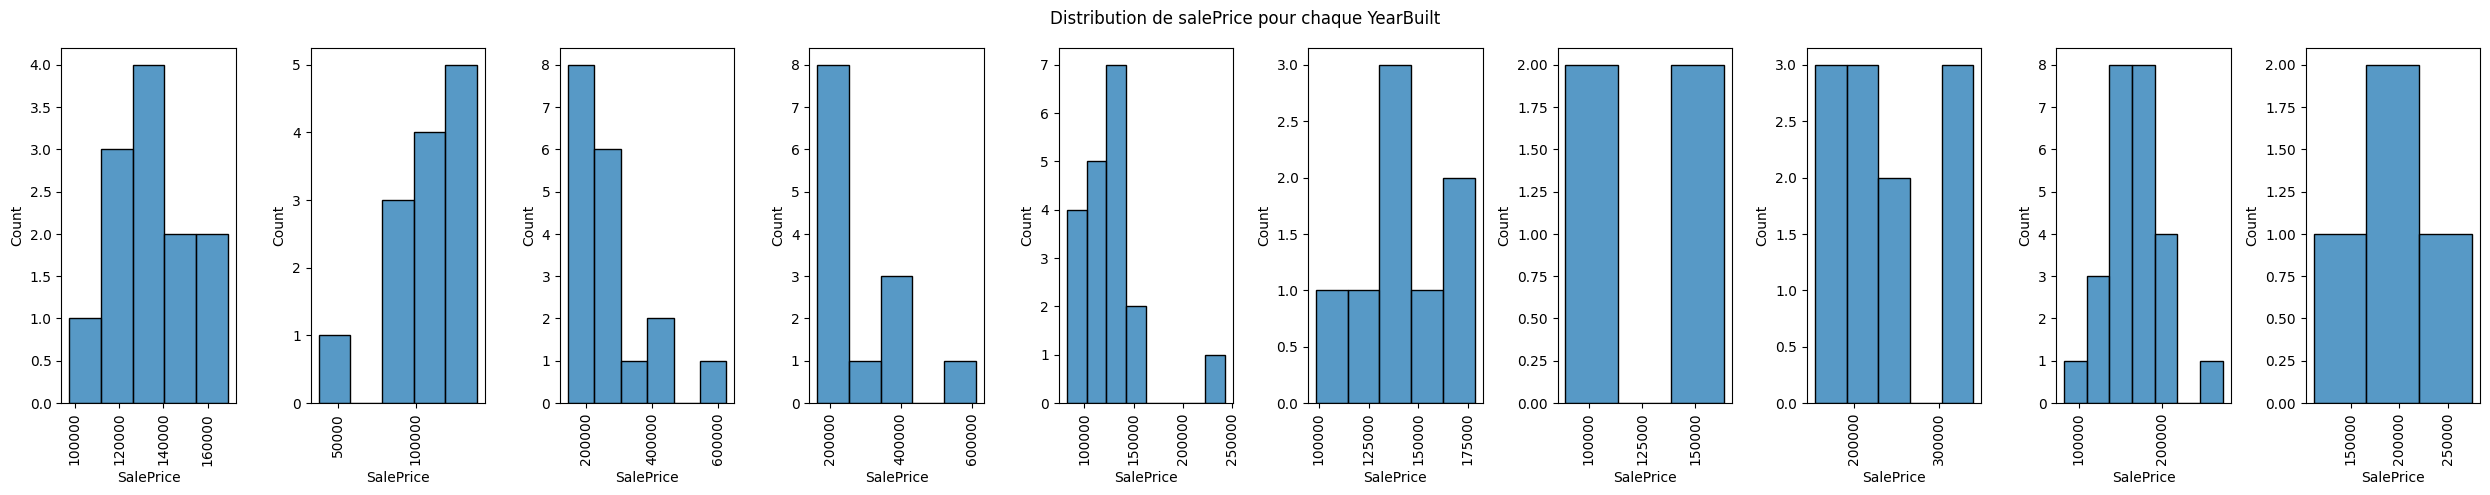

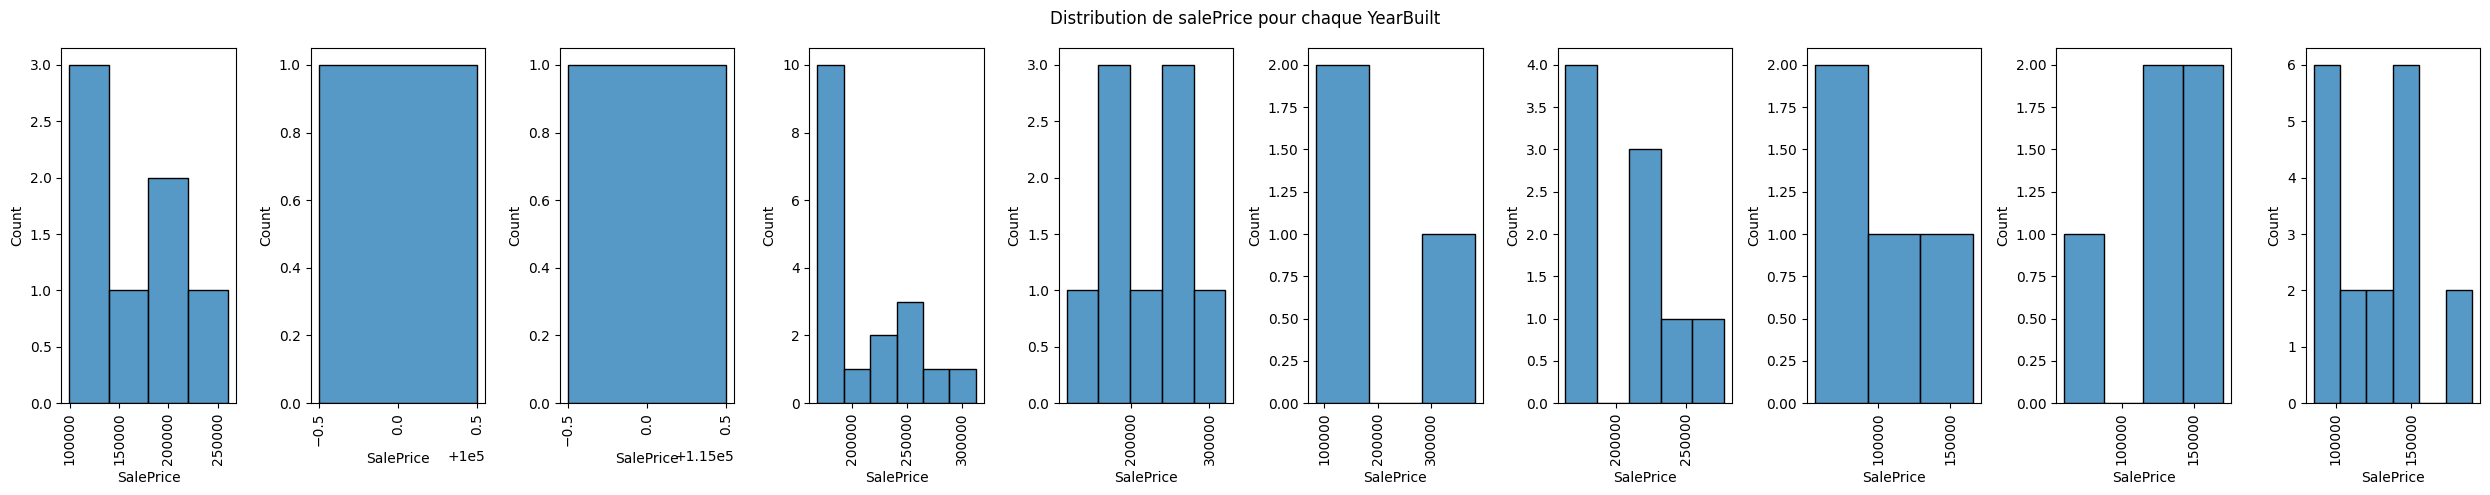

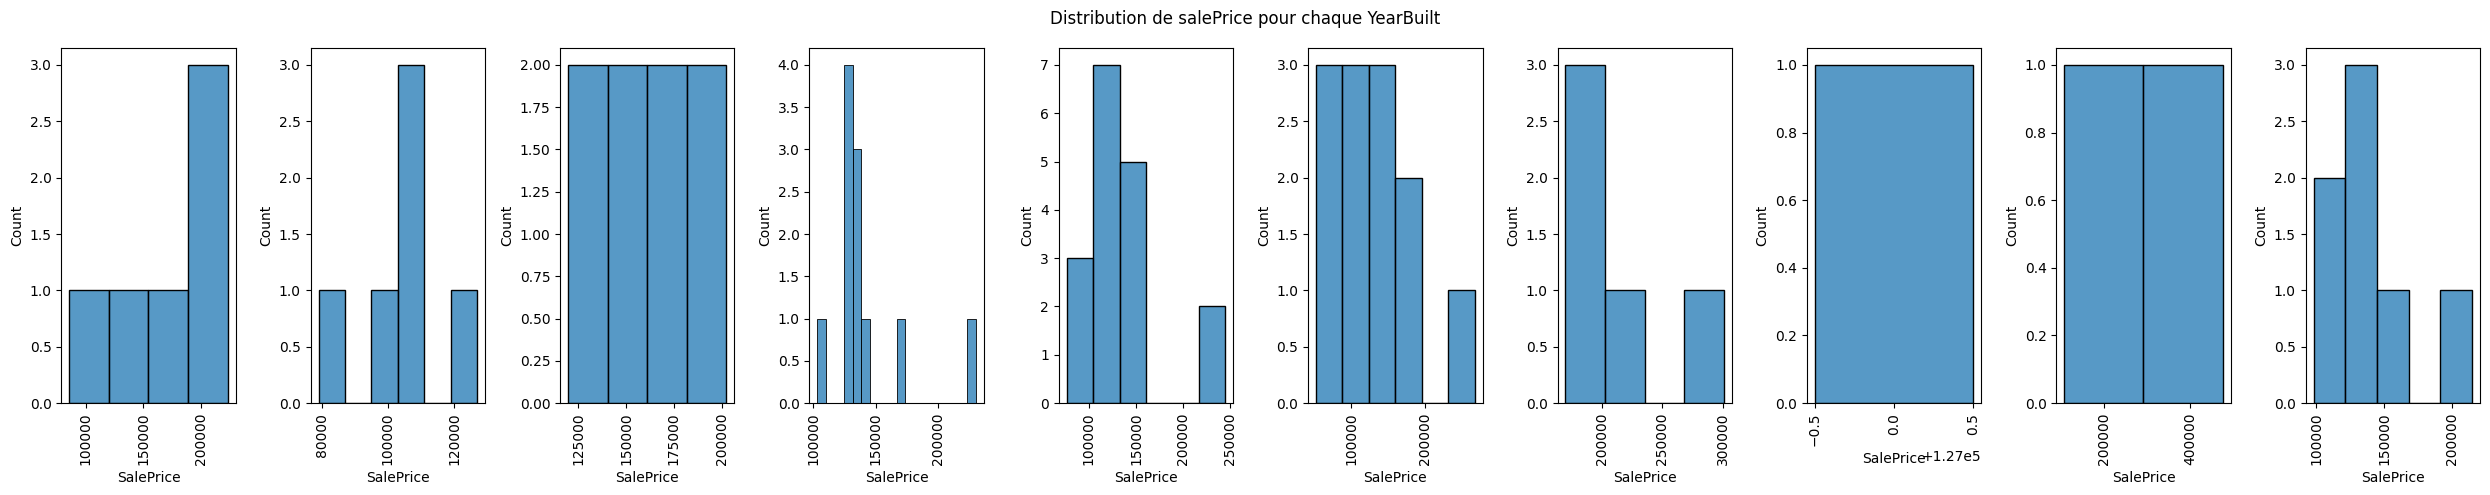

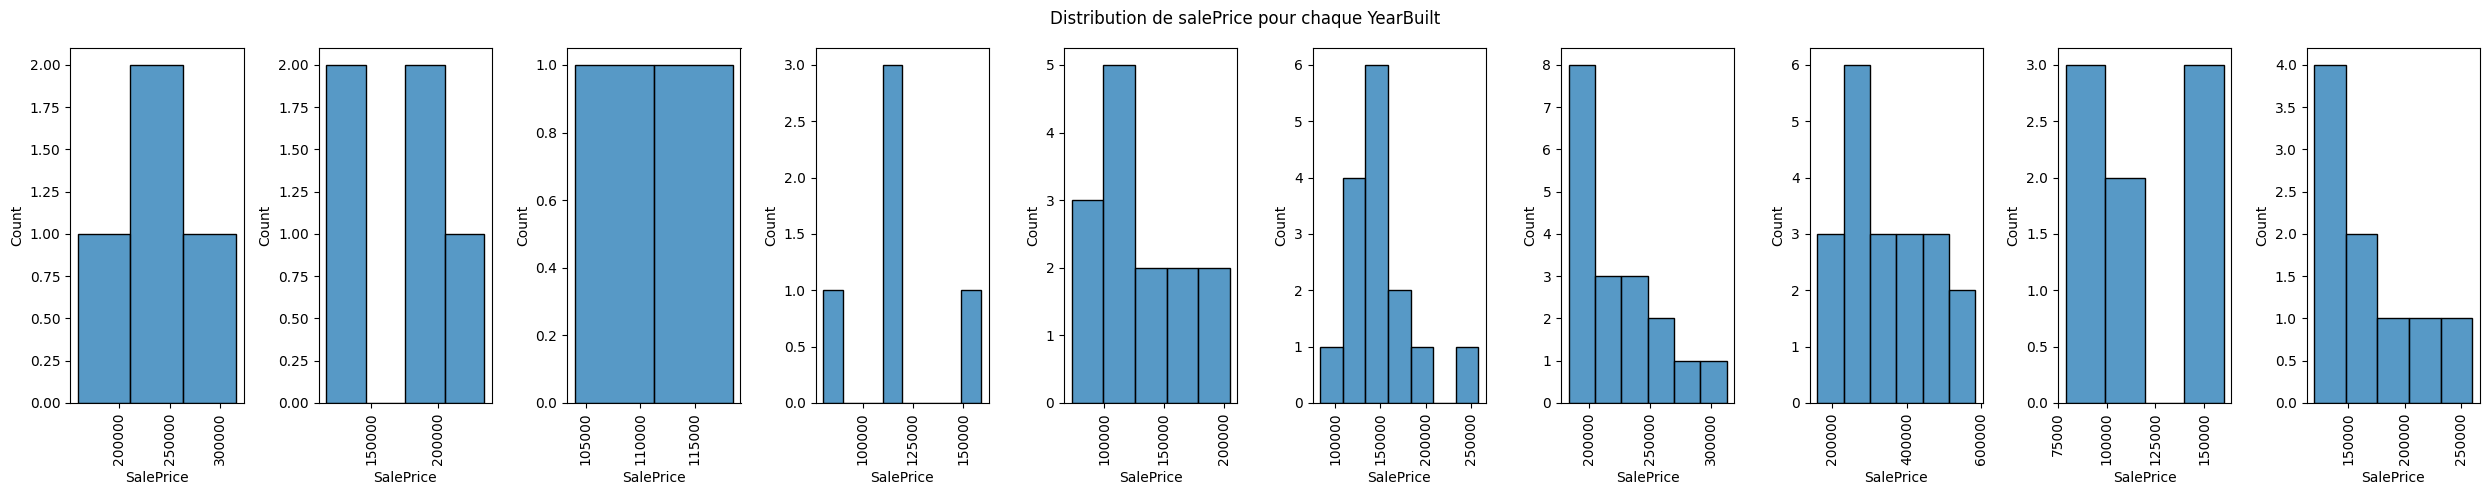

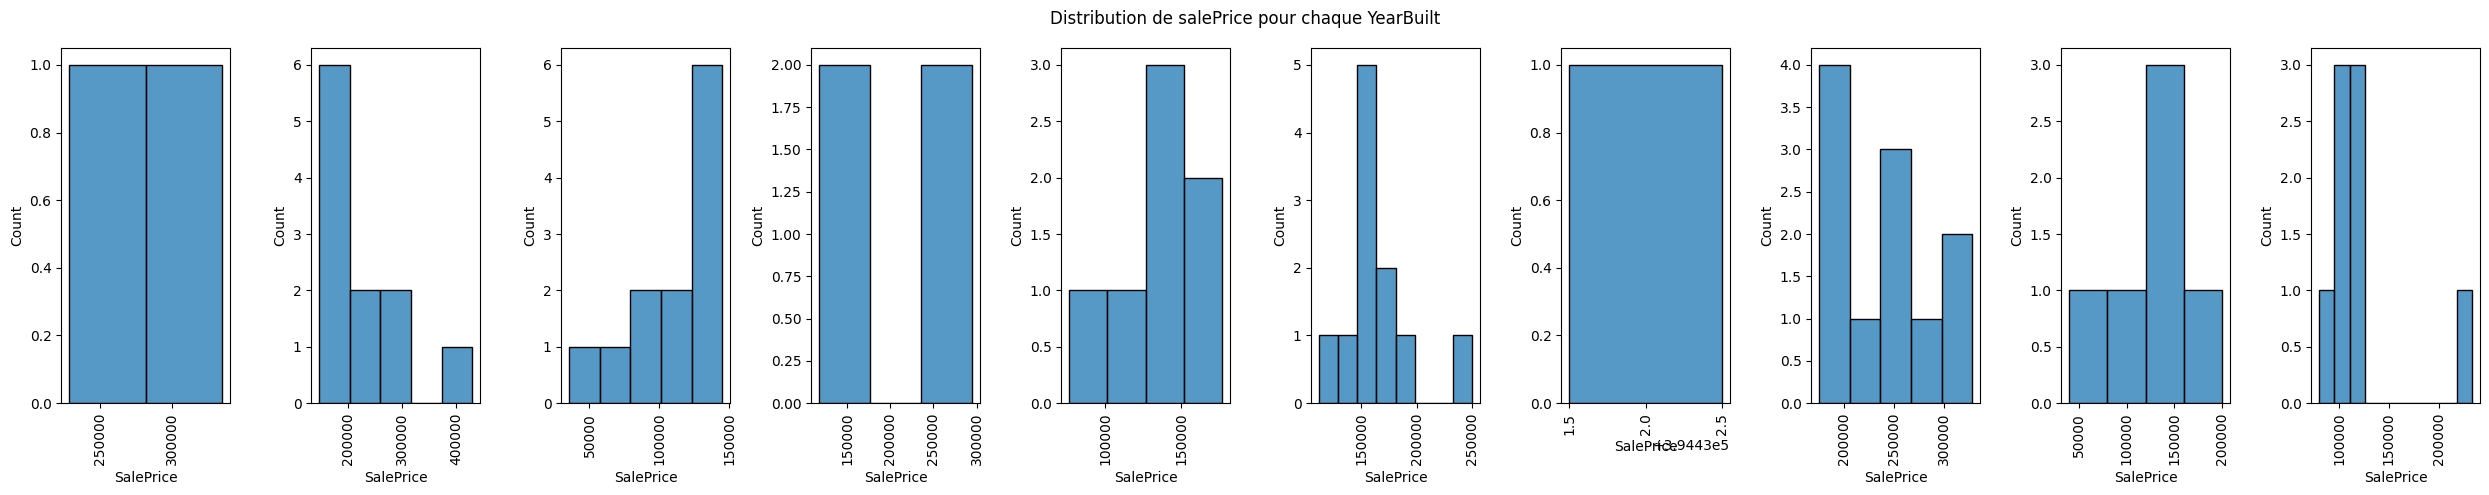

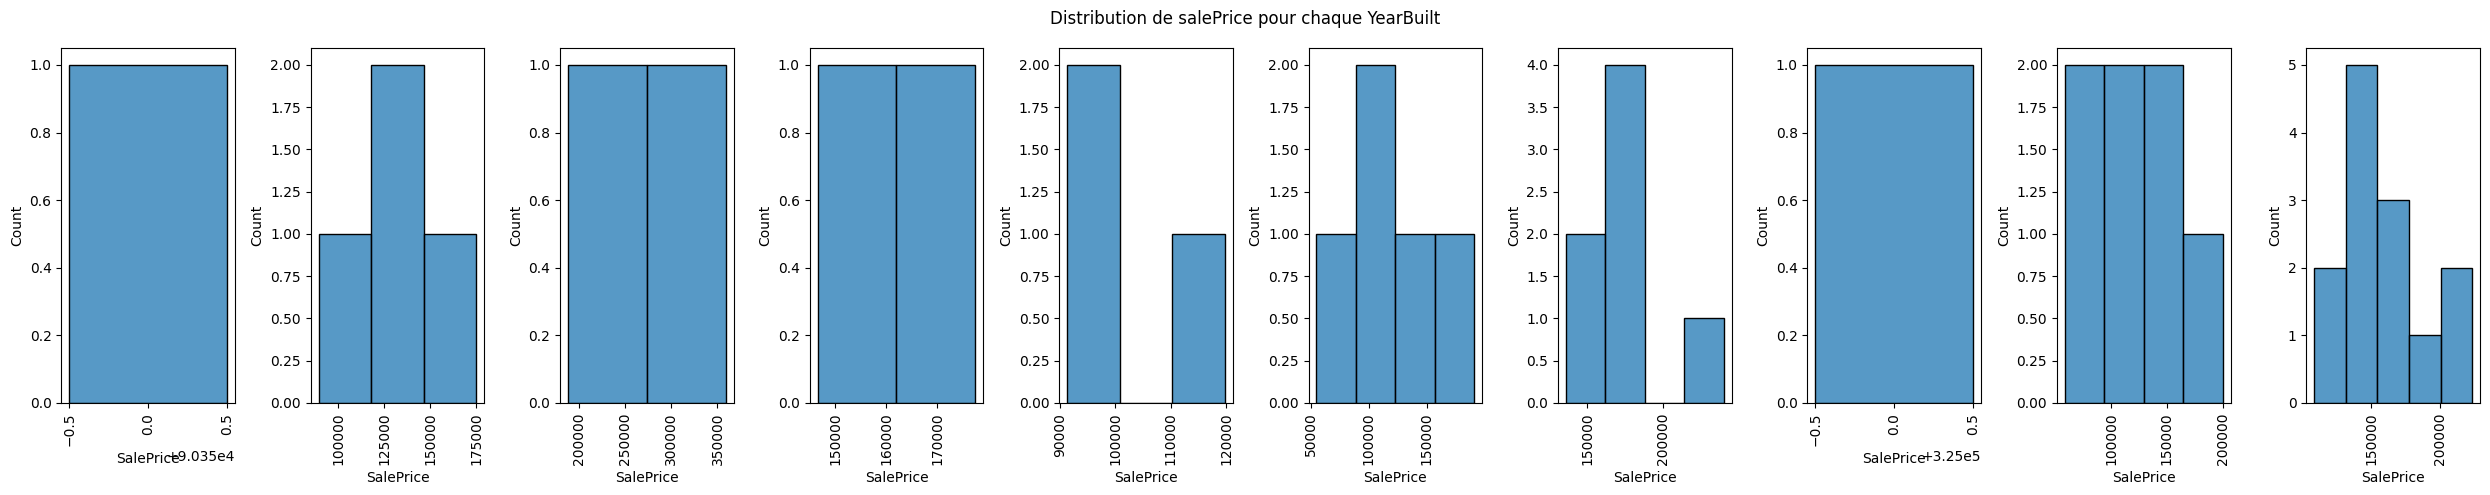

In [21]:
years_ = df_origin['YearBuilt'].unique().tolist()  # Convert numpy array to list
for i in range(10):
    years_select = []
    for _ in range(10):
        if len(years_) > 0:
            year = years_.pop(0)  # toujours pop le premier élément
            years_select.append(year)
        else:
            break
    fig, ax = plt.subplots(1, 10, figsize=(25,5))
    fig.suptitle("Distribution de salePrice pour chaque YearBuilt")
    for index,i in enumerate(years_select):
        filtre_data = df_origin.query("YearBuilt == @i")
        sb.histplot(x=filtre_data['SalePrice'], legend=True, ax=ax[index])
        ax[index].tick_params(axis='x', rotation=90)
    fig.tight_layout()

Pas la meme distribution et chaque groupe n a pas au moins 30 point/ne suit pas toujours loi normale. Chque groupe est indepandant et variance non identique donc avec tous ses elements
Donc on peut pas use anova meme avec welch pour variance non identique

# ##YearRemodAdd

In [23]:
df_origin.groupby("YearRemodAdd")['SalePrice'].describe()

count           mean            std       min        25%  \
YearRemodAdd                                                             
1950          145.0  116557.406897   39404.693769   34900.0   91000.00   
1951            3.0  126300.000000   21051.603264  102000.0  119950.00   
1952            4.0  106873.250000   48235.186972   55993.0   75498.25   
1953           10.0  147640.000000   48205.075805   79900.0  113250.00   
1954           13.0  117769.230769   15459.106519   93000.0  110000.00   
...             ...            ...            ...       ...        ...   
2006           76.0  228066.421053   87557.561984   79000.0  166427.50   
2007           60.0  222343.133333   80325.752673   64500.0  170800.00   
2008           37.0  263793.621622  113722.253091   97000.0  160000.00   
2009           17.0  287451.647059  120267.434730  138500.0  208300.00   
2010            5.0  350456.200000  185798.859351  127000.0  224000.00   

                   50%       75%       max  
YearRemodAdd                                
1950          116000.0  135000.0  256000.0  
1951          137900.0  138450.0  139000.0  
1952          102750.0  134125.0  166000.0  
1953          152250.0  164500.0  225000.0  
1954          118000.0  131500.0  140000.0  
...                ...       ...       ...  
2006          205450.0  266125.0  465000.0  
2007          204000.0  276875.0  440000.0  
2008          250580.0  339750.0  555000.0  
2009          252678.0  370878.0  582933.0  
2010          394432.0  395192.0  611657.0  

[61 rows x 8 columns]

In [3]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('YearRemodAdd')['SalePrice'].apply(list):
    print(f"{len(i)}")
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

145
Ho : Suit une loi normal
Statistique de test : 0.9473295405234607
p-value : 2.7060973986105583e-05
Données PAS normalement distribuées ❌
3
Ho : Suit une loi normal
Statistique de test : 0.7722770043098584
p-value : 0.049903190171197154
Données normalement distribuées ✅
4
Ho : Suit une loi normal
Statistique de test : 0.9752832281604479
p-value : 0.8738714181171658
Données normalement distribuées ✅
10
Ho : Suit une loi normal
Statistique de test : 0.9459343862341698
p-value : 0.6207166518865654
Données normalement distribuées ✅
13
Ho : Suit une loi normal
Statistique de test : 0.9455063180222025
p-value : 0.5320125671120931
Données normalement distribuées ✅
9
Ho : Suit une loi normal
Statistique de test : 0.8696174829526502
p-value : 0.12179831139144909
Données normalement distribuées ✅
7
Ho : Suit une loi normal
Statistique de test : 0.7744454102992125
p-value : 0.022683046340116777
Données normalement distribuées ✅
8
Ho : Suit une loi normal
Statistique de test : 0.967212187221953

Pas le meme ecrat type (use welch), il n ya pas au moins 30 points pour chaque groupe et ne suivent pas tous loi normale

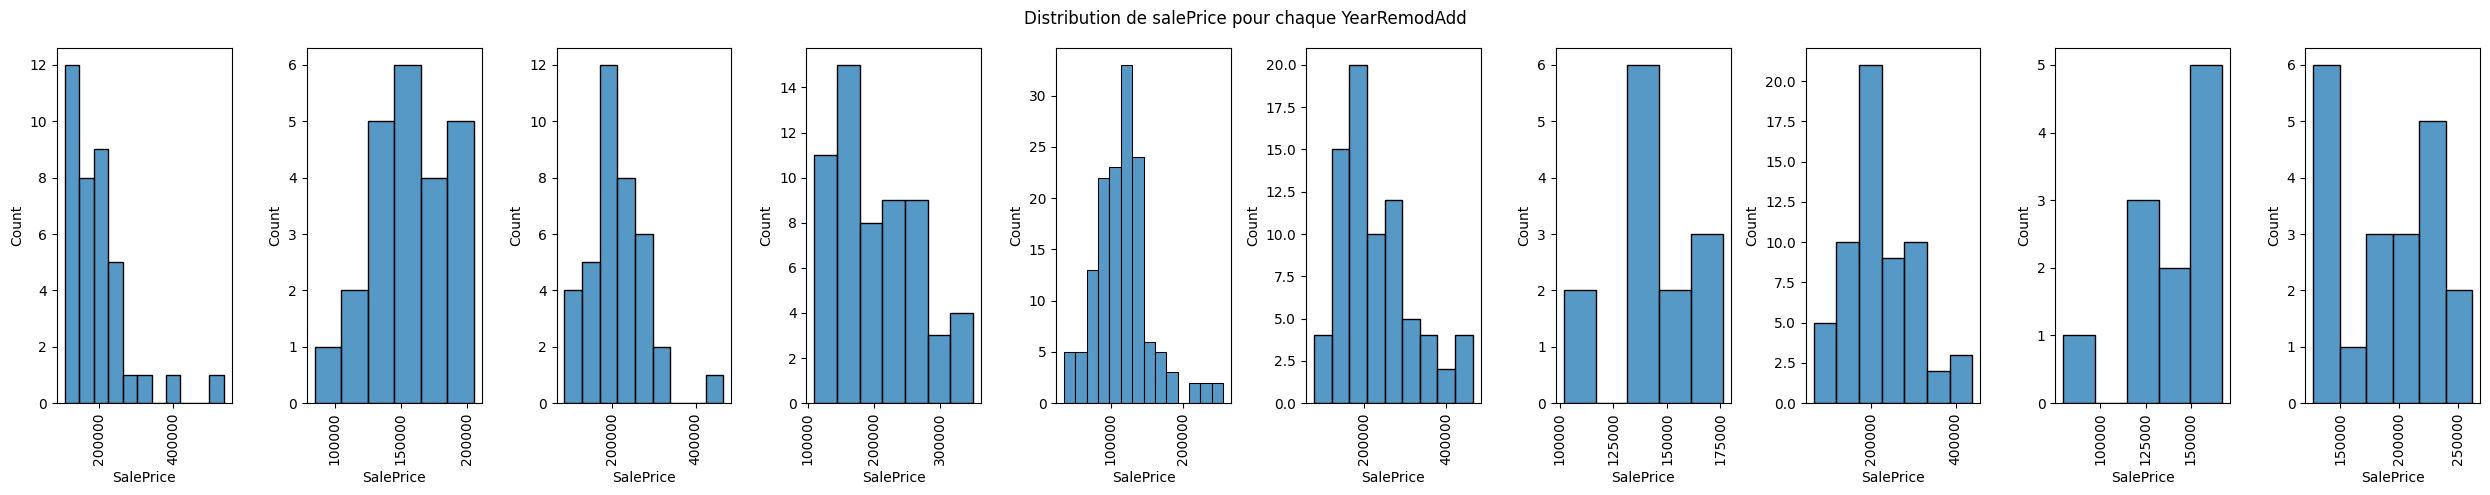

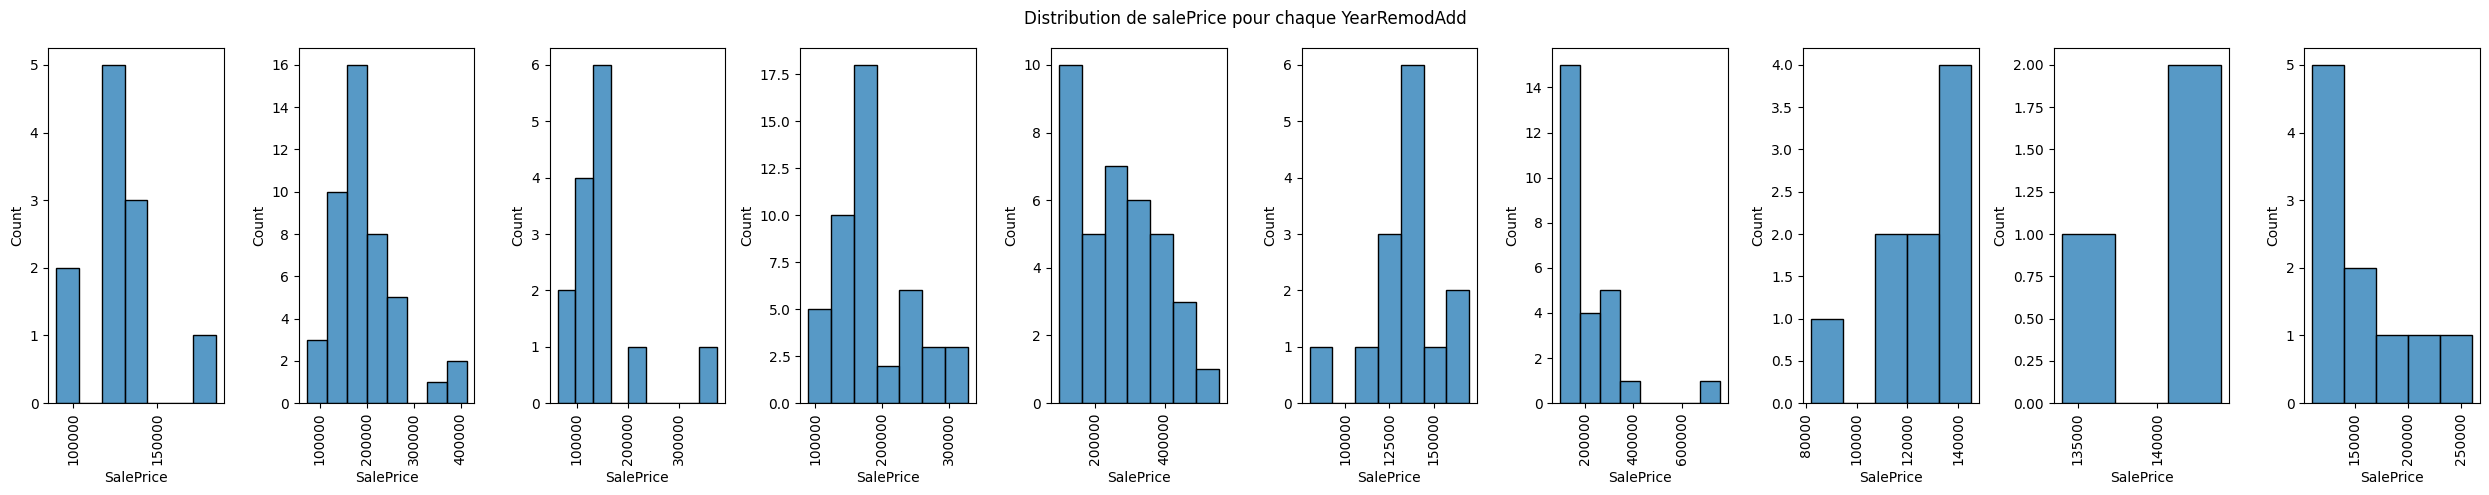

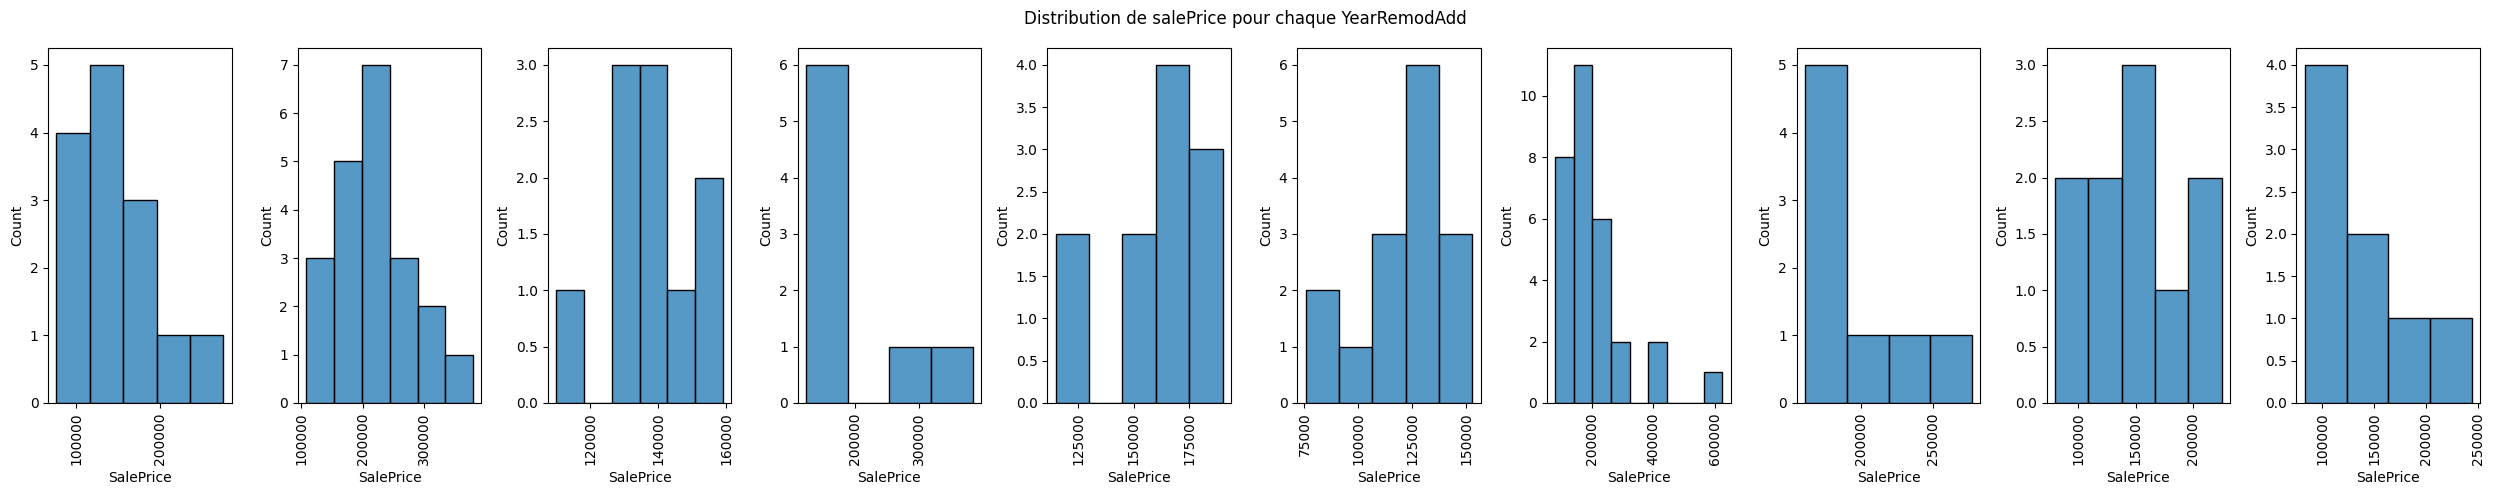

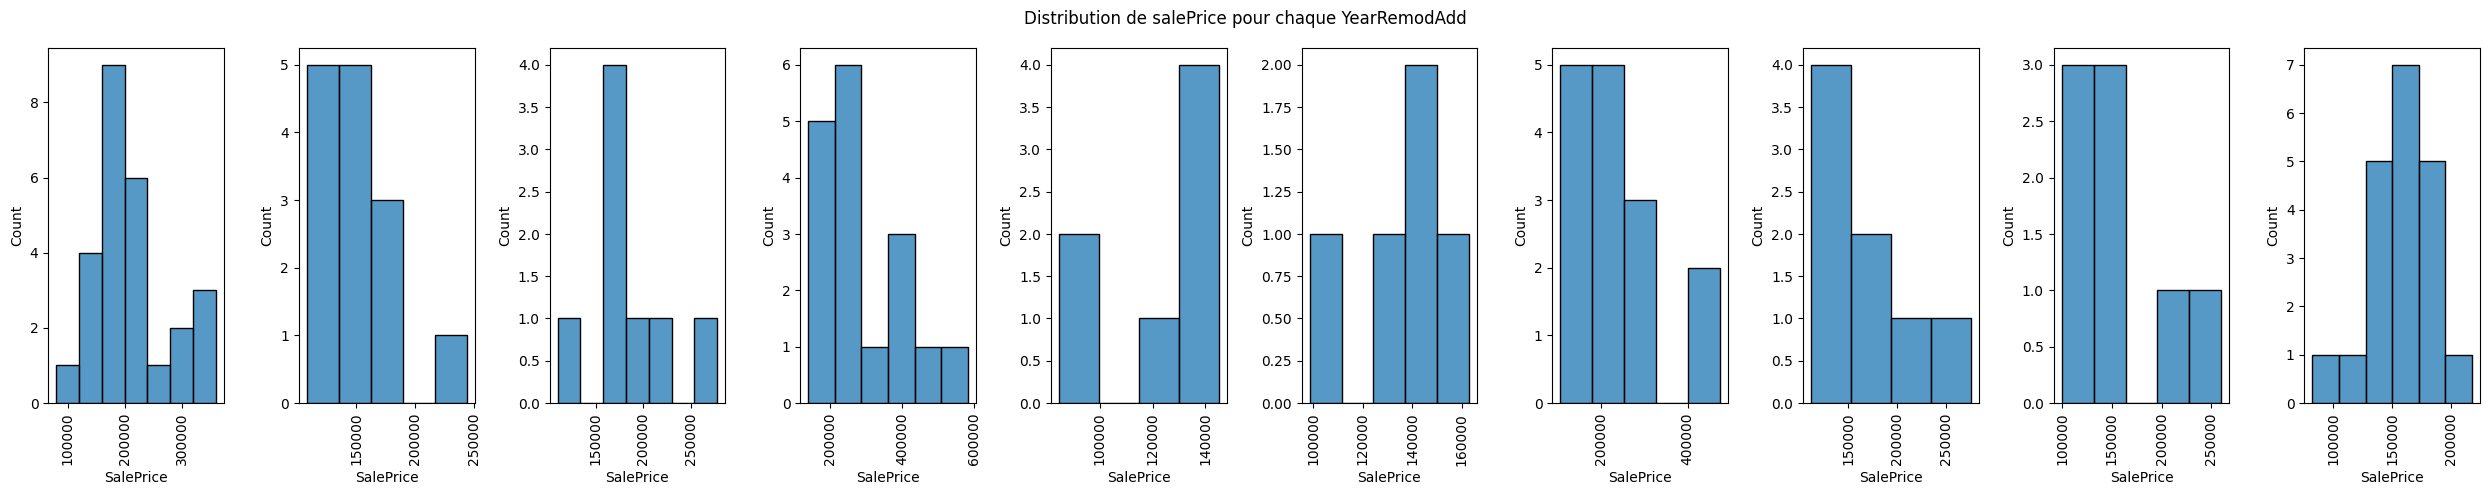

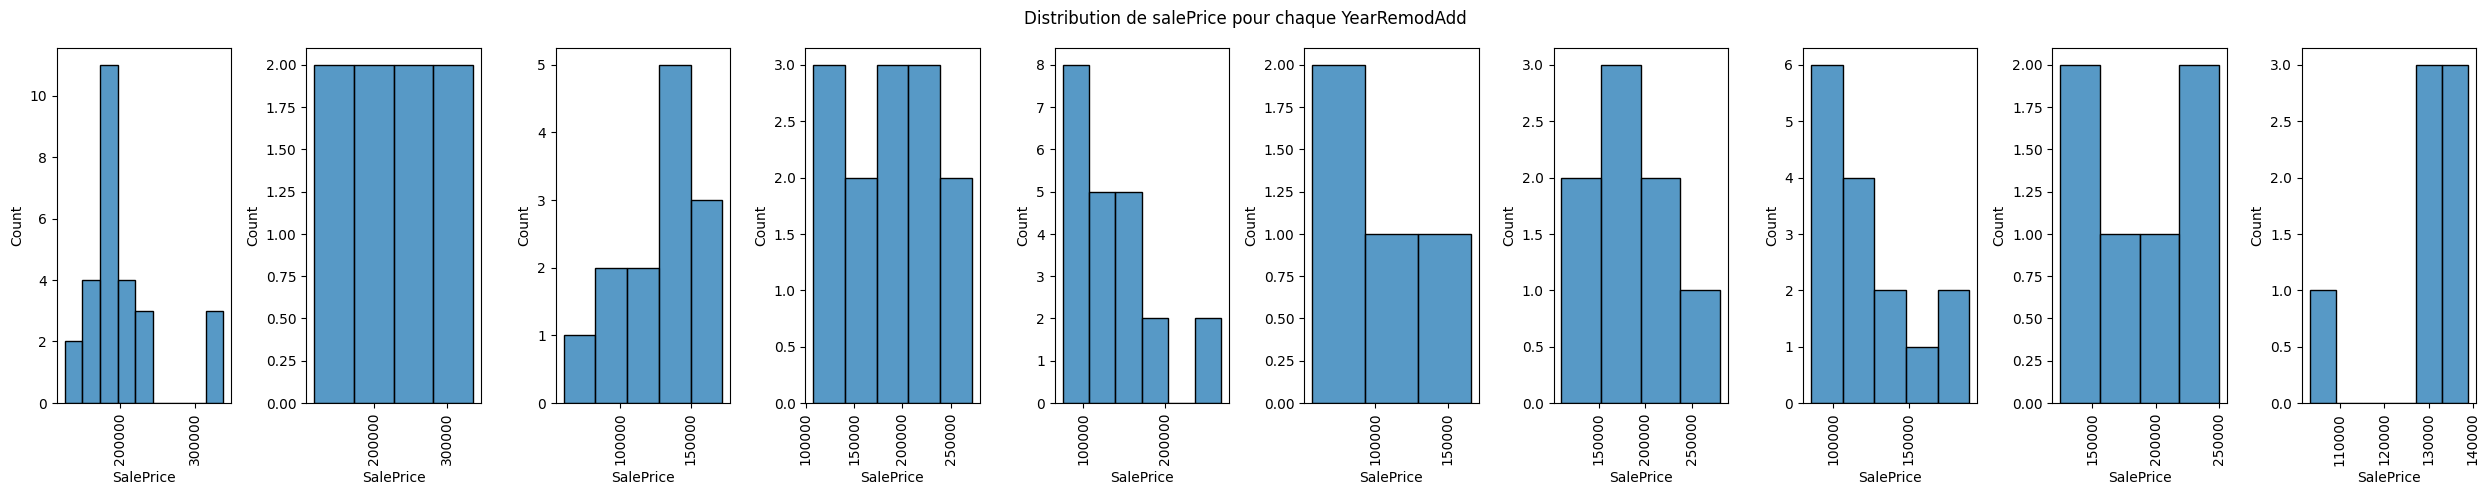

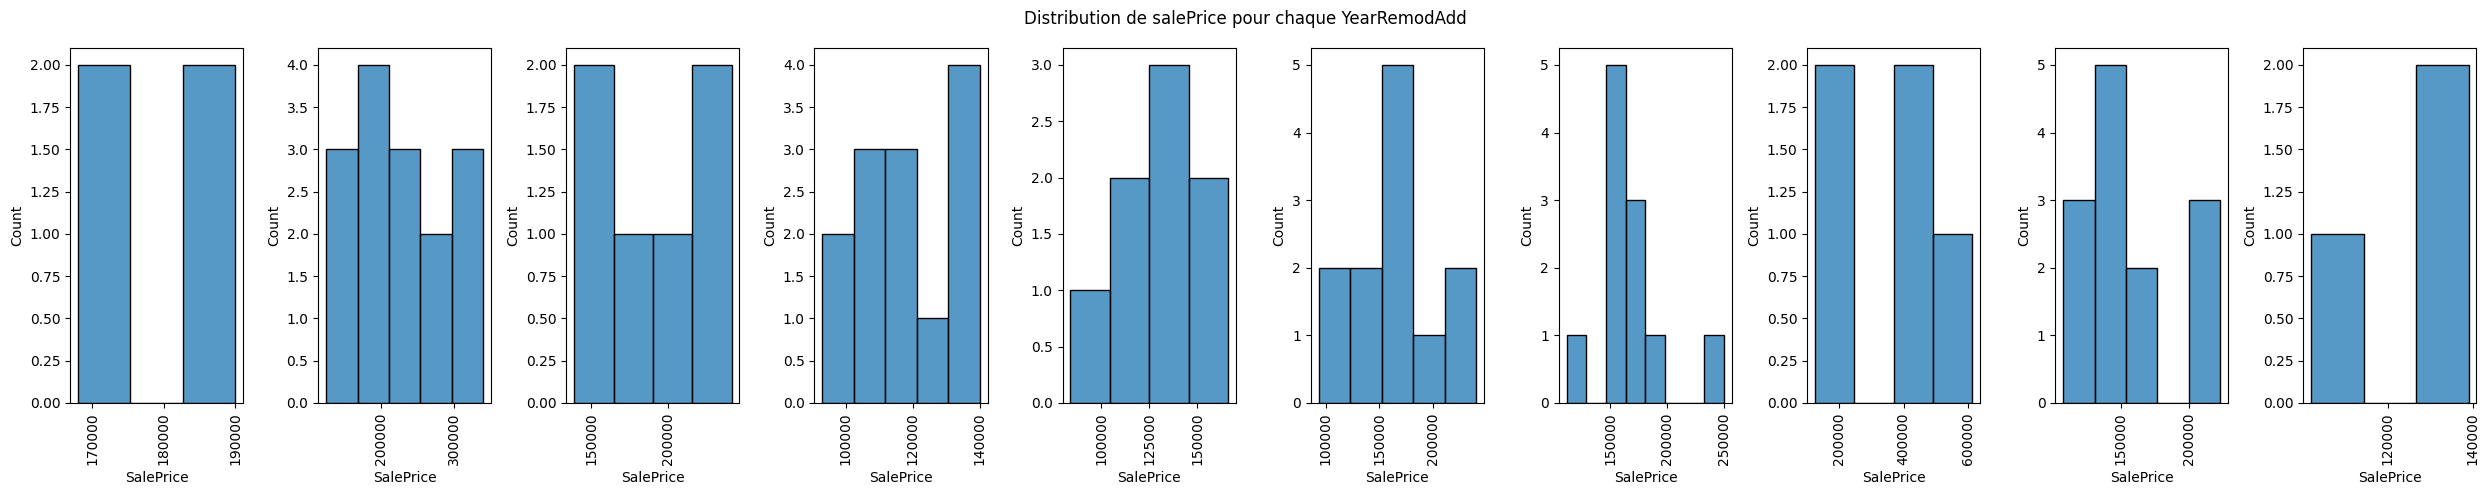

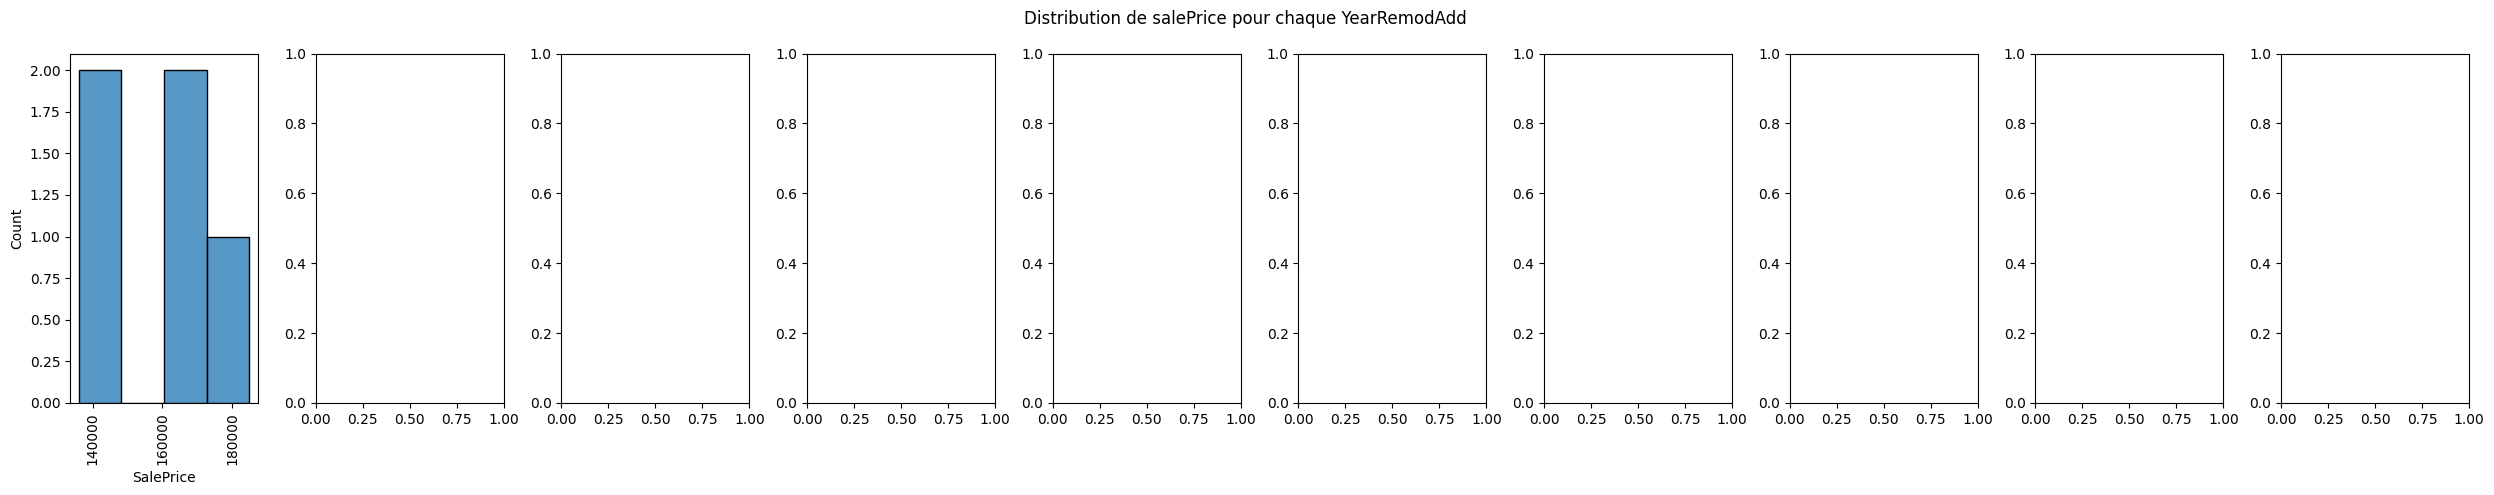

In [26]:
years_ = df_origin['YearRemodAdd'].unique().tolist()  # Convert numpy array to list
for i in range(7):
    years_select = []
    for _ in range(10):
        if len(years_) > 0:
            year = years_.pop(0)  # toujours pop le premier élément
            years_select.append(year)
        else:
            break
    fig, ax = plt.subplots(1, 10, figsize=(25,5))
    fig.suptitle("Distribution de salePrice pour chaque YearRemodAdd")
    for index,i in enumerate(years_select):
        filtre_data = df_origin.query("YearRemodAdd == @i")
        sb.histplot(x=filtre_data['SalePrice'], legend=True, ax=ax[index])
        ax[index].tick_params(axis='x', rotation=90)
    fig.tight_layout()

Donnees independante, pas la meme distribution, ne suivent pas loi normale/certains groupe n ont pas au moins 30 points et ecart type different
Donc on peut pas use anova meme avec welch pour variance non identique


In [5]:
print(f"Ho : La prix est en moyenne le meme quel que soit le YearRemodAdd")
p_value = pg.welch_anova(dv='SalePrice', between='YearRemodAdd', data=df_origin)
p_value1 = 1 / p_value['p-unc'][0]
p_value = p_value['p-unc'][0]
alpha = 0.02
if p_value > alpha:
    print(f"La pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a pas suffisament de preuve pour rejeter h0")
else:
    print(f"pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a suffisament de preuve pour rejeter Ho")


Ho : La prix est en moyenne le meme quel que soit le YearRemodAdd
pvalue est de 3.177434887416103e-36 (on 1/3.1471927370105833e+35 ou une proba de 3.177434887416103e-36 d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.
 On a 1/3.1471927370105833e+35 ou on a la proba de 3.177434887416103e-36 d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) 
 donc on a suffisament de preuve pour rejeter Ho


# ##GarageCars

In [27]:
df_origin.groupby('GarageCars')['SalePrice'].describe()

count           mean            std       min       25%       50%  \
GarageCars                                                                      
0            66.0  102136.363636   32201.230919   34900.0   82125.0   97500.0   
1           312.0  126211.243590   28852.250127   35311.0  110000.0  127000.0   
2           654.0  184143.371560   52494.032572   55993.0  148700.0  178000.0   
3           144.0  311432.000000  104137.033932   87000.0  245262.5  305450.0   
4             4.0  198819.750000   58641.130278  123000.0  180750.0  203150.0   

                  75%       max  
GarageCars                       
0           118375.00  200500.0  
1           140000.00  266500.0  
2           212000.00  430000.0  
3           372426.50  755000.0  
4           221219.75  265979.0

Ecart type different (use welch) et tous les groupe n ont pas au moins 30 points

In [34]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('GarageCars')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : 0.9583814854410373
p-value : 0.026465436196159896
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.958954918273944
p-value : 1.1007261774147469e-07
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9614765926428609
p-value : 4.494157536408166e-12
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9548707115696573
p-value : 0.00012002133203103957
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9560486279423676
p-value : 0.7540455622842686
Données normalement distribuées ✅


Tous les groupes ne suivent pas une loi normale

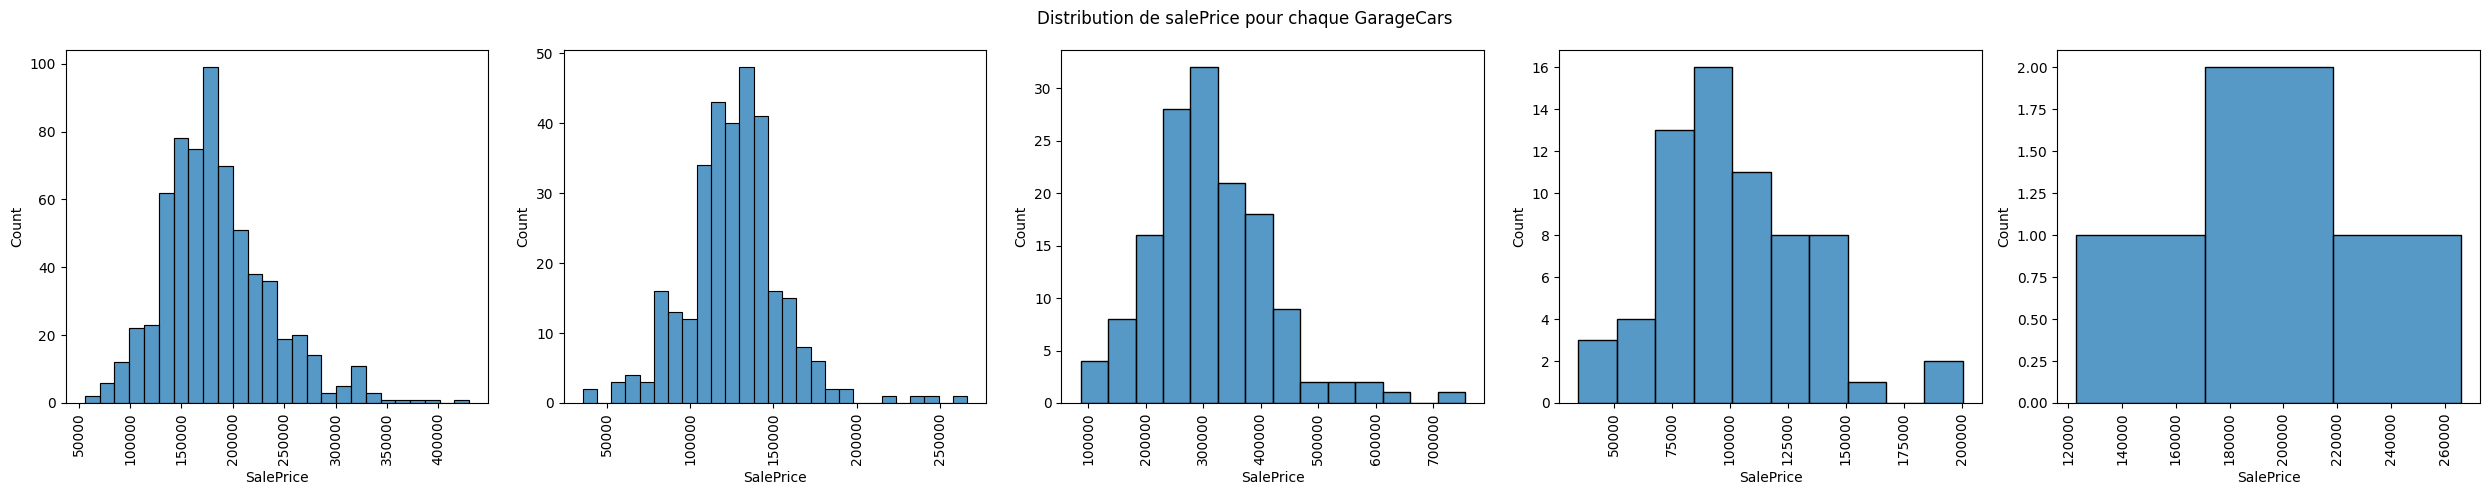

In [30]:
years_ = df_origin['GarageCars'].unique().tolist()  # Convert numpy array to list   
fig, ax = plt.subplots(1, 5, figsize=(25,5))
fig.suptitle("Distribution de salePrice pour chaque GarageCars")
for index,i in enumerate(years_):
    filtre_data = df_origin.query("GarageCars == @i")
    sb.histplot(x=filtre_data['SalePrice'], legend=True, ax=ax[index])
    ax[index].tick_params(axis='x', rotation=90)
fig.tight_layout()

Donnees independantes, distribution identique mais ne suivent pas tous une loi normale/et n ont pas tous au moins 30 point
Donc on peut pas use anova meme avec welch pour variance non identique


In [6]:
print(f"Ho : La prix est en moyenne le meme quel que soit le GarageCars")
p_value = pg.welch_anova(dv='SalePrice', between='GarageCars', data=df_origin)
p_value1 = 1 / p_value['p-unc'][0]
p_value = p_value['p-unc'][0]
alpha = 0.02
if p_value > alpha:
    print(f"La pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a pas suffisament de preuve pour rejeter h0")
else:
    print(f"pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a suffisament de preuve pour rejeter Ho")


Ho : La prix est en moyenne le meme quel que soit le GarageCars
pvalue est de 6.894769744422399e-18 (on 1/1.4503747580678256e+17 ou une proba de 6.894769744422399e-18 d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.
 On a 1/1.4503747580678256e+17 ou on a la proba de 6.894769744422399e-18 d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) 
 donc on a suffisament de preuve pour rejeter Ho


# ##FullBath

In [7]:
df_origin.groupby('FullBath')['SalePrice'].describe()

count           mean            std       min       25%       50%  \
FullBath                                                                      
0           7.0  181781.571429  113363.119242   35311.0  126479.5  145000.0   
1         539.0  133716.115028   42758.192196   34900.0  110000.0  131500.0   
2         609.0  213717.361248   73766.860864   64500.0  170000.0  195000.0   
3          25.0  347633.200000  154254.677760  170000.0  200624.0  325000.0   

               75%       max  
FullBath                      
0         227100.5  385000.0  
1         149700.0  423000.0  
2         248000.0  611657.0  
3         430000.0  755000.0

Variance non identique et on a pas au moins 30 points par groupe

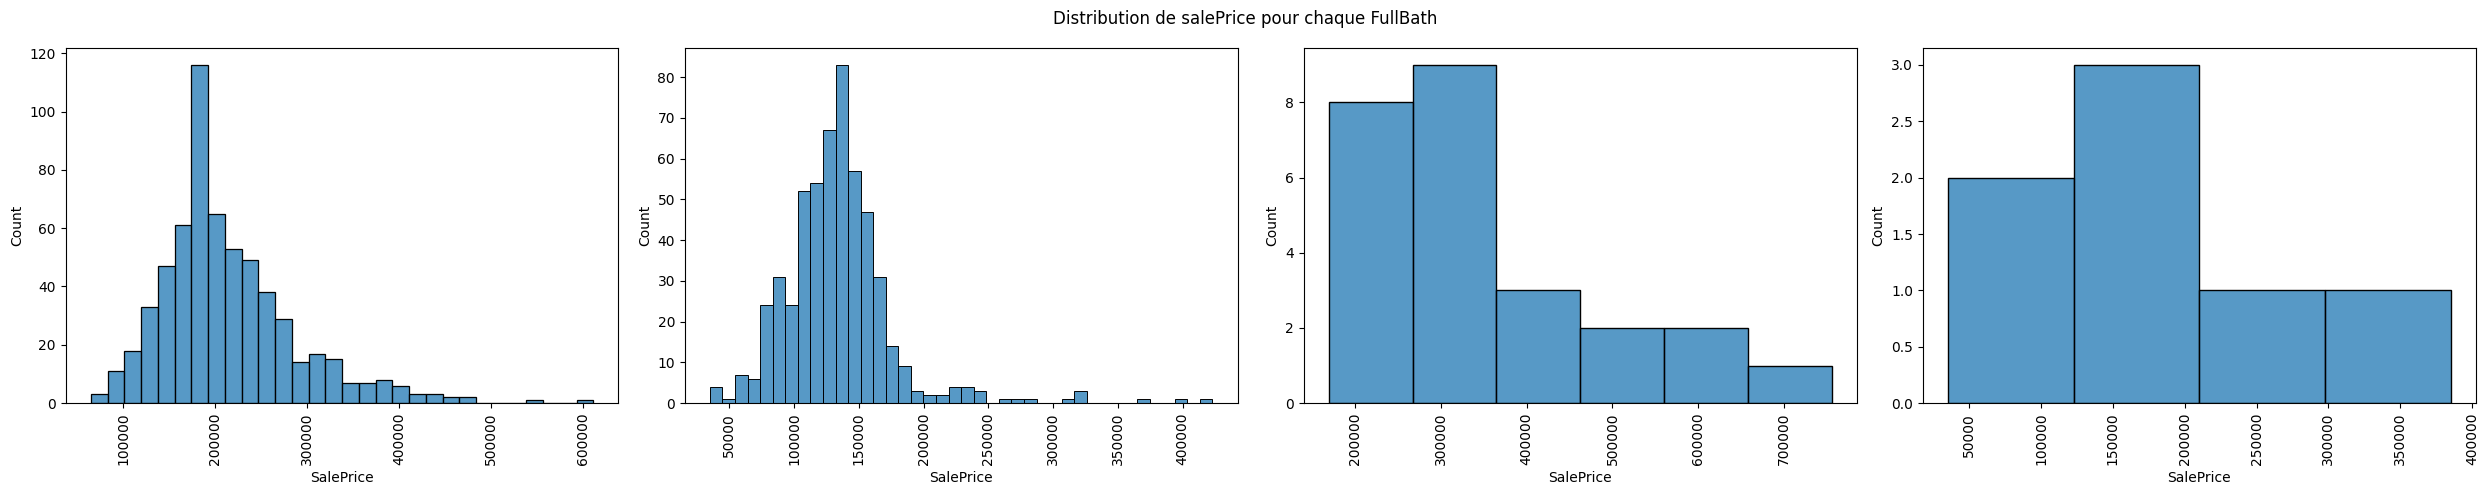

In [10]:
years_ = df_origin['FullBath'].unique().tolist()  # Convert numpy array to list
fig, ax = plt.subplots(1, 4, figsize=(25,5))
fig.suptitle("Distribution de salePrice pour chaque FullBath")
for index,i in enumerate(years_):
    filtre_data = df_origin.query("FullBath == @i")
    sb.histplot(x=filtre_data['SalePrice'], legend=True, ax=ax[index])
    ax[index].tick_params(axis='x', rotation=90)
fig.tight_layout()

Donnees independante, Distribution identique avec une forme en cloche pour chacune...

In [11]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('FullBath')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : 0.9506738682788646
p-value : 0.7358300834130095
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.8523797066528238
p-value : 4.741630996451605e-22
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.921642611282797
p-value : 2.9826286343562194e-17
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9051249436530386
p-value : 0.023760744955170932
Données normalement distribuées ✅


Tous les groupes ne suivent pas une loi normale mais ceux qui ne suivent pas loi normale ont au moins 30 points.
Donc comme les data sont independantes, au moins 30 points/loi normale et meme distribution, on peut use anova-welch(car pas meem variance)

In [12]:
print(f"Ho : La prix est en moyenne le meme quel que soit le FullBath")
p_value = pg.welch_anova(dv='SalePrice', between='FullBath', data=df_origin)
p_value1 = 1 / p_value['p-unc'][0]
p_value = p_value['p-unc'][0]
alpha = 0.02
if p_value > alpha:
    print(f"La pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a pas suffisament de preuve pour rejeter h0")
else:
    print(f"pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a suffisament de preuve pour rejeter Ho")


Ho : La prix est en moyenne le meme quel que soit le FullBath
pvalue est de 1.852150419552103e-16 (on 1/5399129516931057.0 ou une proba de 1.852150419552103e-16 d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.
 On a 1/5399129516931057.0 ou on a la proba de 1.852150419552103e-16 d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) 
 donc on a suffisament de preuve pour rejeter Ho


# ##TotRmsAbvGrd 

In [13]:
df_origin.groupby('TotRmsAbvGrd')['SalePrice'].describe()

count           mean            std       min       25%  \
TotRmsAbvGrd                                                            
2               1.0   39300.000000            NaN   39300.0   39300.0   
3              13.0  100138.461538   29751.037474   60000.0   80500.0   
4              83.0  121846.337349   42224.682494   34900.0   91150.0   
5             223.0  138754.959641   47106.370335   55000.0  110000.0   
6             337.0  161323.664688   49489.368609   37900.0  130500.0   
7             259.0  197826.868726   67009.341464   79900.0  155000.0   
8             145.0  213529.724138   77251.879181   81000.0  154000.0   
9              59.0  254544.932203   80652.436656   98000.0  201762.0   
10             34.0  306033.294118  149384.732451  118500.0  169975.0   
11             14.0  322460.357143  130583.236289  107500.0  249500.0   
12             11.0  280971.454545  165510.918593  142953.0  175000.0   
14              1.0  200000.000000            NaN  200000.0  200000.0   

                   50%       75%       max  
TotRmsAbvGrd                                
2              39300.0   39300.0   39300.0  
3              86000.0  131500.0  149300.0  
4             120000.0  139500.0  260000.0  
5             129900.0  155500.0  385000.0  
6             155000.0  185850.0  374000.0  
7             182900.0  231750.0  465000.0  
8             200000.0  253293.0  466500.0  
9             250000.0  311906.5  426000.0  
10            300000.0  373650.0  755000.0  
11            311738.5  372000.0  611657.0  
12            200000.0  362500.0  582933.0  
14            200000.0  200000.0  200000.0

Variance non identique, tous les groupes n ont pas au moins 30 points

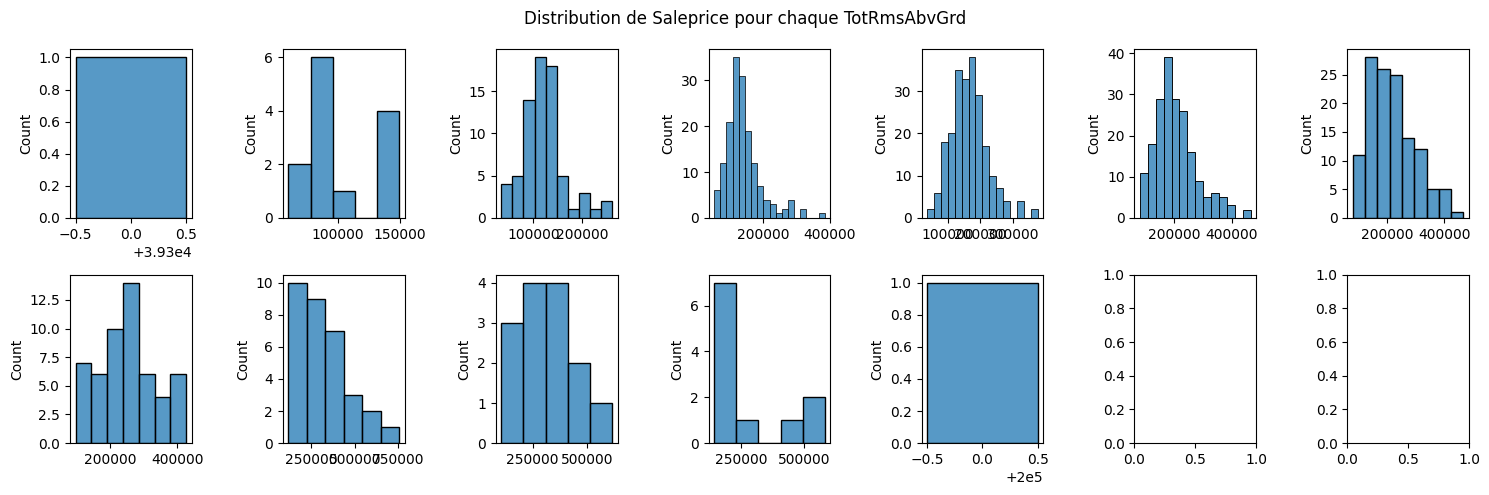

In [24]:
fig, ax = plt.subplots(2, 7, figsize=(15,5))
fig.suptitle("Distribution de Saleprice pour chaque TotRmsAbvGrd")
for index, i in enumerate(df_origin.groupby('TotRmsAbvGrd')['SalePrice'].unique().tolist()):
    if index < 7:
        sb.histplot(x=i, ax=ax[0][index], legend=True)
    else:
        sb.histplot(x=i, ax=ax[1][abs(7-index)], legend=True)
fig.tight_layout()


Donnee independante, distribtion qui ne sont pas identique 

In [25]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('TotRmsAbvGrd')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.8638400519146449
p-value : 0.04330132083867989
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.943726453911941
p-value : 0.0012088238560244925
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.8601650915517342
p-value : 2.1162796858925208e-13
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9544710735451307
p-value : 1.0293473169774306e-08
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9277551074368294
p-value : 6.439619713482647e-10
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9462305013906035
p-value : 2.2151682083973245e-05
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9816812889401668
p-value : 0.5152051

/tmp/ipykernel_1325/3434172393.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = sp.shapiro(i)


On ne peut pas utliser anova_welch car chaque groupe ne suient pas une loi normale/pas tous au moins 30 points, et distribtion non identique

# ##KitchenQual

In [26]:
df_origin.groupby('KitchenQual')['SalePrice'].describe()

count           mean            std      min        25%  \
KitchenQual                                                            
Ex            84.0  322685.357143  118171.577018  86000.0  252719.75   
Fa            34.0  105477.735294   35368.843803  39300.0   82000.00   
Gd           462.0  211736.787879   65586.483693  79000.0  171787.50   
TA           600.0  139459.918333   39949.655052  34900.0  115000.00   

                  50%       75%       max  
KitchenQual                                
Ex           316530.5  388295.5  755000.0  
Fa           111750.0  129500.0  200000.0  
Gd           200000.0  242000.0  625000.0  
TA           136500.0  160000.0  375000.0

au moins 30 points pour chaque groupes, pas la meme variance donc test anova welch

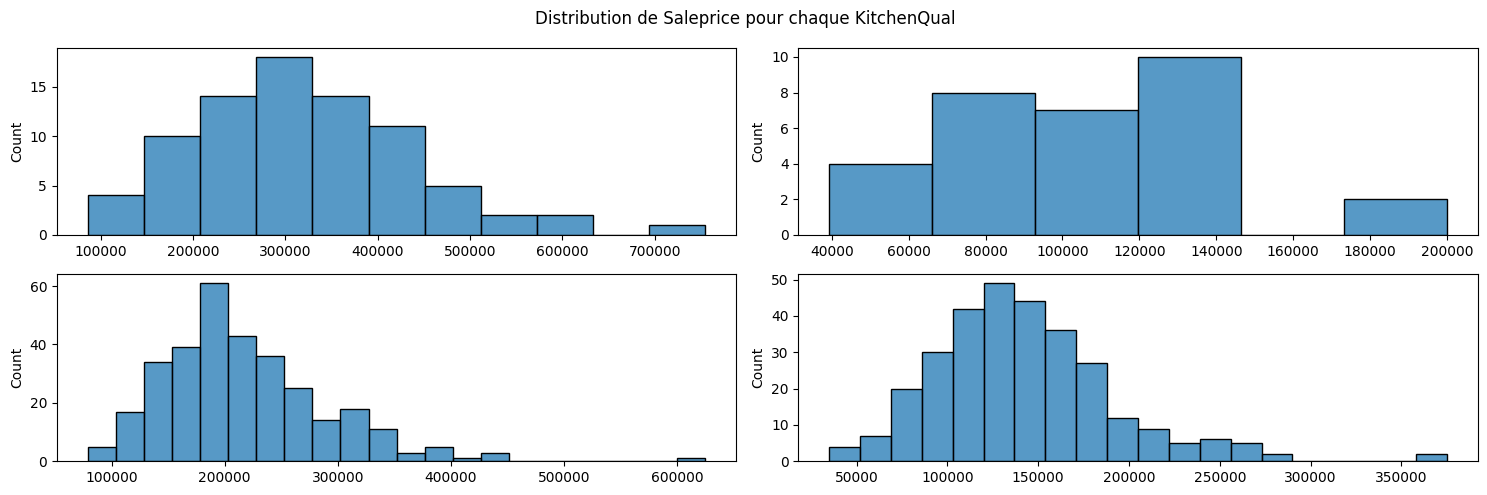

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))
fig.suptitle("Distribution de Saleprice pour chaque KitchenQual")
for index, i in enumerate(df_origin.groupby('KitchenQual')['SalePrice'].unique().tolist()):
    if index < 2:
        sb.histplot(x=i, ax=ax[0][index], legend=True)
    else:
        sb.histplot(x=i, ax=ax[1][abs(2-index)], legend=True)
fig.tight_layout()

donnees independantes, suit loi normal/au mooins 30 points pour chaque groupe et identiquement distribué donc on peut use test anova welch 

In [29]:
print(f"Ho : La prix est en moyenne le meme quel que soit le KitchenQual")
p_value = pg.welch_anova(dv='SalePrice', between='KitchenQual', data=df_origin)
p_value1 = 1 / p_value['p-unc'][0]
p_value = p_value['p-unc'][0]
alpha = 0.02
if p_value > alpha:
    print(f"La pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a pas suffisament de preuve pour rejeter h0")
else:
    print(f"pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a suffisament de preuve pour rejeter Ho")


Ho : La prix est en moyenne le meme quel que soit le KitchenQual
pvalue est de 1.478972789733783e-49 (on 1/6.761449615175147e+48 ou une proba de 1.478972789733783e-49 d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.
 On a 1/6.761449615175147e+48 ou on a la proba de 1.478972789733783e-49 d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) 
 donc on a suffisament de preuve pour rejeter Ho


# ##Fireplaces

In [30]:
df_origin.groupby('Fireplaces')['SalePrice'].describe()

count           mean            std       min       25%       50%  \
Fireplaces                                                                      
0           566.0  140227.731449   44629.245900   34900.0  110000.0  135000.0   
1           513.0  211149.159844   80200.582575   60000.0  156932.0  189000.0   
2            97.0  241719.020619  114039.961049  110000.0  160000.0  206900.0   
3             4.0  263750.000000  103390.441209  160000.0  182500.0  267500.0   

                 75%       max  
Fireplaces                      
0           163875.0  342643.0  
1           253000.0  625000.0  
2           299800.0  755000.0  
3           348750.0  360000.0

chaque groupe n a pas au moins 30 points, variance non identique

In [32]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('Fireplaces')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : 0.9666306132822857
p-value : 4.811809006627193e-10
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9105786414450091
p-value : 8.086753763836022e-17
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.8341727399514844
p-value : 4.760988819971286e-09
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.8308919273615908
p-value : 0.17013975251842595
Données normalement distribuées ✅


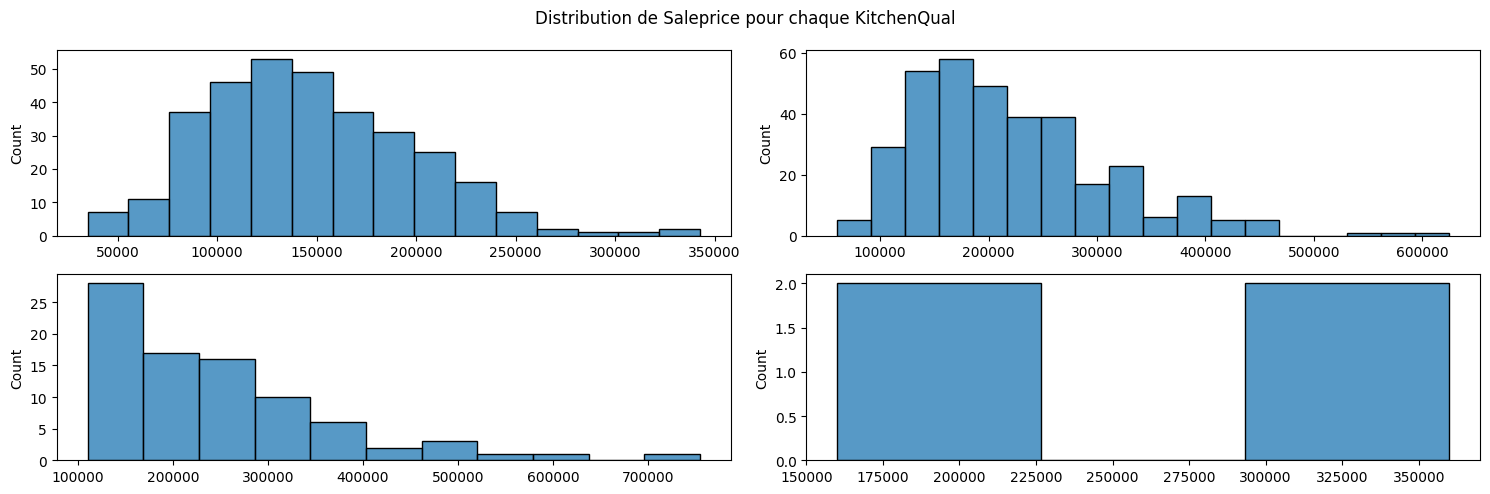

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))
fig.suptitle("Distribution de Saleprice pour chaque KitchenQual")
for index, i in enumerate(df_origin.groupby('Fireplaces')['SalePrice'].unique().tolist()):
    if index < 2:
        sb.histplot(x=i, ax=ax[0][index], legend=True)
    else:
        sb.histplot(x=i, ax=ax[1][abs(2-index)], legend=True)
fig.tight_layout()

data independantes, suit loi normale/au moins 30 points et vairance non identiques donc on peut use anova-welch
LEs distribution n ont pas l aire identique..

In [33]:
print(f"Ho : La prix est en moyenne le meme quel que soit le Fireplaces")
p_value = pg.welch_anova(dv='SalePrice', between='Fireplaces', data=df_origin)
p_value1 = 1 / p_value['p-unc'][0]
p_value = p_value['p-unc'][0]
alpha = 0.02
if p_value > alpha:
    print(f"La pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a pas suffisament de preuve pour rejeter h0")
else:
    print(f"pvalue est de {p_value} (on 1/{p_value1} ou une proba de {p_value} d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.\n On a 1/{p_value1} ou on a la proba de {p_value} d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) \n donc on a suffisament de preuve pour rejeter Ho")


Ho : La prix est en moyenne le meme quel que soit le Fireplaces
pvalue est de 2.582596153395329e-10 (on 1/3872072676.501527 ou une proba de 2.582596153395329e-10 d observer une diff au moins aussi extreme entre notre observation et l hypotese de depart si ho etait vrai.
 On a 1/3872072676.501527 ou on a la proba de 2.582596153395329e-10 d observer notre observation si h0 etait vrai et donc que la moyenne etait identique) 
 donc on a suffisament de preuve pour rejeter Ho


# ##Neighborhood

In [43]:
df_origin.groupby('Neighborhood')['SalePrice'].describe()

count           mean            std       min       25%  \
Neighborhood                                                            
Blmngtn        16.0  193612.812500   30929.456191  159895.0  173625.0   
Blueste         2.0  137500.000000   19091.883092  124000.0  130750.0   
BrDale         15.0  103593.333333   14357.002605   83000.0   90500.0   
BrkSide        50.0  123869.500000   40422.826223   39300.0  100500.0   
ClearCr        23.0  208731.826087   49783.573654  130000.0  186250.0   
CollgCr       120.0  197651.450000   46038.800718  110000.0  160312.5   
Crawfor        43.0  205599.093023   66309.266825   90350.0  159250.0   
Edwards        76.0  122186.447368   37726.042984   58500.0   99425.0   
Gilbert        59.0  192470.016949   37282.632585  145000.0  173500.0   
IDOTRR         24.0   90840.833333   31165.135850   34900.0   68050.0   
MeadowV        13.0   91838.461538   20691.726948   75000.0   81000.0   
Mitchel        36.0  154076.000000   31184.110038   93500.0  133562.5   
NAmes         198.0  145007.540404   33735.622622   87500.0  125000.0   
NPkVill         5.0  140550.000000   12349.595135  127500.0  128000.0   
NWAmes         57.0  192012.368421   39580.820415   82500.0  173000.0   
NoRidge        33.0  336942.666667  106513.259496  248000.0  271000.0   
NridgHt        61.0  327473.245902  103161.237845  154000.0  254000.0   
OldTown        91.0  130304.494505   57453.409925   37900.0  105450.0   
SWISU          21.0  139732.571429   33494.350999   60000.0  127000.0   
Sawyer         62.0  137407.935484   23602.146112   62383.0  127250.0   
SawyerW        51.0  186423.470588   57003.081006   76000.0  145500.0   
Somerst        67.0  224830.029851   59329.746099  144152.0  176500.0   
StoneBr        18.0  307035.444444   96635.190852  170000.0  240125.0   
Timber         29.0  239718.620690   70197.788361  137500.0  180000.0   
Veenker        10.0  233250.000000   73800.124209  162500.0  182875.0   

                   50%        75%       max  
Neighborhood                                 
Blmngtn       186000.0  199023.25  264561.0  
Blueste       137500.0  144250.00  151000.0  
BrDale        106000.0  115500.00  125000.0  
BrkSide       121300.0  136850.00  223500.0  
ClearCr       200000.0  240750.00  328000.0  
CollgCr       198400.0  226250.00  313000.0  
Crawfor       191000.0  232000.00  381000.0  
Edwards       118000.0  138025.00  274970.0  
Gilbert       181000.0  193750.00  377500.0  
IDOTRR         95250.0  115850.00  139400.0  
MeadowV        85000.0   92000.00  151400.0  
Mitchel       153450.0  169925.00  240000.0  
NAmes         140000.0  158000.00  345000.0  
NPkVill       143750.0  148500.00  155000.0  
NWAmes        185000.0  207500.00  299800.0  
NoRidge       310000.0  341000.00  755000.0  
NridgHt       325300.0  394617.00  611657.0  
OldTown       119900.0  140000.00  475000.0  
SWISU         139500.0  159434.00  200000.0  
Sawyer        136750.0  149875.00  190000.0  
SawyerW       179200.0  226500.00  320000.0  
Somerst       215200.0  252839.00  423000.0  
StoneBr       282000.0  376194.50  538000.0  
Timber        224500.0  293077.00  378500.0  
Veenker       206000.0  263875.00  385000.0

pas meem variance, pas au moins 30 points par groupe

In [41]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('Neighborhood')['SalePrice'].apply(list):
    print(len(i))
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

16
Ho : Suit une loi normal
Statistique de test : 0.8693497839430373
p-value : 0.026580040162268656
Données normalement distribuées ✅
2
Ho : Suit une loi normal
Statistique de test : nan
p-value : nan
Données PAS normalement distribuées ❌
15
Ho : Suit une loi normal
Statistique de test : 0.9305266658769005
p-value : 0.2778638135668342
Données normalement distribuées ✅
50
Ho : Suit une loi normal
Statistique de test : 0.9411252943880609
p-value : 0.014930361172613845
Données PAS normalement distribuées ❌
23
Ho : Suit une loi normal
Statistique de test : 0.9662820007314942
p-value : 0.6008140288482902
Données normalement distribuées ✅
120
Ho : Suit une loi normal
Statistique de test : 0.9723916781482238
p-value : 0.014296583789660741
Données PAS normalement distribuées ❌
43
Ho : Suit une loi normal
Statistique de test : 0.946900101849032
p-value : 0.04597533982158895
Données normalement distribuées ✅
76
Ho : Suit une loi normal
Statistique de test : 0.9109741598947192
p-value : 5.6053074

/tmp/ipykernel_1325/922746336.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = sp.shapiro(i)


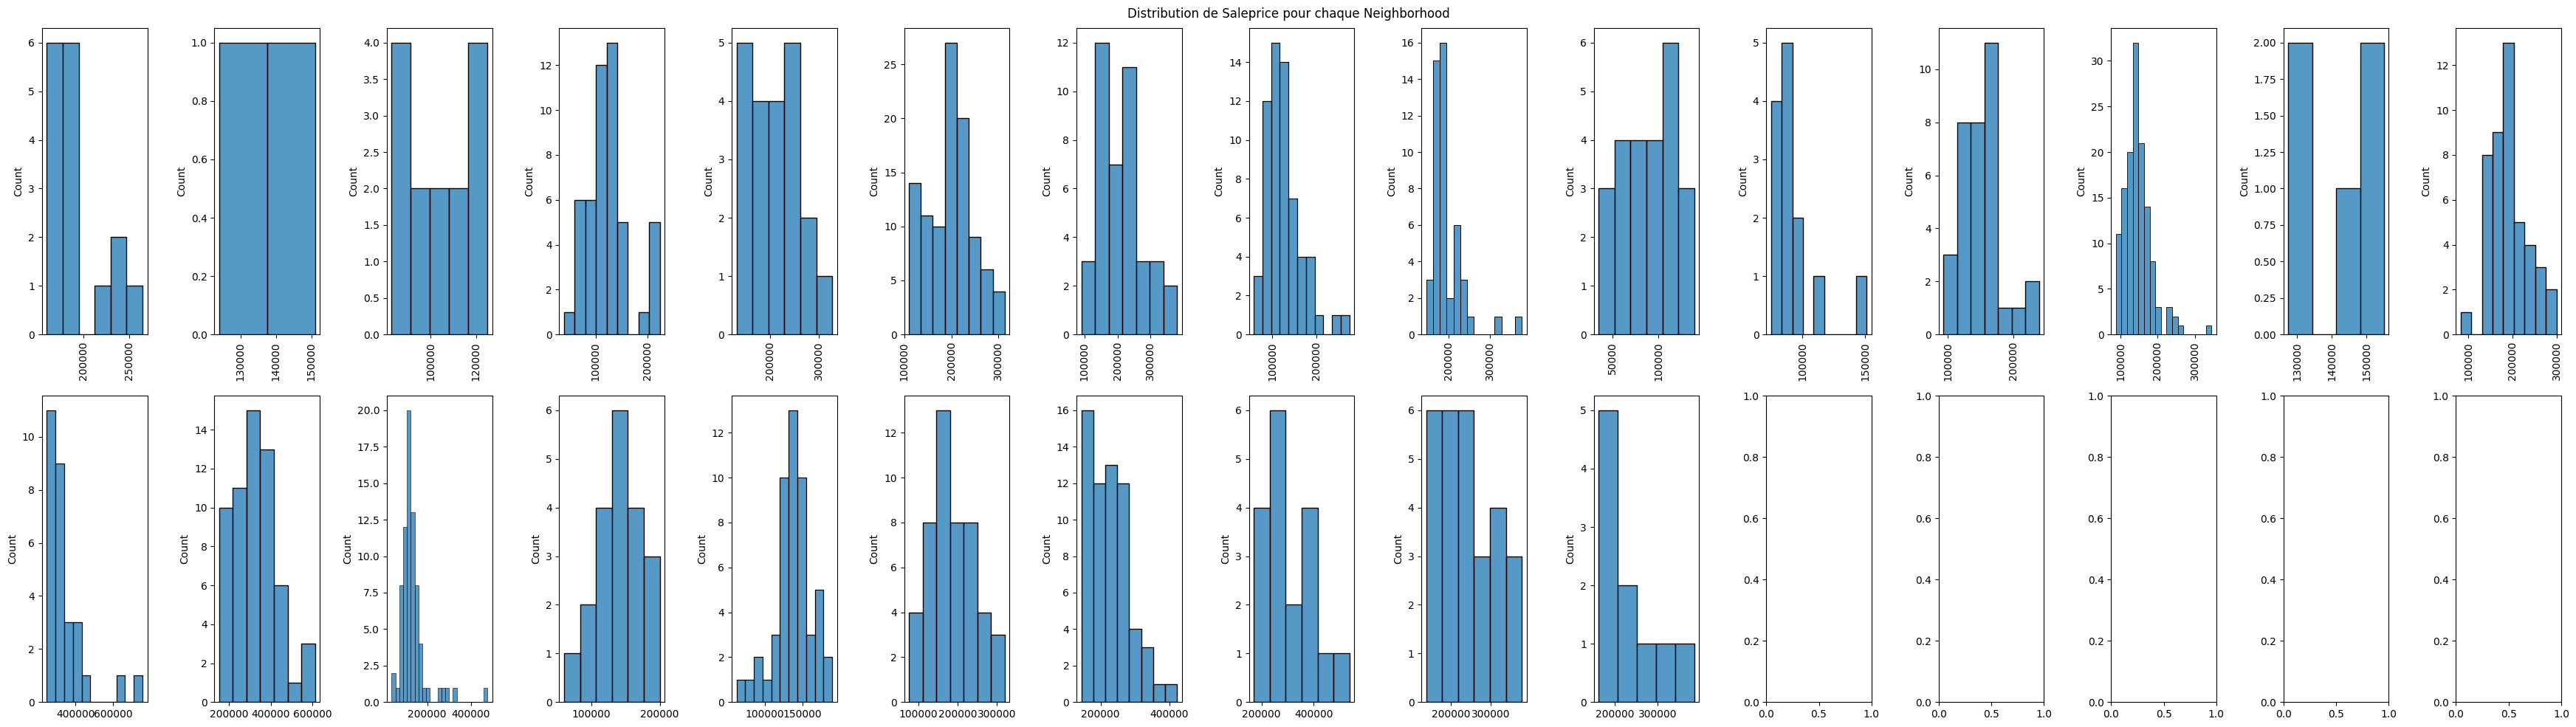

In [53]:
fig, ax = plt.subplots(2, 15, figsize=(35,10))
fig.suptitle("Distribution de Saleprice pour chaque Neighborhood")
for index, i in enumerate(df_origin.groupby('Neighborhood')['SalePrice'].unique().tolist()):
    if index < 15:
        sb.histplot(x=i, ax=ax[0][index], legend=True)
        ax[0][index].tick_params(axis='x', rotation=90)
    else:
        sb.histplot(x=i, ax=ax[1][abs(15-index)], legend=True)
fig.tight_layout()

data independante, tous les groupes ne suivent pas loi normale/n ont pas tous au moins 30 points et n ont pas l aire identiquement distribue
donc on peut pas use anova welch

# ##ExterQual

In [34]:
df_origin.groupby('ExterQual')['SalePrice'].describe()

count           mean            std       min       25%       50%  \
ExterQual                                                                      
Ex          44.0  372557.136364  121455.309434  160000.0  311404.0  374189.0   
Fa          11.0   94072.090909   42834.349395   39300.0   71000.0   85000.0   
Gd         383.0  231246.000000   66978.528290  107400.0  185675.0  219500.0   
TA         742.0  143120.801887   43400.786675   34900.0  117000.0  138843.5   

                75%       max  
ExterQual                      
Ex         437560.5  755000.0  
Fa         107500.0  200000.0  
Gd         264780.5  625000.0  
TA         165000.0  381000.0

pas meem variance, pas au moins 30 points par groupe

In [38]:
# Exemple sur tes données filtrées
for i in df_origin.groupby('ExterQual')['SalePrice'].apply(list):
    print("Ho : Suit une loi normal")
    stat, p_value = sp.shapiro(i)

    print("Statistique de test :", stat)
    print("p-value :", p_value)

    if p_value > 0.02:
        print("Données normalement distribuées ✅")
    else:
        print("Données PAS normalement distribuées ❌")

Ho : Suit une loi normal
Statistique de test : 0.9584239061118971
p-value : 0.11362012748023681
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.8819243481873463
p-value : 0.11006002494020928
Données normalement distribuées ✅
Ho : Suit une loi normal
Statistique de test : 0.9295667128615667
p-value : 1.8522105245326746e-12
Données PAS normalement distribuées ❌
Ho : Suit une loi normal
Statistique de test : 0.9373857398939582
p-value : 4.145574700144366e-17
Données PAS normalement distribuées ❌


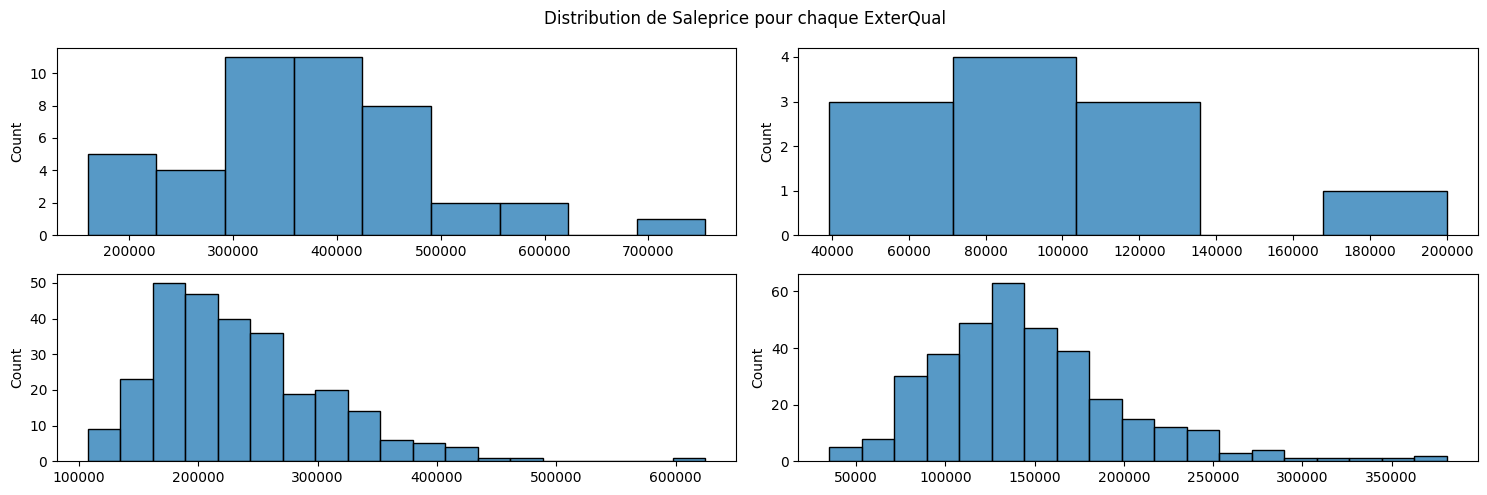

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(15,5))
fig.suptitle("Distribution de Saleprice pour chaque ExterQual")
for index, i in enumerate(df_origin.groupby('ExterQual')['SalePrice'].unique().tolist()):
    if index < 2:
        sb.histplot(x=i, ax=ax[0][index], legend=True)
    else:
        sb.histplot(x=i, ax=ax[1][abs(2-index)], legend=True)
fig.tight_layout()

data independante, distribution ont l air d avoir la meme distribution (la forme), chaque groupe ne suient pas une loi normale
donc on peut pas use anova welch

# #Continu/continu

# ##GrLivArea

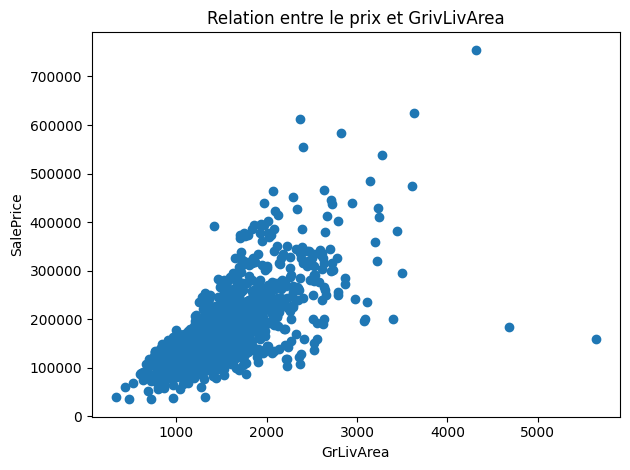

In [17]:
plt.scatter(df_origin['GrLivArea'],df_origin['SalePrice'])
plt.title("Relation entre le prix et GrivLivArea")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.tight_layout()

Ici, on peut voir sur le graphique que on a une tendance lineaire entre le prix et GrLiveArea. Cependant, etant donnee que ce n est pas parfaitement lienaire, pour etre rigoureux, on va plutot
utiliser spearman qui est plus adapte pour capter les relation non lineaire

In [34]:
corr_spearman, p_value = sp.spearmanr(df_origin['SalePrice'], df_origin['GrLivArea'])
print("Ho : Il n y a pas de correlation entre SalePrice et GrLivArea")
if corr_spearman > 0:
    print(f"La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1({corr_spearman})")
else:
    print(f"La direction de la relation est plutot decroissante et plus ou moins forte selon si elle est proche de -1({corr_spearman})")
alpha = 0.02
if p_value < alpha:
    print(f"La proba est de {p_value}.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/{(1/p_value)} que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a {p_value*100}% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard")
else:
    print(f"La proba est de {p_value}. On a pas suffisament de preuve jusqu a preuve du contrainre pour rejeter h0.")


Ho : Il n y a pas de correlation entre SalePrice et GrLivArea
La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1(0.7424134236153882)
La proba est de 3.691242146105794e-207.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/2.709115144491361e+206 que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a 3.691242146105794e-205% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard


# ##TotalBsmtSF

Text(0, 0.5, 'SalePrice')

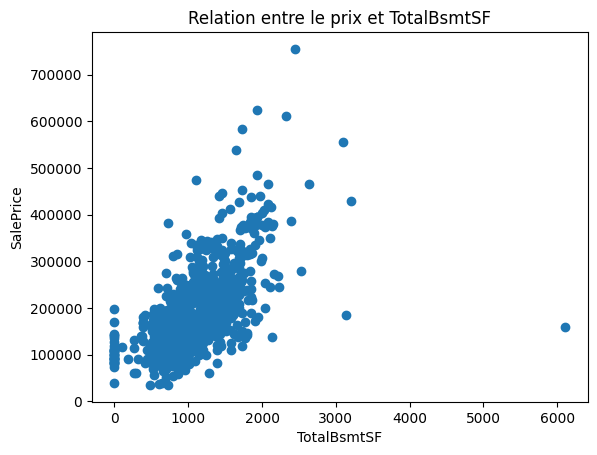

In [28]:
plt.scatter(df_origin['TotalBsmtSF'], df_origin['SalePrice'])
plt.title("Relation entre le prix et TotalBsmtSF")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

Ici, on peut voir sur le graphique que on a une tendance lineaire entre le prix et GrLiveArea. Cependant, etant donnee que ce n est pas parfaitement lienaire, pour etre rigoureux, on va plutot
utiliser spearman qui est plus adapte pour capter les relation non lineaire

In [33]:
corr_spearman, p_value = sp.spearmanr(df_origin['TotalBsmtSF'], df_origin['SalePrice'])
print("Ho : Il n y a pas de correlation entre TotalBsmtSF et SalePrice")
if corr_spearman > 0:
    print(f"La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1({corr_spearman})")
else:
    print(f"La direction de la relation est plutot decroissante et plus ou moins forte selon si elle est proche de -1({corr_spearman})")
alpha = 0.02
if p_value < alpha:
    print(f"La proba est de {p_value}.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/{(1/p_value)} que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a {p_value*100}% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard")
else:
    print(f"La proba est de {p_value}. On a pas suffisament de preuve jusqu a preuve du contrainre pour rejeter h0.")


Ho : Il n y a pas de correlation entre TotalBsmtSF et SalePrice
La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1(0.617201481603748)
La proba est de 8.068657700912373e-125.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/1.2393635187757734e+124 que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a 8.068657700912372e-123% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard


# ##1stFlrSF

Text(0, 0.5, 'SalePrice')

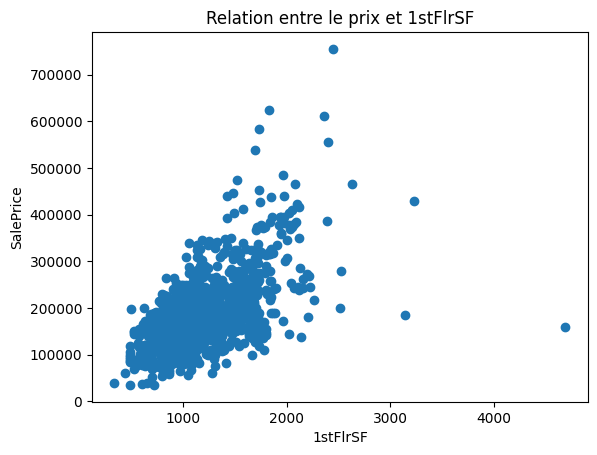

In [27]:
plt.scatter(df_origin['1stFlrSF'], df_origin['SalePrice'])
plt.title("Relation entre le prix et 1stFlrSF")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")

Ici, on peut voir sur le graphique que on a une tendance lineaire entre le prix et GrLiveArea. Cependant, etant donnee que ce n est pas parfaitement lienaire, pour etre rigoureux, on va plutot
utiliser spearman qui est plus adapte pour capter les relation non lineaire

In [32]:
corr_spearman, p_value = sp.spearmanr(df_origin['1stFlrSF'], df_origin['SalePrice'])
print("Ho : Il n y a pas de correlation entre 1stFlrSF et SalePrice")
if corr_spearman > 0:
    print(f"La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1({corr_spearman})")
else:
    print(f"La direction de la relation est plutot decroissante et plus ou moins forte selon si elle est proche de -1({corr_spearman})")
alpha = 0.02
if p_value < alpha:
    print(f"La proba est de {p_value}.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/{(1/p_value)} que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a {p_value*100}% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard")
else:
    print(f"La proba est de {p_value}. On a pas suffisament de preuve jusqu a preuve du contrainre pour rejeter h0.")


Ho : Il n y a pas de correlation entre 1stFlrSF et SalePrice
La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1(0.5947604378180114)
La proba est de 8.339838389776158e-114.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/1.1990640025182073e+113 que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a 8.339838389776157e-112% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard


# ##LotArea

Text(0, 0.5, 'SalePrice')

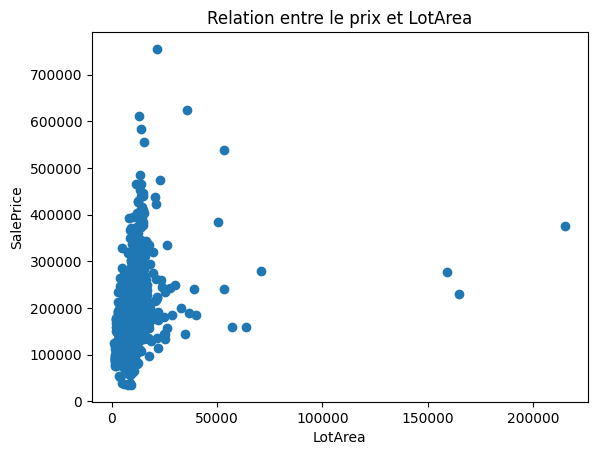

In [29]:
plt.scatter(df_origin['LotArea'], df_origin['SalePrice'])
plt.title("Relation entre le prix et LotArea")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")

Ici, on peut voir sur le graphique que on a une tendance lineaire entre le prix et GrLiveArea. Cependant, etant donnee que ce n est pas parfaitement lienaire, pour etre rigoureux, on va plutot
utiliser spearman qui est plus adapte pour capter les relation non lineaire

In [31]:
corr_spearman, p_value = sp.spearmanr(df_origin['LotArea'], df_origin['SalePrice'])
print("Ho : Il n y a pas de correlation entre LotArea et SalePrice")
if corr_spearman > 0:
    print(f"La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1 ({corr_spearman})")
else:
    print(f"La direction de la relation est plutot decroissante et plus ou moins forte selon si elle est proche de -1({corr_spearman})")
alpha = 0.02
if p_value < alpha:
    print(f"La proba est de {p_value}.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/{(1/p_value)} que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a {p_value*100}% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard")
else:
    print(f"La proba est de {p_value}. On a pas suffisament de preuve jusqu a preuve du contrainre pour rejeter h0.")


Ho : Il n y a pas de correlation entre LotArea et SalePrice
La direction de la relation est plutot croissante et plus ou moins forte selon si elle est proche de 1 (0.4690002593344586)
La proba est de 1.4133101918788246e-65.On a suffisament d evidence pour rejeter h0. Autrement dit, on a 1/7.075587551453381e+64 que la diff entre notre observation et la situation si h0 etait vrai soit du au hasard. Ici, on a 1.4133101918788247e-63% de chance sur 100 d avoir notre observation si h0 vrai ce qui ici est tres peu donc probablement que ce n est pas juste du hasard


# Preprocessing | choix modèle | evalution

In [3]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn import set_config

In [378]:
df_arme_data = pd.read_csv("ames.csv")
df_arme_data

Order        PID  area   price  MS.SubClass MS.Zoning  Lot.Frontage  \
0         1  526301100  1656  215000           20        RL         141.0   
1         2  526350040   896  105000           20        RH          80.0   
2         3  526351010  1329  172000           20        RL          81.0   
3         4  526353030  2110  244000           20        RL          93.0   
4         5  527105010  1629  189900           60        RL          74.0   
...     ...        ...   ...     ...          ...       ...           ...   
2925   2926  923275080  1003  142500           80        RL          37.0   
2926   2927  923276100   902  131000           20        RL           NaN   
2927   2928  923400125   970  132000           85        RL          62.0   
2928   2929  924100070  1389  170000           20        RL          77.0   
2929   2930  924151050  2000  188000           60        RL          74.0   

      Lot.Area Street Alley  ... Screen.Porch Pool.Area Pool.QC  Fence  \
0        31770   Pave   NaN  ...            0         0     NaN    NaN   
1        11622   Pave   NaN  ...          120         0     NaN  MnPrv   
2        14267   Pave   NaN  ...            0         0     NaN    NaN   
3        11160   Pave   NaN  ...            0         0     NaN    NaN   
4        13830   Pave   NaN  ...            0         0     NaN  MnPrv   
...        ...    ...   ...  ...          ...       ...     ...    ...   
2925      7937   Pave   NaN  ...            0         0     NaN  GdPrv   
2926      8885   Pave   NaN  ...            0         0     NaN  MnPrv   
2927     10441   Pave   NaN  ...            0         0     NaN  MnPrv   
2928     10010   Pave   NaN  ...            0         0     NaN    NaN   
2929      9627   Pave   NaN  ...            0         0     NaN    NaN   

     Misc.Feature Misc.Val Mo.Sold Yr.Sold Sale.Type Sale.Condition  
0             NaN        0       5    2010       WD          Normal  
1             NaN        0       6    2010       WD          Normal  
2            Gar2    12500       6    2010       WD          Normal  
3             NaN        0       4    2010       WD          Normal  
4             NaN        0       3    2010       WD          Normal  
...           ...      ...     ...     ...       ...            ...  
2925          NaN        0       3    2006       WD          Normal  
2926          NaN        0       6    2006       WD          Normal  
2927         Shed      700       7    2006       WD          Normal  
2928          NaN        0       4    2006       WD          Normal  
2929          NaN        0      11    2006       WD          Normal  

[2930 rows x 82 columns]

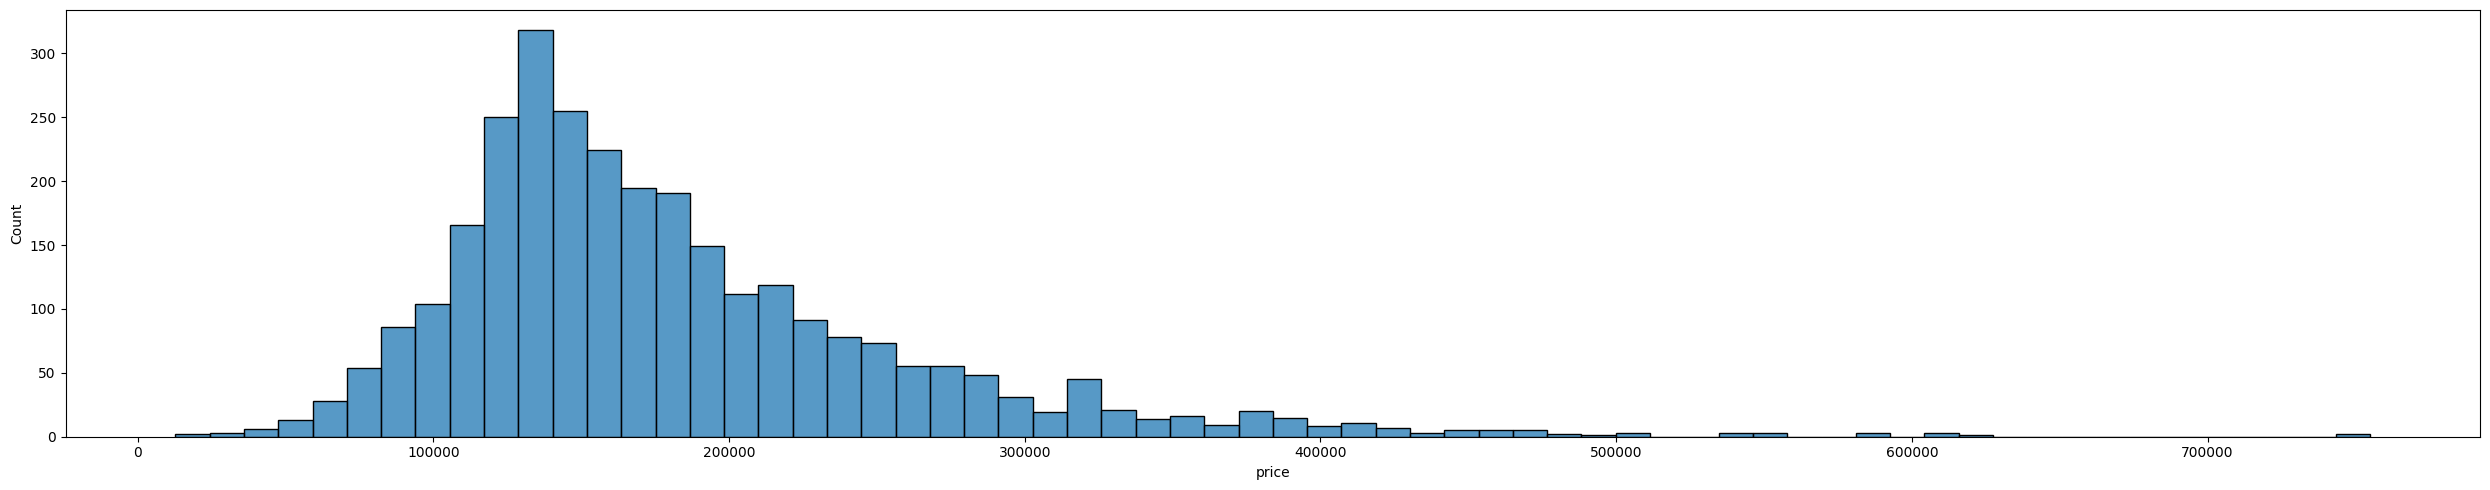

In [288]:
plt.figure(figsize=(25, 5))
sb.histplot(df_arme_data['price'])
plt.tight_layout()

In [381]:
colonnes_a_selectionner = [
    "Overall.Qual",     # Qualité générale
    "area",             # Surface habitable (GrLivArea)
    "Total.Bsmt.SF",    # Surface totale du sous-sol
    "X1st.Flr.SF",      # Surface du 1er étage
    "Year.Built",       # Année de construction
    "Year.Remod.Add",   # Année de rénovation
    "Garage.Cars",      # Nombre de voitures dans le garage
    "Garage.Area",      # Surface du garage
    "Full.Bath",        # Nombre de salles de bain complètes au-dessus du sol
    "TotRms.AbvGrd",    # Nombre total de pièces au-dessus du sol
    "Kitchen.Qual",     # Qualité de la cuisine
    "Fireplaces",       # Nombre de cheminées
    "Lot.Area",         # Surface du terrain
    "Neighborhood",     # Quartier
    "Exter.Qual",       # Qualité extérieure
    "price"             # Prix de vente (cible)
]
df_arme_data_ = df_arme_data[colonnes_a_selectionner]
df_arme_data_ = df_arme_data_.rename(columns={
    "Overall.Qual": "OverallQual",
    "area": "GrLivArea",
    "Total.Bsmt.SF": "TotalBsmtSF",
    "X1st.Flr.SF": "1stFlrSF",
    "Year.Built": "YearBuilt",
    "Year.Remod.Add": "YearRemodAdd",
    "Garage.Cars": "GarageCars",
    "Garage.Area": "GarageArea",
    "Full.Bath": "FullBath",
    "TotRms.AbvGrd": "TotRmsAbvGrd",
    "Kitchen.Qual": "KitchenQual",
    "Fireplaces": "Fireplaces",
    "Lot.Area": "LotArea",
    "Neighborhood": "Neighborhood",
    "Exter.Qual": "ExterQual",
    "price": "SalePrice"
})
df_arme_data_

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               6       1656       1080.0      1656       1960          1960   
1               5        896        882.0       896       1961          1961   
2               6       1329       1329.0      1329       1958          1958   
3               7       2110       2110.0      2110       1968          1968   
4               5       1629        928.0       928       1997          1998   
...           ...        ...          ...       ...        ...           ...   
2925            6       1003       1003.0      1003       1984          1984   
2926            5        902        864.0       902       1983          1983   
2927            5        970        912.0       970       1992          1992   
2928            5       1389       1389.0      1389       1974          1975   
2929            7       2000        996.0       996       1993          1994   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0            2.0       528.0         1             7          TA           2   
1            1.0       730.0         1             5          TA           0   
2            1.0       312.0         1             6          Gd           0   
3            2.0       522.0         2             8          Ex           2   
4            2.0       482.0         2             6          TA           1   
...          ...         ...       ...           ...         ...         ...   
2925         2.0       588.0         1             6          TA           0   
2926         2.0       484.0         1             5          TA           0   
2927         0.0         0.0         1             6          TA           0   
2928         2.0       418.0         1             6          TA           1   
2929         3.0       650.0         2             9          TA           1   

      LotArea Neighborhood ExterQual  SalePrice  
0       31770        NAmes        TA     215000  
1       11622        NAmes        TA     105000  
2       14267        NAmes        TA     172000  
3       11160        NAmes        Gd     244000  
4       13830      Gilbert        TA     189900  
...       ...          ...       ...        ...  
2925     7937      Mitchel        TA     142500  
2926     8885      Mitchel        TA     131000  
2927    10441      Mitchel        TA     132000  
2928    10010      Mitchel        TA     170000  
2929     9627      Mitchel        TA     188000  

[2930 rows x 16 columns]

In [386]:
df_arme_data_

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               6       1656       1080.0      1656       1960          1960   
1               5        896        882.0       896       1961          1961   
2               6       1329       1329.0      1329       1958          1958   
3               7       2110       2110.0      2110       1968          1968   
4               5       1629        928.0       928       1997          1998   
...           ...        ...          ...       ...        ...           ...   
2925            6       1003       1003.0      1003       1984          1984   
2926            5        902        864.0       902       1983          1983   
2927            5        970        912.0       970       1992          1992   
2928            5       1389       1389.0      1389       1974          1975   
2929            7       2000        996.0       996       1993          1994   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0            2.0       528.0         1             7          TA           2   
1            1.0       730.0         1             5          TA           0   
2            1.0       312.0         1             6          Gd           0   
3            2.0       522.0         2             8          Ex           2   
4            2.0       482.0         2             6          TA           1   
...          ...         ...       ...           ...         ...         ...   
2925         2.0       588.0         1             6          TA           0   
2926         2.0       484.0         1             5          TA           0   
2927         0.0         0.0         1             6          TA           0   
2928         2.0       418.0         1             6          TA           1   
2929         3.0       650.0         2             9          TA           1   

      LotArea Neighborhood ExterQual  SalePrice  
0       31770        NAmes        TA     215000  
1       11622        NAmes        TA     105000  
2       14267        NAmes        TA     172000  
3       11160        NAmes        Gd     244000  
4       13830      Gilbert        TA     189900  
...       ...          ...       ...        ...  
2925     7937      Mitchel        TA     142500  
2926     8885      Mitchel        TA     131000  
2927    10441      Mitchel        TA     132000  
2928    10010      Mitchel        TA     170000  
2929     9627      Mitchel        TA     188000  

[2930 rows x 16 columns]

In [11]:
df_new_data = pd.read_csv("train.csv")
df_new_data = df_new_data[df_origin.columns]
df_new_data


OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               7       1717          756       961       1915          1970   
4               8       2198         1145      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
1455            6       1647          953       953       1999          2000   
1456            6       2073         1542      2073       1978          1988   
1457            7       2340         1152      1188       1941          2006   
1458            5       1078         1078      1078       1950          1996   
1459            5       1256         1256      1256       1965          1965   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              3         642         1             7          Gd           1   
4              3         836         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
1455           2         460         2             7          TA           1   
1456           2         500         2             7          TA           2   
1457           1         252         2             9          Gd           2   
1458           1         240         1             5          Gd           0   
1459           1         276         1             6          TA           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3        9550      Crawfor        TA     140000  
4       14260      NoRidge        Gd     250000  
...       ...          ...       ...        ...  
1455     7917      Gilbert        TA     175000  
1456    13175       NWAmes        TA     210000  
1457     9042      Crawfor        Ex     266500  
1458     9717        NAmes        TA     142125  
1459     9937      Edwards        Gd     147500  

[1460 rows x 16 columns]

In [13]:
df_combine_data = pd.concat([df_new_data, df_origin], ignore_index=True, axis=0)
df_combine_data = df_combine_data.drop_duplicates()
df_combine_data

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               7       1717          756       961       1915          1970   
4               8       2198         1145      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
1455            6       1647          953       953       1999          2000   
1456            6       2073         1542      2073       1978          1988   
1457            7       2340         1152      1188       1941          2006   
1458            5       1078         1078      1078       1950          1996   
1459            5       1256         1256      1256       1965          1965   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              3         642         1             7          Gd           1   
4              3         836         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
1455           2         460         2             7          TA           1   
1456           2         500         2             7          TA           2   
1457           1         252         2             9          Gd           2   
1458           1         240         1             5          Gd           0   
1459           1         276         1             6          TA           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3        9550      Crawfor        TA     140000  
4       14260      NoRidge        Gd     250000  
...       ...          ...       ...        ...  
1455     7917      Gilbert        TA     175000  
1456    13175       NWAmes        TA     210000  
1457     9042      Crawfor        Ex     266500  
1458     9717        NAmes        TA     142125  
1459     9937      Edwards        Gd     147500  

[1460 rows x 16 columns]

In [64]:
df_combine_data

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               7       1717          756       961       1915          1970   
4               8       2198         1145      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
1455            6       1647          953       953       1999          2000   
1456            6       2073         1542      2073       1978          1988   
1457            7       2340         1152      1188       1941          2006   
1458            5       1078         1078      1078       1950          1996   
1459            5       1256         1256      1256       1965          1965   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              3         642         1             7          Gd           1   
4              3         836         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
1455           2         460         2             7          TA           1   
1456           2         500         2             7          TA           2   
1457           1         252         2             9          Gd           2   
1458           1         240         1             5          Gd           0   
1459           1         276         1             6          TA           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3        9550      Crawfor        TA     140000  
4       14260      NoRidge        Gd     250000  
...       ...          ...       ...        ...  
1455     7917      Gilbert        TA     175000  
1456    13175       NWAmes        TA     210000  
1457     9042      Crawfor        Ex     266500  
1458     9717        NAmes        TA     142125  
1459     9937      Edwards        Gd     147500  

[1460 rows x 16 columns]

In [66]:
df_origin

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               8       1694         1686      1694       2004          2005   
4               7       1774          952      1022       1931          1950   
...           ...        ...          ...       ...        ...           ...   
1175            5       1072          547      1072       2005          2005   
1176            7       1221         1221      1221       2004          2005   
1177            6       1647          953       953       1999          2000   
1178            7       2340         1152      1188       1941          2006   
1179            5       1078         1078      1078       1950          1996   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              2         636         2             7          Gd           1   
4              2         468         2             8          TA           2   
...          ...         ...       ...           ...         ...         ...   
1175           2         525         1             5          TA           0   
1176           2         400         2             6          Gd           0   
1177           2         460         2             7          TA           1   
1178           1         252         2             9          Gd           2   
1179           1         240         1             5          Gd           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3       10084      Somerst        Gd     307000  
4        6120      OldTown        TA     129900  
...       ...          ...       ...        ...  
1175     3675      Edwards        TA     145000  
1176     7500      Somerst        Gd     185000  
1177     7917      Gilbert        TA     175000  
1178     9042      Crawfor        Ex     266500  
1179     9717        NAmes        TA     142125  

[1180 rows x 16 columns]

In [402]:
#iqr salePrice
q1 = df_combine_data['SalePrice'].quantile(0.25)
q3 = df_combine_data['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_combine_data_outlier = df_combine_data.query("`SalePrice` > @lower_bound & `SalePrice` < @upper_bound")
df_combine_data_outlier

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710        856.0       856       2003          2003   
1               6       1262       1262.0      1262       1976          1976   
2               7       1786        920.0       920       2001          2002   
3               7       1717        756.0       961       1915          1970   
4               8       2198       1145.0      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
5559            4       1092        546.0       546       1970          1970   
5560            4       1092        546.0       546       1970          1970   
5564            5       1224       1224.0      1224       1960          1996   
5567            5        970        912.0       970       1992          1992   
5569            7       2000        996.0       996       1993          1994   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0            2.0       548.0         2             8          Gd           0   
1            2.0       460.0         2             6          TA           1   
2            2.0       608.0         2             6          Gd           1   
3            3.0       642.0         1             7          Gd           1   
4            3.0       836.0         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
5559         0.0         0.0         1             5          TA           0   
5560         1.0       286.0         1             6          TA           0   
5564         2.0       576.0         1             7          TA           1   
5567         0.0         0.0         1             6          TA           0   
5569         3.0       650.0         2             9          TA           1   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3        9550      Crawfor        TA     140000  
4       14260      NoRidge        Gd     250000  
...       ...          ...       ...        ...  
5559     1936      MeadowV        TA      90500  
5560     1894      MeadowV        TA      71000  
5564    20000      Mitchel        TA     131000  
5567    10441      Mitchel        TA     132000  
5569     9627      Mitchel        TA     188000  

[2790 rows x 16 columns]

In [166]:
stand = StandardScaler()
MinMax = MinMaxScaler()

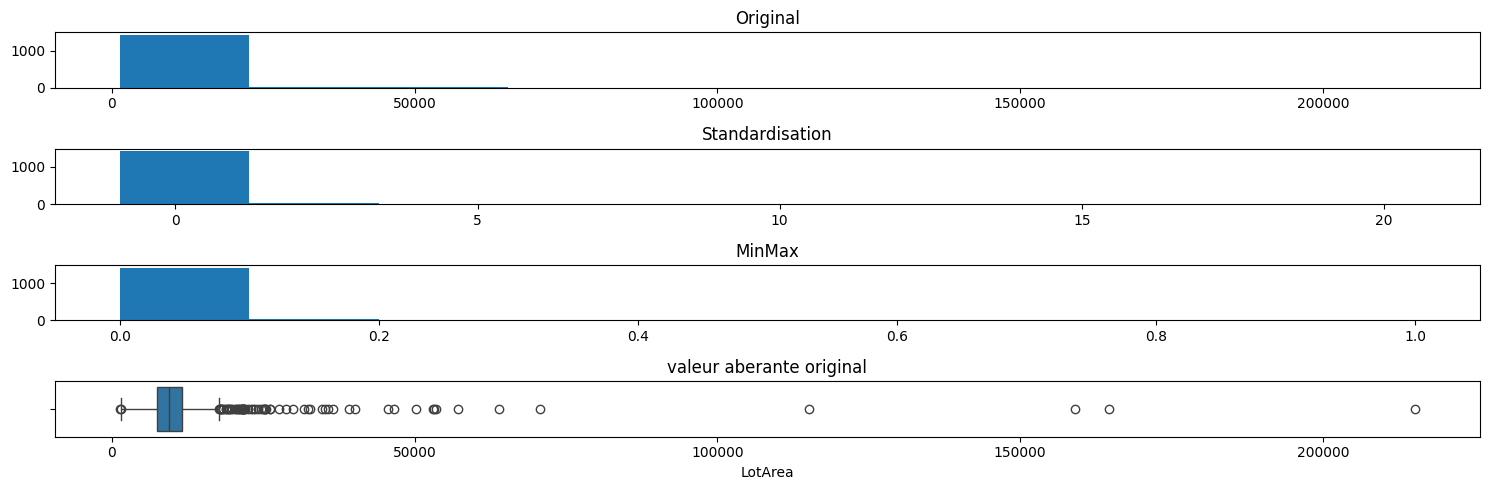

In [189]:
fig, (ax, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 5))
ax.hist(df_combine_data['LotArea'])
ax2.hist(stand.fit_transform(df_combine_data[['LotArea']]))
ax3.hist(MinMax.fit_transform(df_combine_data[['LotArea']]))
sb.boxplot(x=df_combine_data['LotArea'], ax=ax4, legend=True)
"""sb.boxplot(x=df_combine_data['1stFlrSF'], ax=ax2, legend=True)
ax.set_title("Distribution of GrLivArea")
ax2.set_title("Stats of GrLivArea")
fig.suptitle("Analyse de la variable salePrice de maison de 1872 a 2010")"""
ax.set_title("Original")
ax2.set_title("Standardisation")
ax3.set_title("MinMax")
ax4.set_title("valeur aberante original")
fig.tight_layout()

In [88]:
# feature engenering
df_combine_data_ft = df_combine_data.copy(deep=True)
df_combine_data_ft['TotalSF'] = df_combine_data_ft['TotalBsmtSF'] + df_combine_data_ft['1stFlrSF'] + df_combine_data_ft['GrLivArea']
#df_combine_data_ft.drop(columns=["TotalBsmtSF", "1stFlrSF", "GrLivArea"], axis=1, inplace=True)
df_combine_data_ft['LivAreaPerRoom'] = df_combine_data_ft['GrLivArea'] / df_combine_data_ft['TotRmsAbvGrd']
df_combine_data_ft['OverallScore'] = df_combine_data_ft['OverallQual'] * df_combine_data_ft['ExterQual']
df_combine_data_ft

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               7       1717          756       961       1915          1970   
4               8       2198         1145      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
1455            6       1647          953       953       1999          2000   
1456            6       2073         1542      2073       1978          1988   
1457            7       2340         1152      1188       1941          2006   
1458            5       1078         1078      1078       1950          1996   
1459            5       1256         1256      1256       1965          1965   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              3         642         1             7          Gd           1   
4              3         836         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
1455           2         460         2             7          TA           1   
1456           2         500         2             7          TA           2   
1457           1         252         2             9          Gd           2   
1458           1         240         1             5          Gd           0   
1459           1         276         1             6          TA           0   

      LotArea Neighborhood ExterQual  SalePrice  TotalSF  LivAreaPerRoom  \
0        8450      CollgCr        Gd     208500     3422      213.750000   
1        9600      Veenker        TA     181500     3786      210.333333   
2       11250      CollgCr        Gd     223500     3626      297.666667   
3        9550      Crawfor        TA     140000     3434      245.285714   
4       14260      NoRidge        Gd     250000     4488      244.222222   
...       ...          ...       ...        ...      ...             ...   
1455     7917      Gilbert        TA     175000     3553      235.285714   
1456    13175       NWAmes        TA     210000     5688      296.142857   
1457     9042      Crawfor        Ex     266500     4680      260.000000   
1458     9717        NAmes        TA     142125     3234      215.600000   
1459     9937      Edwards        Gd     147500     3768      209.333333   

          OverallScore  
0       GdGdGdGdGdGdGd  
1         TATATATATATA  
2       GdGdGdGdGdGdGd  
3       TATATATATATATA  
4     GdGdGdGdGdGdGdGd  
...                ...  
1455      TATATATATATA  
1456      TATATATATATA  
1457    ExExExExExExEx  
1458        TATATATATA  
1459        GdGdGdGdGd  

[1460 rows x 19 columns]

In [37]:
Column_transform_encodage = ColumnTransformer(transformers=[("Encoder : OneHot", OneHotEncoder(sparse_output=False, drop='first', handle_unknown="ignore"), ["Neighborhood"]),
                                ("Encoder : OrdinalEncoder", OrdinalEncoder(categories=[["Fa", "TA", "Gd", "Ex"], ["Fa", "TA", "Gd", "Ex"]], handle_unknown="use_encoded_value",unknown_value=-1), ["KitchenQual", "ExterQual"])], remainder="passthrough")

Column_transform_encodage.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoder : OneHot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Neighborhood']),
                                ('Encoder : OrdinalEncoder',
                                 OrdinalEncoder(categories=[['Fa', 'TA', 'Gd',
                                                             'Ex'],
                                                            ['Fa', 'TA', 'Gd',
                                                             'Ex']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['KitchenQual', 'ExterQual'])])

In [265]:
Column_transform_normalisation = ColumnTransformer(transformers=[("Normalisation : MinMax", MinMaxScaler(), ["remainder__YearBuilt", "remainder__YearRemodAdd", "Encoder : OrdinalEncoder__KitchenQual", "remainder__Fireplaces", "Encoder : OrdinalEncoder__ExterQual"]),
                                ("Normalisation : Stand", StandardScaler(), ["remainder__1stFlrSF", "remainder__OverallQual", "remainder__GrLivArea", "remainder__TotalBsmtSF", "remainder__GarageCars", "remainder__GarageArea", "remainder__FullBath", "remainder__TotRmsAbvGrd", "remainder__LotArea"])], remainder="passthrough")
Column_transform_normalisation

ColumnTransformer(remainder='passthrough',
                  transformers=[('Normalisation : MinMax', MinMaxScaler(),
                                 ['remainder__YearBuilt',
                                  'remainder__YearRemodAdd',
                                  'Encoder : OrdinalEncoder__KitchenQual',
                                  'remainder__Fireplaces',
                                  'Encoder : OrdinalEncoder__ExterQual']),
                                ('Normalisation : Stand', StandardScaler(),
                                 ['remainder__1stFlrSF',
                                  'remainder__OverallQual',
                                  'remainder__GrLivArea',
                                  'remainder__TotalBsmtSF',
                                  'remainder__GarageCars',
                                  'remainder__GarageArea',
                                  'remainder__FullBath',
                                  'remainder__TotRmsAbvGrd',
                                  'remainder__LotArea'])])

In [185]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Tu peux ajouter des paramètres ici si besoin
        pass

    def fit(self, X, y=None):
        # Apprend quelque chose si besoin (ex: moyenne, min, max...)
        return self  # obligatoire

    def transform(self, df_combine_data):
        # Applique la transformation à X
        df_combine_data_ft = df_combine_data.copy(deep=True)

        df_combine_data_ft['TotalSF'] = df_combine_data_ft['remainder__TotalBsmtSF'] + df_combine_data_ft['remainder__1stFlrSF'] + df_combine_data_ft['remainder__GrLivArea']
        df_combine_data_ft['LivAreaPerRoom'] = df_combine_data_ft['remainder__GrLivArea'] / df_combine_data_ft['remainder__TotRmsAbvGrd']
        df_combine_data_ft['OverallScore'] = df_combine_data_ft['remainder__OverallQual'] * df_combine_data_ft['Encoder : OrdinalEncoder__ExterQual']

        df_combine_data_ft.drop(columns=["remainder__TotalBsmtSF", "remainder__1stFlrSF", "remainder__GrLivArea", "remainder__OverallQual", "Encoder : OrdinalEncoder__ExterQual"], axis=1, inplace=True)

        return df_combine_data_ft

In [236]:
pipeline = Pipeline(steps=[("Encodage", Column_transform_encodage),
                           #("feature engenerring", CustomTransformer()),
                            ("Normalisation", StandardScaler().set_output(transform="pandas"))
                            #("XGBRegressor", XGBRegressor(tree_method='gpu_hist', device='cuda'))
                           ])
pipeline
# ("XGBRegressor", XGBRegressor(tree_method='gpu_hist', device='cuda'))

Pipeline(steps=[('Encodage',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoder : OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Neighborhood']),
                                                 ('Encoder : OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['KitchenQual',
                                                   'ExterQual'])])),
                ('Normalisation', StandardScaler())])

In [237]:
df_combine_data

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               7       1717          756       961       1915          1970   
4               8       2198         1145      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
1455            6       1647          953       953       1999          2000   
1456            6       2073         1542      2073       1978          1988   
1457            7       2340         1152      1188       1941          2006   
1458            5       1078         1078      1078       1950          1996   
1459            5       1256         1256      1256       1965          1965   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              3         642         1             7          Gd           1   
4              3         836         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
1455           2         460         2             7          TA           1   
1456           2         500         2             7          TA           2   
1457           1         252         2             9          Gd           2   
1458           1         240         1             5          Gd           0   
1459           1         276         1             6          TA           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3        9550      Crawfor        TA     140000  
4       14260      NoRidge        Gd     250000  
...       ...          ...       ...        ...  
1455     7917      Gilbert        TA     175000  
1456    13175       NWAmes        TA     210000  
1457     9042      Crawfor        Ex     266500  
1458     9717        NAmes        TA     142125  
1459     9937      Edwards        Gd     147500  

[1460 rows x 16 columns]

In [245]:
pd.set_option('display.max_columns', None)
test= pipeline.fit_transform(df_combine_data.iloc[:, 0:len(df_combine_data.columns) - 1], df_combine_data.iloc[:, -1])
test


Encoder : OneHot__Neighborhood_Blueste  \
0                                  -0.037037   
1                                  -0.037037   
2                                  -0.037037   
3                                  -0.037037   
4                                  -0.037037   
...                                      ...   
1455                               -0.037037   
1456                               -0.037037   
1457                               -0.037037   
1458                               -0.037037   
1459                               -0.037037   

      Encoder : OneHot__Neighborhood_BrDale  \
0                                 -0.105263   
1                                 -0.105263   
2                                 -0.105263   
3                                 -0.105263   
4                                 -0.105263   
...                                     ...   
1455                              -0.105263   
1456                              -0.105263   
1457                              -0.105263   
1458                              -0.105263   
1459                              -0.105263   

      Encoder : OneHot__Neighborhood_BrkSide  \
0                                  -0.203395   
1                                  -0.203395   
2                                  -0.203395   
3                                  -0.203395   
4                                  -0.203395   
...                                      ...   
1455                               -0.203395   
1456                               -0.203395   
1457                               -0.203395   
1458                               -0.203395   
1459                               -0.203395   

      Encoder : OneHot__Neighborhood_ClearCr  \
0                                  -0.139832   
1                                  -0.139832   
2                                  -0.139832   
3                                  -0.139832   
4                                  -0.139832   
...                                      ...   
1455                               -0.139832   
1456                               -0.139832   
1457                               -0.139832   
1458                               -0.139832   
1459                               -0.139832   

      Encoder : OneHot__Neighborhood_CollgCr  \
0                                   2.955221   
1                                  -0.338384   
2                                   2.955221   
3                                  -0.338384   
4                                  -0.338384   
...                                      ...   
1455                               -0.338384   
1456                               -0.338384   
1457                               -0.338384   
1458                               -0.338384   
1459                               -0.338384   

      Encoder : OneHot__Neighborhood_Crawfor  \
0                                  -0.190252   
1                                  -0.190252   
2                                  -0.190252   
3                                   5.256182   
4                                  -0.190252   
...                                      ...   
1455                               -0.190252   
1456                               -0.190252   
1457                                5.256182   
1458                               -0.190252   
1459                               -0.190252   

      Encoder : OneHot__Neighborhood_Edwards  \
0                                  -0.271163   
1                                  -0.271163   
2                                  -0.271163   
3                                  -0.271163   
4                                  -0.271163   
...                                      ...   
1455                               -0.271163   
1456                               -0.271163   
1457                               -0.271163   
1458                               -0.271163   
1459                        

In [243]:
df_combine_data

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0               7       1710          856       856       2003          2003   
1               6       1262         1262      1262       1976          1976   
2               7       1786          920       920       2001          2002   
3               7       1717          756       961       1915          1970   
4               8       2198         1145      1145       2000          2000   
...           ...        ...          ...       ...        ...           ...   
1455            6       1647          953       953       1999          2000   
1456            6       2073         1542      2073       1978          1988   
1457            7       2340         1152      1188       1941          2006   
1458            5       1078         1078      1078       1950          1996   
1459            5       1256         1256      1256       1965          1965   

      GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0              2         548         2             8          Gd           0   
1              2         460         2             6          TA           1   
2              2         608         2             6          Gd           1   
3              3         642         1             7          Gd           1   
4              3         836         2             9          Gd           1   
...          ...         ...       ...           ...         ...         ...   
1455           2         460         2             7          TA           1   
1456           2         500         2             7          TA           2   
1457           1         252         2             9          Gd           2   
1458           1         240         1             5          Gd           0   
1459           1         276         1             6          TA           0   

      LotArea Neighborhood ExterQual  SalePrice  
0        8450      CollgCr        Gd     208500  
1        9600      Veenker        TA     181500  
2       11250      CollgCr        Gd     223500  
3        9550      Crawfor        TA     140000  
4       14260      NoRidge        Gd     250000  
...       ...          ...       ...        ...  
1455     7917      Gilbert        TA     175000  
1456    13175       NWAmes        TA     210000  
1457     9042      Crawfor        Ex     266500  
1458     9717        NAmes        TA     142125  
1459     9937      Edwards        Gd     147500  

[1460 rows x 16 columns]

In [191]:
"""param_grid = {
    'XGBRegressor__n_estimators': [100, 200, 300, 500],
    'XGBRegressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'XGBRegressor__max_depth': [3, 5, 7, 10],
    'XGBRegressor__min_child_weight': [1, 3, 5],
    'XGBRegressor__subsample': [0.6, 0.8, 1.0],
    'XGBRegressor__colsample_bytree': [0.6, 0.8, 1.0],
    'XGBRegressor__gamma': [0, 0.1, 0.2, 0.5],
    'XGBRegressor__reg_alpha': [0, 0.1, 1, 10],
    'XGBRegressor__reg_lambda': [1, 10, 100],
}"""

param_grid = {
    'XGBRegressor__max_depth': [3, 5, 7],
    'XGBRegressor__min_child_weight': [1, 5],
    'XGBRegressor__subsample': [0.8, 1.0],
    'XGBRegressor__colsample_bytree': [0.8, 1.0],
    'XGBRegressor__learning_rate': [0.05, 0.1],
    'XGBRegressor__n_estimators': [100, 300]
}

X = df_combine_data.iloc[:, 0:-1]
y = df_combine_data.iloc[:, -1]

gridSerach = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1, verbose=0)
gridSerach.fit(X, y)
gridSerach.best_score_

/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:44:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method

np.float64(-751204780.8)

In [215]:
gridSerach.best_estimator_.named_steps['XGBRegressor'].get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': 'cuda',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': None}

/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:32:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


erreur train : 4188.309299416738
erreur test: 18123.486114083906


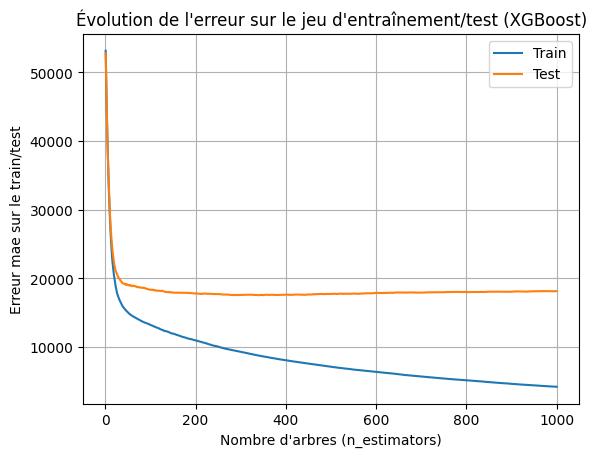

/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:32:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


erreur train : 4217.625836098031
erreur test: 17600.06001177226


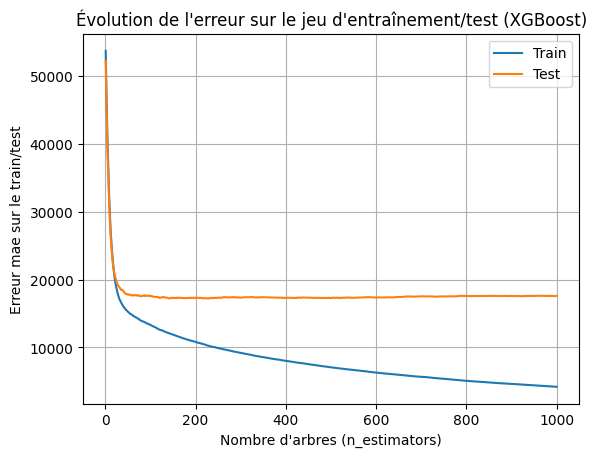

/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:32:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


erreur train : 4141.706967706549
erreur test: 20202.092305222603


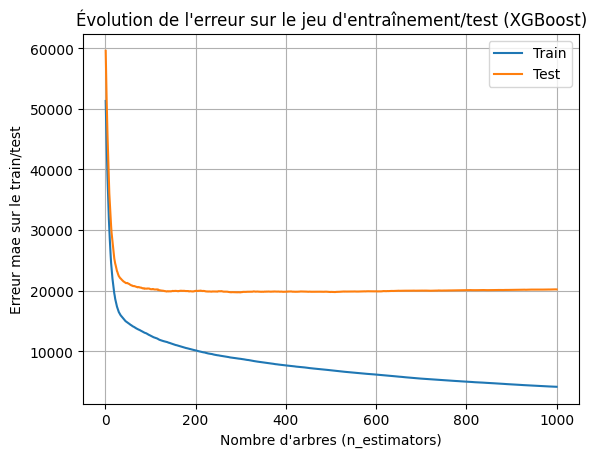

/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:32:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


erreur train : 4210.79177145762
erreur test: 17946.91661761558


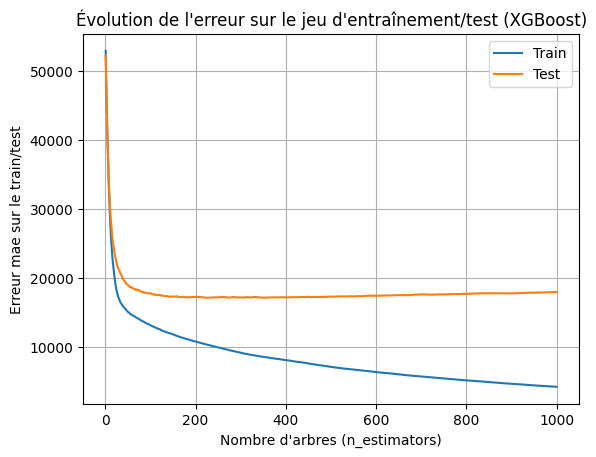

/home/loris/.cache/pypoetry/virtualenvs/code-6AQoPfNf-py3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:32:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


erreur train : 4353.338194964683
erreur test: 16005.781905500857


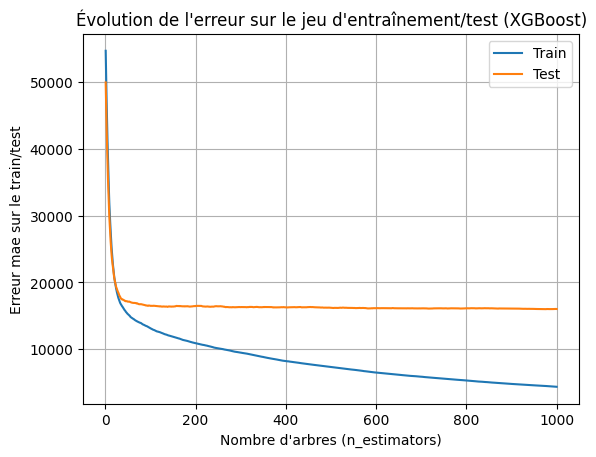

In [252]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)
folds = []
X = test
y = df_combine_data.iloc[:, -1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    folds.append((X_train, X_test, y_train, y_test))

model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    device='cuda',
    enable_categorical=False,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=1000,
    subsample=0.8,
    tree_method='gpu_hist',
    missing=np.nan,
    eval_metric='mae'  # ✅ Ajout de la métrique souhaitée
)
for i, (X_tr, X_te, y_tr, y_te) in enumerate(folds):
    # On lui dit de mesurer l’erreur à chaque étape sur les données de test
    model.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_te, y_te)], verbose=False)

    # On récupère les erreurs à chaque boosting round
    results = model.evals_result()

    # On récupère l’erreur sur le jeu de test
    train_errors = results['validation_0']['mae']
    test_errors = results['validation_1']['mae']

    print(f"erreur train : {train_errors[-1]}")
    print(f"erreur test: {test_errors[-1]}")


    plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train')
    plt.plot(range(1, len(test_errors) + 1), test_errors,label='Test')
    plt.xlabel("Nombre d'arbres (n_estimators)")
    plt.ylabel("Erreur mae sur le train/test")
    plt.title("Évolution de l'erreur sur le jeu d'entraînement/test (XGBoost)")
    plt.grid()
    plt.legend()
    plt.show()


In [192]:
X_test = pd.read_csv("kaggle_test_set.csv")
"""X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['GrLivArea']
X_test.drop(columns=["TotalBsmtSF", "1stFlrSF", "GrLivArea"], axis=1, inplace=True)"""
X_test

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0              6       1484          783       783       2005          2007   
1              9       1905         1905      1905       2006          2006   
2              7       1640          798       798       2003          2003   
3              5       1728         1728      1728       1965          1965   
4              4        864          864       864       1971          1971   
..           ...        ...          ...       ...        ...           ...   
275            8       1911          777      1065       1993          1994   
276            7       2034         1057      1057       1997          1998   
277            6       2119          689      1378       1972          1972   
278            5       1246         1246      1246       1959          1994   
279            7       1601         1271      1601       1978          1978   

     GarageCars  GarageArea  FullBath  TotRmsAbvGrd KitchenQual  Fireplaces  \
0             2         393         2             8          Gd           1   
1             3         788         2             8          Ex           1   
2             2         595         2             6          Gd           0   
3             2         576         2            10          TA           0   
4             2         528         1             5          TA           0   
..          ...         ...       ...           ...         ...         ...   
275           2         471         2             8          Gd           1   
276           2         645         2             8          Gd           0   
277           2         583         2             7          TA           1   
278           1         305         1             6          Gd           0   
279           2         478         2             7          TA           1   

     LotArea Neighborhood ExterQual  
0      10237      Gilbert        Gd  
1      11670      Somerst        Ex  
2       7226      CollgCr        Gd  
3      13101        NAmes        TA  
4       9000        NAmes        TA  
..       ...          ...       ...  
275     9554      SawyerW        Gd  
276     9375      CollgCr        TA  
277    10448       NWAmes        TA  
278     7500        NAmes        TA  
279    11880       NWAmes        TA  

[280 rows x 15 columns]

In [195]:


y_predict = gridSerach.predict(X_test)
data_frame_test = pd.DataFrame(data=y_predict, columns=["SalePrice"])
data_frame_test.index.name = "ID"
data_frame_test

SalePrice
ID                
0    175141.500000
1    336186.437500
2    187032.781250
3    143246.640625
4    113652.187500
..             ...
275  212040.015625
276  217913.953125
277  177928.296875
278  145263.156250
279  180554.812500

[280 rows x 1 columns]

In [196]:
data_frame_test.to_csv("submission_17.csv")

Data train combine to orgin data + encod standart + normalisation uniforme pour toutes les features (minmax/stand -> donne les meme resultat)
(Normalisation custom marche pas du tout...)
(autre data en plus fonctionne pas bien non plus)
(apres,  feature engenring et feature selction... donne pas de bo nresultat aussi, j arrive pas à faire mieux que la pipeline de base)
(peut etre aussi combinaison de modele...)
les courbes error sont els courbes avec la pipeline qui amrche le mieux et les meillers param trouve du modele xgboost et la combinaison de data qui marche le mieux donc (data de base + celle d origin donc train
combiner en plus ames.csv avec les deux data set rajoute du bruit et deteriore consideramblement les resultats...
